In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np
from scipy import stats
import os, warnings
warnings.filterwarnings(action='ignore')

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

train = pd.read_csv("data/train_df_jm.csv")
test = pd.read_csv("data/test_df_jm.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")
train.shape, test.shape, sub.shape, age.shape

((2869, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [5]:
train.head(30)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0


In [6]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']

## Age 정보 추가

In [7]:
train.shape, test.shape

((2869, 15), (1008, 14))

In [8]:
train = pd.merge(train,age)
test = pd.merge(test,age)

In [9]:
train.shape, test.shape

((2869, 37), (1008, 36))

In [10]:
len(test['단지코드'].unique())

147

((array([-3.48993426, -3.24543014, -3.11017715, ...,  3.11017715,
          3.24543014,  3.48993426]),
  array([2.56494936, 2.56494936, 2.56494936, ..., 7.84384864, 7.84384864,
         7.84384864])),
 (0.8805142620262187, 5.974051234508852, 0.9839921058038086))

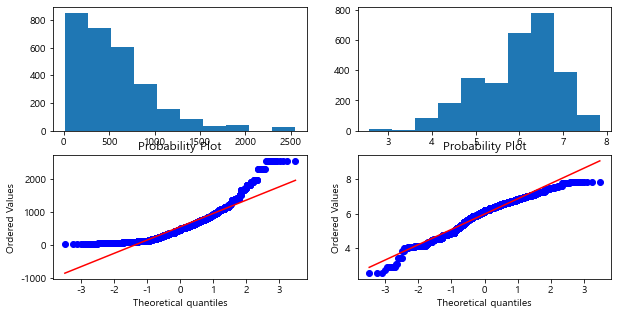

In [11]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(train['등록차량수'])
ax[0][1].hist(np.log(train['등록차량수']))

stats.probplot(train['등록차량수'], plot=ax[1][0])
stats.probplot(np.log(train['등록차량수']), plot=ax[1][1])

In [12]:
all_df = pd.concat([train, test], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_df
all_df.shape

(3877, 36)

In [13]:
all_df.shape

(3877, 36)

## 결측치 처리

### 자격유형

In [14]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

In [15]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [16]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3256,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3257,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3258,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3260,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [17]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3455,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3456,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [18]:
all_df.loc[ 3259, "자격유형"] = 'A'
all_df.loc[ 3454, "자격유형"] = 'C'

In [19]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

### 임대보증금

In [20]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)

(18, 36)
변경후
(0, 36)


In [21]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

749
변경후
0


### 임대료

In [22]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)

(21, 36)
변경후
(0, 36)


In [23]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

749
변경후
0


In [24]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3877 non-null   object 
 1   총세대수        3877 non-null   int64  
 2   임대건물구분      3877 non-null   object 
 3   지역          3877 non-null   object 
 4   공급유형        3877 non-null   object 
 5   전용면적        3877 non-null   float64
 6   전용면적별세대수    3877 non-null   int64  
 7   공가수         3877 non-null   float64
 8   자격유형        3877 non-null   object 
 9   임대보증금       3877 non-null   int32  
 10  임대료         3877 non-null   int32  
 11  10분내지하철수    3632 non-null   float64
 12  10분내버스정류장수  3877 non-null   float64
 13  단지내주차면수     3877 non-null   float64
 14  10대미만(여자)   3877 non-null   float64
 15  10대미만(남자)   3877 non-null   float64
 16  10대(여자)     3877 non-null   float64
 17  10대(남자)     3877 non-null   float64
 18  20대(여자)     3877 non-null   float64
 19  20대(남자)     3877 non-null  

### 10분내 지하철 수

In [26]:
#일단 Nan 0으로 처리
print(all_df['10분내지하철수'].isnull().sum())
all_df['10분내지하철수'] = all_df['10분내지하철수'].fillna(0)
print('변경후')
print(all_df['10분내지하철수'].isnull().sum())

245
변경후
0


In [27]:
# sub_tn = pd.read_csv("data/train(subway).csv")
# sub_tt = pd.read_csv("data/test(subway).csv")

In [28]:
# all_sub_df = pd.concat([sub_tn['지하철수'], sub_tt['지하철수']], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
# all_sub_df.shape

In [29]:
# all_df['10분내지하철수'] = all_sub_df

In [30]:
# all_df.head()

In [31]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [32]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.001356
전용면적          0.002800
전용면적별세대수      0.040957
공가수           0.038177
임대보증금         0.124743
임대료           0.084311
10분내지하철수      0.057391
10분내버스정류장수    1.000000
단지내주차면수       0.102414
10대미만(여자)     0.149232
10대미만(남자)     0.146037
10대(여자)       0.028896
10대(남자)       0.023680
20대(여자)      -0.029804
20대(남자)      -0.056424
30대(여자)       0.128756
30대(남자)       0.116142
40대(여자)       0.120484
40대(남자)       0.141870
50대(여자)      -0.063712
50대(남자)      -0.137947
60대(여자)      -0.092533
60대(남자)      -0.127703
70대(여자)      -0.091376
70대(남자)      -0.055173
80대(여자)      -0.121266
80대(남자)      -0.047644
90대(여자)      -0.073738
90대(남자)      -0.007165
100대(여자)      0.074504
100대(남자)      0.018021
Name: 10분내버스정류장수, dtype: float64

In [33]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
359,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
360,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
361,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [34]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

4.011278195488722

In [35]:
# 데이터 확인 후, 처리
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

In [36]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)


In [37]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [38]:
all_df.shape

(3877, 36)

# 라벨인코딩

In [39]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [40]:
all_df.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C1790,657,상가,경상남도,임대상가,248.56,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
96,C2109,495,아파트,경상남도,영구임대,26.34,288,2.0,3,3138000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
97,C2109,495,아파트,경상남도,영구임대,30.48,192,2.0,3,3631000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
98,C2109,495,상가,경상남도,임대상가,31.84,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [41]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,아파트,세종특별자치시,행복주택,38.20,68,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3873,C1229,453,아파트,세종특별자치시,행복주택,38.20,8,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3874,C1229,453,아파트,세종특별자치시,행복주택,38.25,3,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3875,C1229,453,아파트,세종특별자치시,행복주택,38.28,4,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9


In [42]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes # category가 code로 변환된다.

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) # 구간을 나눠서 보겠다. (총 세대수에 대해서 구간 분할 해 주기)
all_df.head(10)
all_df['qcut_총세대수'].unique()

array([1, 0, 3, 2, 4], dtype=int64)

# 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

#### 차이가 14세대 이하인 48개 단지 : 단지코드_Type =1

In [43]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [44]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

#### 차이가 94~452세대인 10개단지 처리하기 :  단지코드_Type =2

In [45]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
        all_df.loc[all_df['단지코드'] == one2, "단지코드_Type"] = 2

#### 그외 :  단지코드_Type =3

In [46]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

### 변수 추가

In [47]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3872    30221500
3873    30221500
3874    30221500
3875    30221500
3876    34119030
Name: 환산보증금, Length: 3877, dtype: int32

In [48]:
all_df['주차면수대비총세대수비율'] = all_df['총세대수']/all_df['단지내주차면수']
all_df['거주율'] =1 - (all_df['공가수']/all_df['총세대수'])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([2.63905733, 2.63905733, 2.63905733, ..., 7.49498623, 7.49498623,
         7.49498623])),
 (0.7344105105721078, 6.126121425642588, 0.9868157045962277))

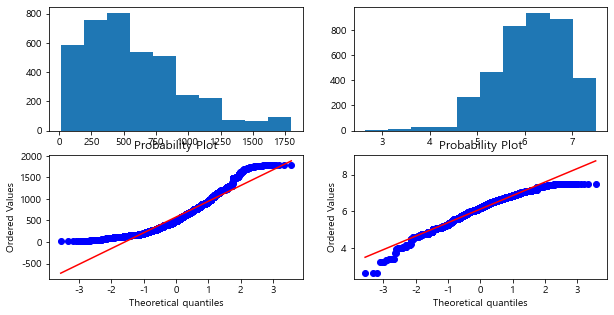

In [49]:
all_df['log_단지내주차면수'] = np.log1p(all_df['단지내주차면수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['단지내주차면수'])
ax[0][1].hist(all_df['log_단지내주차면수'])

stats.probplot(all_df['단지내주차면수'], plot=ax[1][0])
stats.probplot(all_df['log_단지내주차면수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([3.29583687, 3.29583687, 3.29583687, ..., 7.85282781, 7.85282781,
         7.85282781])),
 (0.6093767949475518, 6.611311889490474, 0.9883341683848889))

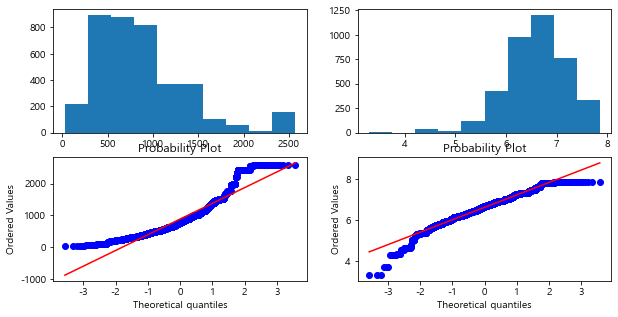

In [50]:
all_df['log_총세대수'] = np.log1p(all_df['총세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['총세대수'])
ax[0][1].hist(all_df['log_총세대수'])

stats.probplot(all_df['총세대수'], plot=ax[1][0])
stats.probplot(all_df['log_총세대수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([0.6931472, 0.6931472, 0.6931472, ..., 7.293698 , 7.3072023,
         7.5315523], dtype=float32)),
 (1.6307518283269595, 3.662091016769409, 0.9441208816516677))

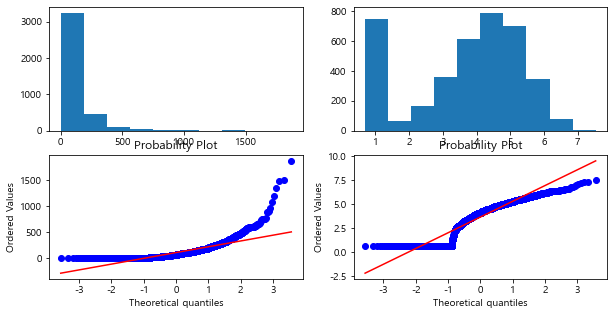

In [51]:
all_df['log_전용면적별세대수'] = np.log1p(all_df['전용면적별세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['전용면적별세대수'])
ax[0][1].hist(all_df['log_전용면적별세대수'])

stats.probplot(all_df['전용면적별세대수'], plot=ax[1][0])
stats.probplot(all_df['log_전용면적별세대수'], plot=ax[1][1])

(array([172., 260., 329., 272., 176., 579., 609., 774., 585., 121.]),
 array([0.        , 0.40253517, 0.80507034, 1.20760551, 1.61014068,
        2.01267585, 2.41521101, 2.81774618, 3.22028135, 3.62281652,
        4.02535169]),
 <BarContainer object of 10 artists>)

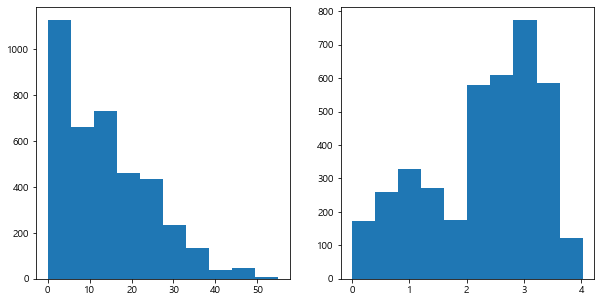

In [52]:
all_df['log_공가수'] = np.log1p(all_df['공가수'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(all_df['공가수'])
ax[1].hist(all_df['log_공가수'])

In [53]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,492,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,38.20,68.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,4.234107,3.178054
3873,C1229,453,38.20,8.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,2.197225,3.178054
3874,C1229,453,38.25,3.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.386294,3.178054
3875,C1229,453,38.28,4.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.609438,3.178054


In [54]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   단지코드          3877 non-null   category
 1   총세대수          3877 non-null   int64   
 2   임대건물구분        3877 non-null   object  
 3   지역            3877 non-null   object  
 4   공급유형          3877 non-null   object  
 5   전용면적          3877 non-null   float64 
 6   전용면적별세대수      3877 non-null   float32 
 7   공가수           3877 non-null   float64 
 8   자격유형          3877 non-null   int32   
 9   임대보증금         3877 non-null   int32   
 10  임대료           3877 non-null   int32   
 11  10분내지하철수      3877 non-null   float64 
 12  10분내버스정류장수    3877 non-null   float64 
 13  단지내주차면수       3877 non-null   float64 
 14  10대미만(여자)     3877 non-null   float64 
 15  10대미만(남자)     3877 non-null   float64 
 16  10대(여자)       3877 non-null   float64 
 17  10대(남자)       3877 non-null   float64 
 18  20대(여자) 

In [55]:
# '총세대수' : 0.333440, '단지내주차면수' : 0.861338, 임대건물구분_lbl : -0.449130
# 전용면적    0.112717, 전용면적별세대수   0.250513, 공가수           0.118910,
# 자격유형         -0.154034, 공급유형_lbl     -0.137277

In [56]:
train.corr()['등록차량수']

총세대수          0.326923
전용면적          0.106366
전용면적별세대수      0.254948
공가수           0.130775
10분내지하철수     -0.101792
10분내버스정류장수    0.110977
단지내주차면수       0.856549
등록차량수         1.000000
10대미만(여자)     0.268142
10대미만(남자)     0.274423
10대(여자)       0.017406
10대(남자)      -0.013654
20대(여자)       0.008058
20대(남자)      -0.138710
30대(여자)       0.384424
30대(남자)       0.369807
40대(여자)       0.186006
40대(남자)       0.320559
50대(여자)      -0.236608
50대(남자)      -0.266656
60대(여자)      -0.191946
60대(남자)      -0.243727
70대(여자)      -0.190950
70대(남자)      -0.147894
80대(여자)      -0.224072
80대(남자)      -0.151342
90대(여자)      -0.180396
90대(남자)      -0.054103
100대(여자)      0.134927
100대(남자)      0.006264
Name: 등록차량수, dtype: float64

(array([3.245e+03, 4.700e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

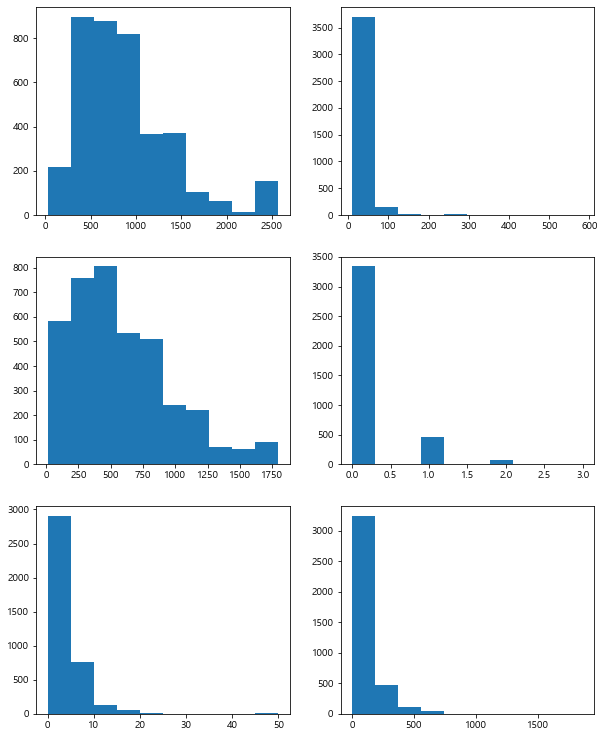

In [57]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

# 원핫 인코딩

In [58]:
# print("dummy 수행 전 shape",all_df_last.shape)
# all_df_last_oh = pd.get_dummies(all_df_last)
# print("dummy 수행 후 shape",all_df_last_oh.shape)

In [59]:
train_df = all_df_last.iloc[0:2869,:]
test_df = all_df_last.iloc[2869:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2086,1080,59.94,30.0,7.0,1,39000000,460000,0.0,2.0,...,3,3.0,39460100,0.945709,0.993519,7.041412,6.985642,3.433987,2.079442,1524.0
2865,C2086,1080,74.92,156.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,5.056246,2.079442,1524.0
2866,C2086,1080,74.93,78.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,4.369448,2.079442,1524.0
2867,C2086,1080,84.88,160.0,7.0,1,61000000,600000,0.0,2.0,...,3,3.0,61600100,0.945709,0.993519,7.041412,6.985642,5.081404,2.079442,1524.0


In [60]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [61]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수            0.326923
전용면적            0.106366
전용면적별세대수        0.254948
공가수             0.130775
자격유형           -0.145695
임대보증금           0.412956
임대료             0.530381
10분내지하철수       -0.079587
10분내버스정류장수      0.110977
단지내주차면수         0.856549
10대미만(여자)       0.268142
10대미만(남자)       0.274423
10대(여자)         0.017406
10대(남자)        -0.013654
20대(여자)         0.008058
20대(남자)        -0.138710
30대(여자)         0.384424
30대(남자)         0.369807
40대(여자)         0.186006
40대(남자)         0.320559
50대(여자)        -0.236608
50대(남자)        -0.266656
60대(여자)        -0.191946
60대(남자)        -0.243727
70대(여자)        -0.190950
70대(남자)        -0.147894
80대(여자)        -0.224072
80대(남자)        -0.151342
90대(여자)        -0.180396
90대(남자)        -0.054103
100대(여자)        0.134927
100대(남자)        0.006264
임대건물구분_lbl     -0.449235
지역_lbl          0.044321
공급유형_lbl       -0.158484
단지코드_lbl       -0.097279
qcut_총세대수       0.391915
단지코드_Type       0.106931
환산보증금           0.414723
주차면수대비총세대수비

In [62]:
pd.set_option('display.min_rows',10)

In [63]:
train_df.head(30)

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0,5.327876
5,C2515,545,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,4.672829,2.890372,205.0,5.327876
6,C2515,545,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,3.295837,2.890372,205.0,5.327876
7,C2576,405,46.90,313.0,19.0,1,19436000,161780,0.0,4.0,...,3.0,19597880,1.368243,0.953086,5.693732,6.006353,5.749393,2.995732,73.0,4.304065
8,C2576,405,59.88,92.0,19.0,1,28252000,235420,0.0,4.0,...,3.0,28487520,1.368243,0.953086,5.693732,6.006353,4.532599,2.995732,73.0,4.304065
9,C2416,560,26.34,360.0,0.0,3,3138000,69820,0.0,5.0,...,3.0,3207920,3.636364,1.000000,5.043425,6.329721,5.888878,0.000000,63.0,4.158883


In [64]:
train_df.shape

(2869, 48)

In [65]:
train_df.isnull().sum()

단지코드            0
총세대수            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
단지코드_Type       0
환산보증금           0
주차면수대비총세대수비율    0
거주율             0
log_단지내주차면수     0
log_총세대수        0
log_전용면적별세대수    0
log_공가수         0
등록차량수           0
log_등록차량수       0
dtype: int64

In [66]:
train_df.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', '주차면수대비총세대수비율', '거주율', 'log_단지내주차면수',
       'log_총세대수', 'log_전용면적별세대수', 'log_공가수', '등록차량수', 'log_등록차량수'],
      dtype='object')

In [67]:
# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
#        'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
#        '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
#        '단지코드_Type']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#        '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
#        '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
#        '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
#        '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
# lable_name = 'log_등록차량수'
sel = [ '총세대수', '전용면적', '공가수', '자격유형',
   '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
  '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
    '단지코드_Type']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# 회귀 트리 모델 학습/예측/평가

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [69]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error
def get_mae_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mae = mean_absolute_error(y_test , pred_value)
        print('{0} 모델의 MAE: {1}'.format(key, mae))

xgb_reg = XGBRegressor(n_estimators=20000, learning_rate=0.1, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=20000, learning_rate=0.1, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
catm_reg = CatBoostRegressor(n_estimators=20000, learning_rate=0.1 ,random_state= 0,verbose= 1,objective = "MAE")

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
catm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)
catm_pred = catm_reg.predict(X_test)


pred = 0.3 * xgb_pred + 0.3 * lgbm_pred + 0.4 * catm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred,
          'CATM' : catm_pred}
  
get_mae_pred(preds)

0:	learn: 0.6522098	total: 148ms	remaining: 49m 18s
1:	learn: 0.6027924	total: 158ms	remaining: 26m 24s
2:	learn: 0.5561069	total: 169ms	remaining: 18m 48s
3:	learn: 0.5169068	total: 180ms	remaining: 14m 58s
4:	learn: 0.4803846	total: 190ms	remaining: 12m 41s
5:	learn: 0.4496416	total: 200ms	remaining: 11m 6s
6:	learn: 0.4244773	total: 210ms	remaining: 10m 1s
7:	learn: 0.4005788	total: 223ms	remaining: 9m 17s
8:	learn: 0.3782174	total: 235ms	remaining: 8m 41s
9:	learn: 0.3584291	total: 246ms	remaining: 8m 11s
10:	learn: 0.3413854	total: 257ms	remaining: 7m 47s
11:	learn: 0.3238442	total: 268ms	remaining: 7m 26s
12:	learn: 0.3087132	total: 279ms	remaining: 7m 9s
13:	learn: 0.2940824	total: 290ms	remaining: 6m 54s
14:	learn: 0.2831267	total: 302ms	remaining: 6m 42s
15:	learn: 0.2706277	total: 312ms	remaining: 6m 30s
16:	learn: 0.2626882	total: 323ms	remaining: 6m 20s
17:	learn: 0.2528618	total: 333ms	remaining: 6m 9s
18:	learn: 0.2448588	total: 342ms	remaining: 5m 59s
19:	learn: 0.236282

161:	learn: 0.0916956	total: 1.81s	remaining: 3m 41s
162:	learn: 0.0910778	total: 1.82s	remaining: 3m 41s
163:	learn: 0.0908344	total: 1.83s	remaining: 3m 40s
164:	learn: 0.0903121	total: 1.84s	remaining: 3m 40s
165:	learn: 0.0899889	total: 1.85s	remaining: 3m 40s
166:	learn: 0.0898461	total: 1.85s	remaining: 3m 40s
167:	learn: 0.0897041	total: 1.86s	remaining: 3m 40s
168:	learn: 0.0896326	total: 1.88s	remaining: 3m 40s
169:	learn: 0.0893140	total: 1.89s	remaining: 3m 39s
170:	learn: 0.0890394	total: 1.89s	remaining: 3m 39s
171:	learn: 0.0888611	total: 1.91s	remaining: 3m 39s
172:	learn: 0.0886152	total: 1.92s	remaining: 3m 39s
173:	learn: 0.0879811	total: 1.93s	remaining: 3m 39s
174:	learn: 0.0877665	total: 1.94s	remaining: 3m 39s
175:	learn: 0.0877236	total: 1.95s	remaining: 3m 39s
176:	learn: 0.0875668	total: 1.96s	remaining: 3m 39s
177:	learn: 0.0874536	total: 1.97s	remaining: 3m 39s
178:	learn: 0.0869802	total: 1.98s	remaining: 3m 39s
179:	learn: 0.0867676	total: 1.99s	remaining: 

323:	learn: 0.0614455	total: 3.45s	remaining: 3m 29s
324:	learn: 0.0613517	total: 3.46s	remaining: 3m 29s
325:	learn: 0.0611903	total: 3.47s	remaining: 3m 29s
326:	learn: 0.0610174	total: 3.48s	remaining: 3m 29s
327:	learn: 0.0609025	total: 3.49s	remaining: 3m 29s
328:	learn: 0.0608151	total: 3.5s	remaining: 3m 29s
329:	learn: 0.0606951	total: 3.52s	remaining: 3m 29s
330:	learn: 0.0605584	total: 3.53s	remaining: 3m 29s
331:	learn: 0.0605343	total: 3.54s	remaining: 3m 29s
332:	learn: 0.0604947	total: 3.55s	remaining: 3m 29s
333:	learn: 0.0604337	total: 3.56s	remaining: 3m 29s
334:	learn: 0.0603175	total: 3.57s	remaining: 3m 29s
335:	learn: 0.0601735	total: 3.58s	remaining: 3m 29s
336:	learn: 0.0601588	total: 3.59s	remaining: 3m 29s
337:	learn: 0.0600928	total: 3.6s	remaining: 3m 29s
338:	learn: 0.0600169	total: 3.61s	remaining: 3m 29s
339:	learn: 0.0599251	total: 3.62s	remaining: 3m 29s
340:	learn: 0.0598418	total: 3.63s	remaining: 3m 29s
341:	learn: 0.0597842	total: 3.64s	remaining: 3m

484:	learn: 0.0493257	total: 5.1s	remaining: 3m 25s
485:	learn: 0.0492953	total: 5.11s	remaining: 3m 25s
486:	learn: 0.0492912	total: 5.12s	remaining: 3m 25s
487:	learn: 0.0492604	total: 5.13s	remaining: 3m 25s
488:	learn: 0.0492266	total: 5.14s	remaining: 3m 25s
489:	learn: 0.0491931	total: 5.15s	remaining: 3m 24s
490:	learn: 0.0491596	total: 5.16s	remaining: 3m 24s
491:	learn: 0.0491196	total: 5.17s	remaining: 3m 24s
492:	learn: 0.0490849	total: 5.18s	remaining: 3m 24s
493:	learn: 0.0490257	total: 5.19s	remaining: 3m 24s
494:	learn: 0.0490167	total: 5.2s	remaining: 3m 24s
495:	learn: 0.0489807	total: 5.21s	remaining: 3m 24s
496:	learn: 0.0489337	total: 5.22s	remaining: 3m 24s
497:	learn: 0.0489219	total: 5.23s	remaining: 3m 24s
498:	learn: 0.0488794	total: 5.24s	remaining: 3m 24s
499:	learn: 0.0488624	total: 5.25s	remaining: 3m 24s
500:	learn: 0.0487606	total: 5.26s	remaining: 3m 24s
501:	learn: 0.0487549	total: 5.27s	remaining: 3m 24s
502:	learn: 0.0487299	total: 5.28s	remaining: 3m

647:	learn: 0.0417903	total: 6.75s	remaining: 3m 21s
648:	learn: 0.0417836	total: 6.76s	remaining: 3m 21s
649:	learn: 0.0417518	total: 6.78s	remaining: 3m 21s
650:	learn: 0.0417452	total: 6.79s	remaining: 3m 21s
651:	learn: 0.0417180	total: 6.8s	remaining: 3m 21s
652:	learn: 0.0416714	total: 6.81s	remaining: 3m 21s
653:	learn: 0.0416467	total: 6.82s	remaining: 3m 21s
654:	learn: 0.0416433	total: 6.83s	remaining: 3m 21s
655:	learn: 0.0416400	total: 6.83s	remaining: 3m 21s
656:	learn: 0.0416149	total: 6.84s	remaining: 3m 21s
657:	learn: 0.0415897	total: 6.86s	remaining: 3m 21s
658:	learn: 0.0415639	total: 6.87s	remaining: 3m 21s
659:	learn: 0.0415485	total: 6.88s	remaining: 3m 21s
660:	learn: 0.0415375	total: 6.88s	remaining: 3m 21s
661:	learn: 0.0414052	total: 6.89s	remaining: 3m 21s
662:	learn: 0.0413912	total: 6.91s	remaining: 3m 21s
663:	learn: 0.0413347	total: 6.92s	remaining: 3m 21s
664:	learn: 0.0413291	total: 6.93s	remaining: 3m 21s
665:	learn: 0.0413135	total: 6.94s	remaining: 3

807:	learn: 0.0376511	total: 8.4s	remaining: 3m 19s
808:	learn: 0.0376464	total: 8.41s	remaining: 3m 19s
809:	learn: 0.0376093	total: 8.42s	remaining: 3m 19s
810:	learn: 0.0375996	total: 8.43s	remaining: 3m 19s
811:	learn: 0.0375790	total: 8.44s	remaining: 3m 19s
812:	learn: 0.0375671	total: 8.45s	remaining: 3m 19s
813:	learn: 0.0375642	total: 8.46s	remaining: 3m 19s
814:	learn: 0.0375566	total: 8.47s	remaining: 3m 19s
815:	learn: 0.0375485	total: 8.48s	remaining: 3m 19s
816:	learn: 0.0375469	total: 8.49s	remaining: 3m 19s
817:	learn: 0.0374350	total: 8.5s	remaining: 3m 19s
818:	learn: 0.0374329	total: 8.51s	remaining: 3m 19s
819:	learn: 0.0374295	total: 8.52s	remaining: 3m 19s
820:	learn: 0.0374266	total: 8.53s	remaining: 3m 19s
821:	learn: 0.0374208	total: 8.54s	remaining: 3m 19s
822:	learn: 0.0374104	total: 8.55s	remaining: 3m 19s
823:	learn: 0.0373223	total: 8.56s	remaining: 3m 19s
824:	learn: 0.0373190	total: 8.57s	remaining: 3m 19s
825:	learn: 0.0372828	total: 8.58s	remaining: 3m

972:	learn: 0.0342678	total: 10.1s	remaining: 3m 16s
973:	learn: 0.0342076	total: 10.1s	remaining: 3m 16s
974:	learn: 0.0342029	total: 10.1s	remaining: 3m 16s
975:	learn: 0.0341991	total: 10.1s	remaining: 3m 16s
976:	learn: 0.0341976	total: 10.1s	remaining: 3m 16s
977:	learn: 0.0341711	total: 10.1s	remaining: 3m 16s
978:	learn: 0.0341613	total: 10.1s	remaining: 3m 16s
979:	learn: 0.0341585	total: 10.1s	remaining: 3m 16s
980:	learn: 0.0341569	total: 10.1s	remaining: 3m 16s
981:	learn: 0.0341547	total: 10.1s	remaining: 3m 16s
982:	learn: 0.0341475	total: 10.2s	remaining: 3m 16s
983:	learn: 0.0341421	total: 10.2s	remaining: 3m 16s
984:	learn: 0.0341384	total: 10.2s	remaining: 3m 16s
985:	learn: 0.0341268	total: 10.2s	remaining: 3m 16s
986:	learn: 0.0341151	total: 10.2s	remaining: 3m 16s
987:	learn: 0.0341093	total: 10.2s	remaining: 3m 16s
988:	learn: 0.0340636	total: 10.2s	remaining: 3m 16s
989:	learn: 0.0340518	total: 10.2s	remaining: 3m 16s
990:	learn: 0.0340501	total: 10.2s	remaining: 

1135:	learn: 0.0309153	total: 11.7s	remaining: 3m 14s
1136:	learn: 0.0309026	total: 11.7s	remaining: 3m 14s
1137:	learn: 0.0308965	total: 11.7s	remaining: 3m 14s
1138:	learn: 0.0308950	total: 11.7s	remaining: 3m 14s
1139:	learn: 0.0308888	total: 11.7s	remaining: 3m 14s
1140:	learn: 0.0308825	total: 11.8s	remaining: 3m 14s
1141:	learn: 0.0308763	total: 11.8s	remaining: 3m 14s
1142:	learn: 0.0308469	total: 11.8s	remaining: 3m 14s
1143:	learn: 0.0308438	total: 11.8s	remaining: 3m 14s
1144:	learn: 0.0308317	total: 11.8s	remaining: 3m 14s
1145:	learn: 0.0308013	total: 11.8s	remaining: 3m 14s
1146:	learn: 0.0307548	total: 11.8s	remaining: 3m 14s
1147:	learn: 0.0307526	total: 11.8s	remaining: 3m 14s
1148:	learn: 0.0307492	total: 11.8s	remaining: 3m 14s
1149:	learn: 0.0307405	total: 11.8s	remaining: 3m 14s
1150:	learn: 0.0307032	total: 11.9s	remaining: 3m 14s
1151:	learn: 0.0306783	total: 11.9s	remaining: 3m 14s
1152:	learn: 0.0306659	total: 11.9s	remaining: 3m 14s
1153:	learn: 0.0306545	total

1299:	learn: 0.0284836	total: 13.4s	remaining: 3m 12s
1300:	learn: 0.0284803	total: 13.4s	remaining: 3m 12s
1301:	learn: 0.0284732	total: 13.4s	remaining: 3m 12s
1302:	learn: 0.0284652	total: 13.4s	remaining: 3m 12s
1303:	learn: 0.0284575	total: 13.4s	remaining: 3m 12s
1304:	learn: 0.0284413	total: 13.4s	remaining: 3m 12s
1305:	learn: 0.0284379	total: 13.4s	remaining: 3m 12s
1306:	learn: 0.0284127	total: 13.4s	remaining: 3m 12s
1307:	learn: 0.0283969	total: 13.4s	remaining: 3m 12s
1308:	learn: 0.0283954	total: 13.4s	remaining: 3m 11s
1309:	learn: 0.0283486	total: 13.5s	remaining: 3m 11s
1310:	learn: 0.0283340	total: 13.5s	remaining: 3m 11s
1311:	learn: 0.0283306	total: 13.5s	remaining: 3m 11s
1312:	learn: 0.0283214	total: 13.5s	remaining: 3m 11s
1313:	learn: 0.0282603	total: 13.5s	remaining: 3m 11s
1314:	learn: 0.0282549	total: 13.5s	remaining: 3m 11s
1315:	learn: 0.0282245	total: 13.5s	remaining: 3m 11s
1316:	learn: 0.0282211	total: 13.5s	remaining: 3m 11s
1317:	learn: 0.0282159	total

1462:	learn: 0.0266183	total: 15s	remaining: 3m 10s
1463:	learn: 0.0265809	total: 15s	remaining: 3m 10s
1464:	learn: 0.0265803	total: 15s	remaining: 3m 10s
1465:	learn: 0.0265764	total: 15s	remaining: 3m 10s
1466:	learn: 0.0265579	total: 15.1s	remaining: 3m 10s
1467:	learn: 0.0265566	total: 15.1s	remaining: 3m 10s
1468:	learn: 0.0265501	total: 15.1s	remaining: 3m 10s
1469:	learn: 0.0265483	total: 15.1s	remaining: 3m 10s
1470:	learn: 0.0265459	total: 15.1s	remaining: 3m 10s
1471:	learn: 0.0265452	total: 15.1s	remaining: 3m 10s
1472:	learn: 0.0265297	total: 15.1s	remaining: 3m 10s
1473:	learn: 0.0265265	total: 15.1s	remaining: 3m 10s
1474:	learn: 0.0265169	total: 15.1s	remaining: 3m 10s
1475:	learn: 0.0265122	total: 15.2s	remaining: 3m 10s
1476:	learn: 0.0265003	total: 15.2s	remaining: 3m 10s
1477:	learn: 0.0264944	total: 15.2s	remaining: 3m 10s
1478:	learn: 0.0264223	total: 15.2s	remaining: 3m 10s
1479:	learn: 0.0263612	total: 15.2s	remaining: 3m 10s
1480:	learn: 0.0263587	total: 15.2s	

1622:	learn: 0.0248690	total: 16.7s	remaining: 3m 8s
1623:	learn: 0.0248582	total: 16.7s	remaining: 3m 8s
1624:	learn: 0.0248571	total: 16.7s	remaining: 3m 8s
1625:	learn: 0.0248556	total: 16.7s	remaining: 3m 8s
1626:	learn: 0.0248545	total: 16.7s	remaining: 3m 8s
1627:	learn: 0.0248406	total: 16.7s	remaining: 3m 8s
1628:	learn: 0.0247854	total: 16.7s	remaining: 3m 8s
1629:	learn: 0.0247842	total: 16.7s	remaining: 3m 8s
1630:	learn: 0.0247836	total: 16.7s	remaining: 3m 8s
1631:	learn: 0.0247460	total: 16.8s	remaining: 3m 8s
1632:	learn: 0.0247408	total: 16.8s	remaining: 3m 8s
1633:	learn: 0.0247387	total: 16.8s	remaining: 3m 8s
1634:	learn: 0.0247374	total: 16.8s	remaining: 3m 8s
1635:	learn: 0.0247352	total: 16.8s	remaining: 3m 8s
1636:	learn: 0.0247316	total: 16.8s	remaining: 3m 8s
1637:	learn: 0.0247306	total: 16.8s	remaining: 3m 8s
1638:	learn: 0.0247296	total: 16.8s	remaining: 3m 8s
1639:	learn: 0.0247269	total: 16.8s	remaining: 3m 8s
1640:	learn: 0.0247254	total: 16.9s	remaining:

1779:	learn: 0.0234047	total: 18.3s	remaining: 3m 7s
1780:	learn: 0.0233996	total: 18.3s	remaining: 3m 7s
1781:	learn: 0.0233985	total: 18.3s	remaining: 3m 7s
1782:	learn: 0.0233961	total: 18.3s	remaining: 3m 7s
1783:	learn: 0.0233913	total: 18.3s	remaining: 3m 7s
1784:	learn: 0.0233529	total: 18.3s	remaining: 3m 7s
1785:	learn: 0.0233516	total: 18.3s	remaining: 3m 7s
1786:	learn: 0.0233488	total: 18.4s	remaining: 3m 7s
1787:	learn: 0.0233484	total: 18.4s	remaining: 3m 7s
1788:	learn: 0.0233479	total: 18.4s	remaining: 3m 7s
1789:	learn: 0.0233469	total: 18.4s	remaining: 3m 6s
1790:	learn: 0.0233456	total: 18.4s	remaining: 3m 6s
1791:	learn: 0.0233348	total: 18.4s	remaining: 3m 6s
1792:	learn: 0.0233336	total: 18.4s	remaining: 3m 6s
1793:	learn: 0.0233238	total: 18.4s	remaining: 3m 6s
1794:	learn: 0.0233228	total: 18.4s	remaining: 3m 6s
1795:	learn: 0.0233204	total: 18.4s	remaining: 3m 6s
1796:	learn: 0.0233017	total: 18.4s	remaining: 3m 6s
1797:	learn: 0.0233015	total: 18.5s	remaining:

1938:	learn: 0.0225811	total: 19.9s	remaining: 3m 5s
1939:	learn: 0.0225807	total: 19.9s	remaining: 3m 5s
1940:	learn: 0.0225729	total: 20s	remaining: 3m 5s
1941:	learn: 0.0225552	total: 20s	remaining: 3m 5s
1942:	learn: 0.0225455	total: 20s	remaining: 3m 5s
1943:	learn: 0.0225408	total: 20s	remaining: 3m 5s
1944:	learn: 0.0225401	total: 20s	remaining: 3m 5s
1945:	learn: 0.0225383	total: 20s	remaining: 3m 5s
1946:	learn: 0.0225377	total: 20s	remaining: 3m 5s
1947:	learn: 0.0225374	total: 20s	remaining: 3m 5s
1948:	learn: 0.0225364	total: 20s	remaining: 3m 5s
1949:	learn: 0.0225351	total: 20s	remaining: 3m 5s
1950:	learn: 0.0225345	total: 20.1s	remaining: 3m 5s
1951:	learn: 0.0225334	total: 20.1s	remaining: 3m 5s
1952:	learn: 0.0225284	total: 20.1s	remaining: 3m 5s
1953:	learn: 0.0225058	total: 20.1s	remaining: 3m 5s
1954:	learn: 0.0224904	total: 20.1s	remaining: 3m 5s
1955:	learn: 0.0224880	total: 20.1s	remaining: 3m 5s
1956:	learn: 0.0224870	total: 20.1s	remaining: 3m 5s
1957:	learn: 

2109:	learn: 0.0216976	total: 21.8s	remaining: 3m 4s
2110:	learn: 0.0216756	total: 21.8s	remaining: 3m 4s
2111:	learn: 0.0216746	total: 21.8s	remaining: 3m 4s
2112:	learn: 0.0216743	total: 21.8s	remaining: 3m 4s
2113:	learn: 0.0216737	total: 21.8s	remaining: 3m 4s
2114:	learn: 0.0216701	total: 21.8s	remaining: 3m 4s
2115:	learn: 0.0216685	total: 21.8s	remaining: 3m 4s
2116:	learn: 0.0216619	total: 21.8s	remaining: 3m 4s
2117:	learn: 0.0216606	total: 21.8s	remaining: 3m 4s
2118:	learn: 0.0216536	total: 21.9s	remaining: 3m 4s
2119:	learn: 0.0216507	total: 21.9s	remaining: 3m 4s
2120:	learn: 0.0216494	total: 21.9s	remaining: 3m 4s
2121:	learn: 0.0216491	total: 21.9s	remaining: 3m 4s
2122:	learn: 0.0216487	total: 21.9s	remaining: 3m 4s
2123:	learn: 0.0216484	total: 21.9s	remaining: 3m 4s
2124:	learn: 0.0216481	total: 21.9s	remaining: 3m 4s
2125:	learn: 0.0216455	total: 21.9s	remaining: 3m 4s
2126:	learn: 0.0216446	total: 21.9s	remaining: 3m 4s
2127:	learn: 0.0216444	total: 22s	remaining: 3

2279:	learn: 0.0210087	total: 23.6s	remaining: 3m 3s
2280:	learn: 0.0210011	total: 23.6s	remaining: 3m 3s
2281:	learn: 0.0210006	total: 23.6s	remaining: 3m 3s
2282:	learn: 0.0210004	total: 23.6s	remaining: 3m 3s
2283:	learn: 0.0209900	total: 23.6s	remaining: 3m 3s
2284:	learn: 0.0209883	total: 23.6s	remaining: 3m 3s
2285:	learn: 0.0209644	total: 23.6s	remaining: 3m 3s
2286:	learn: 0.0209397	total: 23.6s	remaining: 3m 3s
2287:	learn: 0.0209375	total: 23.7s	remaining: 3m 3s
2288:	learn: 0.0209370	total: 23.7s	remaining: 3m 3s
2289:	learn: 0.0209368	total: 23.7s	remaining: 3m 3s
2290:	learn: 0.0209359	total: 23.7s	remaining: 3m 3s
2291:	learn: 0.0209340	total: 23.7s	remaining: 3m 3s
2292:	learn: 0.0209326	total: 23.7s	remaining: 3m 3s
2293:	learn: 0.0209094	total: 23.7s	remaining: 3m 3s
2294:	learn: 0.0209087	total: 23.7s	remaining: 3m 3s
2295:	learn: 0.0209082	total: 23.7s	remaining: 3m 3s
2296:	learn: 0.0209079	total: 23.7s	remaining: 3m 3s
2297:	learn: 0.0208475	total: 23.8s	remaining:

2437:	learn: 0.0200274	total: 25.2s	remaining: 3m 1s
2438:	learn: 0.0200269	total: 25.2s	remaining: 3m 1s
2439:	learn: 0.0200260	total: 25.2s	remaining: 3m 1s
2440:	learn: 0.0200258	total: 25.2s	remaining: 3m 1s
2441:	learn: 0.0200255	total: 25.3s	remaining: 3m 1s
2442:	learn: 0.0200190	total: 25.3s	remaining: 3m 1s
2443:	learn: 0.0200069	total: 25.3s	remaining: 3m 1s
2444:	learn: 0.0200066	total: 25.3s	remaining: 3m 1s
2445:	learn: 0.0200051	total: 25.3s	remaining: 3m 1s
2446:	learn: 0.0200041	total: 25.3s	remaining: 3m 1s
2447:	learn: 0.0200037	total: 25.3s	remaining: 3m 1s
2448:	learn: 0.0199984	total: 25.3s	remaining: 3m 1s
2449:	learn: 0.0199827	total: 25.3s	remaining: 3m 1s
2450:	learn: 0.0199822	total: 25.3s	remaining: 3m 1s
2451:	learn: 0.0199801	total: 25.4s	remaining: 3m 1s
2452:	learn: 0.0199671	total: 25.4s	remaining: 3m 1s
2453:	learn: 0.0198685	total: 25.4s	remaining: 3m 1s
2454:	learn: 0.0198672	total: 25.4s	remaining: 3m 1s
2455:	learn: 0.0198576	total: 25.4s	remaining:

2600:	learn: 0.0192659	total: 26.9s	remaining: 2m 59s
2601:	learn: 0.0192652	total: 26.9s	remaining: 2m 59s
2602:	learn: 0.0192630	total: 26.9s	remaining: 2m 59s
2603:	learn: 0.0192628	total: 26.9s	remaining: 2m 59s
2604:	learn: 0.0192384	total: 26.9s	remaining: 2m 59s
2605:	learn: 0.0192326	total: 26.9s	remaining: 2m 59s
2606:	learn: 0.0192253	total: 26.9s	remaining: 2m 59s
2607:	learn: 0.0192235	total: 26.9s	remaining: 2m 59s
2608:	learn: 0.0192228	total: 27s	remaining: 2m 59s
2609:	learn: 0.0192206	total: 27s	remaining: 2m 59s
2610:	learn: 0.0192189	total: 27s	remaining: 2m 59s
2611:	learn: 0.0192135	total: 27s	remaining: 2m 59s
2612:	learn: 0.0192124	total: 27s	remaining: 2m 59s
2613:	learn: 0.0192022	total: 27s	remaining: 2m 59s
2614:	learn: 0.0192013	total: 27s	remaining: 2m 59s
2615:	learn: 0.0192000	total: 27s	remaining: 2m 59s
2616:	learn: 0.0191985	total: 27s	remaining: 2m 59s
2617:	learn: 0.0191924	total: 27.1s	remaining: 2m 59s
2618:	learn: 0.0191915	total: 27.1s	remaining:

2753:	learn: 0.0187170	total: 28.5s	remaining: 2m 58s
2754:	learn: 0.0187159	total: 28.5s	remaining: 2m 58s
2755:	learn: 0.0187128	total: 28.6s	remaining: 2m 58s
2756:	learn: 0.0186709	total: 28.6s	remaining: 2m 58s
2757:	learn: 0.0186709	total: 28.6s	remaining: 2m 58s
2758:	learn: 0.0186452	total: 28.6s	remaining: 2m 58s
2759:	learn: 0.0186449	total: 28.6s	remaining: 2m 58s
2760:	learn: 0.0186439	total: 28.6s	remaining: 2m 58s
2761:	learn: 0.0186438	total: 28.6s	remaining: 2m 58s
2762:	learn: 0.0186436	total: 28.6s	remaining: 2m 58s
2763:	learn: 0.0186431	total: 28.6s	remaining: 2m 58s
2764:	learn: 0.0186423	total: 28.6s	remaining: 2m 58s
2765:	learn: 0.0186416	total: 28.7s	remaining: 2m 58s
2766:	learn: 0.0185920	total: 28.7s	remaining: 2m 58s
2767:	learn: 0.0185617	total: 28.7s	remaining: 2m 58s
2768:	learn: 0.0185614	total: 28.7s	remaining: 2m 58s
2769:	learn: 0.0185613	total: 28.7s	remaining: 2m 58s
2770:	learn: 0.0185612	total: 28.7s	remaining: 2m 58s
2771:	learn: 0.0185606	total

2908:	learn: 0.0182015	total: 30.2s	remaining: 2m 57s
2909:	learn: 0.0181946	total: 30.2s	remaining: 2m 57s
2910:	learn: 0.0181939	total: 30.2s	remaining: 2m 57s
2911:	learn: 0.0181889	total: 30.2s	remaining: 2m 57s
2912:	learn: 0.0181871	total: 30.2s	remaining: 2m 57s
2913:	learn: 0.0181868	total: 30.2s	remaining: 2m 57s
2914:	learn: 0.0181865	total: 30.2s	remaining: 2m 57s
2915:	learn: 0.0181856	total: 30.3s	remaining: 2m 57s
2916:	learn: 0.0181808	total: 30.3s	remaining: 2m 57s
2917:	learn: 0.0181803	total: 30.3s	remaining: 2m 57s
2918:	learn: 0.0181801	total: 30.3s	remaining: 2m 57s
2919:	learn: 0.0181733	total: 30.3s	remaining: 2m 57s
2920:	learn: 0.0181728	total: 30.3s	remaining: 2m 57s
2921:	learn: 0.0181705	total: 30.3s	remaining: 2m 57s
2922:	learn: 0.0181702	total: 30.3s	remaining: 2m 57s
2923:	learn: 0.0181699	total: 30.3s	remaining: 2m 57s
2924:	learn: 0.0181697	total: 30.3s	remaining: 2m 57s
2925:	learn: 0.0181684	total: 30.4s	remaining: 2m 57s
2926:	learn: 0.0181681	total

3068:	learn: 0.0178157	total: 31.8s	remaining: 2m 55s
3069:	learn: 0.0178120	total: 31.8s	remaining: 2m 55s
3070:	learn: 0.0178047	total: 31.9s	remaining: 2m 55s
3071:	learn: 0.0178037	total: 31.9s	remaining: 2m 55s
3072:	learn: 0.0177900	total: 31.9s	remaining: 2m 55s
3073:	learn: 0.0177897	total: 31.9s	remaining: 2m 55s
3074:	learn: 0.0177891	total: 31.9s	remaining: 2m 55s
3075:	learn: 0.0177886	total: 31.9s	remaining: 2m 55s
3076:	learn: 0.0177881	total: 31.9s	remaining: 2m 55s
3077:	learn: 0.0177831	total: 31.9s	remaining: 2m 55s
3078:	learn: 0.0177826	total: 31.9s	remaining: 2m 55s
3079:	learn: 0.0177819	total: 31.9s	remaining: 2m 55s
3080:	learn: 0.0177803	total: 32s	remaining: 2m 55s
3081:	learn: 0.0177799	total: 32s	remaining: 2m 55s
3082:	learn: 0.0177798	total: 32s	remaining: 2m 55s
3083:	learn: 0.0177790	total: 32s	remaining: 2m 55s
3084:	learn: 0.0177782	total: 32s	remaining: 2m 55s
3085:	learn: 0.0177780	total: 32s	remaining: 2m 55s
3086:	learn: 0.0177734	total: 32s	remain

3232:	learn: 0.0172994	total: 33.5s	remaining: 2m 53s
3233:	learn: 0.0172949	total: 33.5s	remaining: 2m 53s
3234:	learn: 0.0172942	total: 33.5s	remaining: 2m 53s
3235:	learn: 0.0172934	total: 33.5s	remaining: 2m 53s
3236:	learn: 0.0172929	total: 33.5s	remaining: 2m 53s
3237:	learn: 0.0172844	total: 33.5s	remaining: 2m 53s
3238:	learn: 0.0172839	total: 33.5s	remaining: 2m 53s
3239:	learn: 0.0172838	total: 33.6s	remaining: 2m 53s
3240:	learn: 0.0172822	total: 33.6s	remaining: 2m 53s
3241:	learn: 0.0172818	total: 33.6s	remaining: 2m 53s
3242:	learn: 0.0172813	total: 33.6s	remaining: 2m 53s
3243:	learn: 0.0172744	total: 33.6s	remaining: 2m 53s
3244:	learn: 0.0172712	total: 33.6s	remaining: 2m 53s
3245:	learn: 0.0172710	total: 33.6s	remaining: 2m 53s
3246:	learn: 0.0172691	total: 33.6s	remaining: 2m 53s
3247:	learn: 0.0172665	total: 33.6s	remaining: 2m 53s
3248:	learn: 0.0172622	total: 33.6s	remaining: 2m 53s
3249:	learn: 0.0172622	total: 33.7s	remaining: 2m 53s
3250:	learn: 0.0172621	total

3385:	learn: 0.0168237	total: 35.1s	remaining: 2m 52s
3386:	learn: 0.0168233	total: 35.2s	remaining: 2m 52s
3387:	learn: 0.0168229	total: 35.2s	remaining: 2m 52s
3388:	learn: 0.0168225	total: 35.2s	remaining: 2m 52s
3389:	learn: 0.0168224	total: 35.2s	remaining: 2m 52s
3390:	learn: 0.0168187	total: 35.2s	remaining: 2m 52s
3391:	learn: 0.0168178	total: 35.2s	remaining: 2m 52s
3392:	learn: 0.0168146	total: 35.2s	remaining: 2m 52s
3393:	learn: 0.0168136	total: 35.2s	remaining: 2m 52s
3394:	learn: 0.0168099	total: 35.2s	remaining: 2m 52s
3395:	learn: 0.0168098	total: 35.3s	remaining: 2m 52s
3396:	learn: 0.0168072	total: 35.3s	remaining: 2m 52s
3397:	learn: 0.0168055	total: 35.3s	remaining: 2m 52s
3398:	learn: 0.0168053	total: 35.3s	remaining: 2m 52s
3399:	learn: 0.0168042	total: 35.3s	remaining: 2m 52s
3400:	learn: 0.0168033	total: 35.3s	remaining: 2m 52s
3401:	learn: 0.0167952	total: 35.3s	remaining: 2m 52s
3402:	learn: 0.0167922	total: 35.3s	remaining: 2m 52s
3403:	learn: 0.0167901	total

3553:	learn: 0.0165004	total: 37s	remaining: 2m 51s
3554:	learn: 0.0165002	total: 37s	remaining: 2m 50s
3555:	learn: 0.0164991	total: 37s	remaining: 2m 50s
3556:	learn: 0.0164964	total: 37s	remaining: 2m 50s
3557:	learn: 0.0164950	total: 37s	remaining: 2m 50s
3558:	learn: 0.0164950	total: 37s	remaining: 2m 50s
3559:	learn: 0.0164945	total: 37s	remaining: 2m 50s
3560:	learn: 0.0164933	total: 37s	remaining: 2m 50s
3561:	learn: 0.0164926	total: 37s	remaining: 2m 50s
3562:	learn: 0.0164923	total: 37s	remaining: 2m 50s
3563:	learn: 0.0164909	total: 37.1s	remaining: 2m 50s
3564:	learn: 0.0164909	total: 37.1s	remaining: 2m 50s
3565:	learn: 0.0164894	total: 37.1s	remaining: 2m 50s
3566:	learn: 0.0164885	total: 37.1s	remaining: 2m 50s
3567:	learn: 0.0164878	total: 37.1s	remaining: 2m 50s
3568:	learn: 0.0164850	total: 37.1s	remaining: 2m 50s
3569:	learn: 0.0164845	total: 37.1s	remaining: 2m 50s
3570:	learn: 0.0164393	total: 37.1s	remaining: 2m 50s
3571:	learn: 0.0164382	total: 37.1s	remaining: 2

3714:	learn: 0.0161789	total: 38.6s	remaining: 2m 49s
3715:	learn: 0.0161784	total: 38.6s	remaining: 2m 49s
3716:	learn: 0.0161770	total: 38.6s	remaining: 2m 49s
3717:	learn: 0.0161745	total: 38.6s	remaining: 2m 49s
3718:	learn: 0.0161726	total: 38.7s	remaining: 2m 49s
3719:	learn: 0.0161713	total: 38.7s	remaining: 2m 49s
3720:	learn: 0.0161692	total: 38.7s	remaining: 2m 49s
3721:	learn: 0.0161672	total: 38.7s	remaining: 2m 49s
3722:	learn: 0.0161657	total: 38.7s	remaining: 2m 49s
3723:	learn: 0.0161643	total: 38.7s	remaining: 2m 49s
3724:	learn: 0.0161551	total: 38.7s	remaining: 2m 49s
3725:	learn: 0.0161550	total: 38.7s	remaining: 2m 49s
3726:	learn: 0.0161541	total: 38.7s	remaining: 2m 49s
3727:	learn: 0.0161508	total: 38.7s	remaining: 2m 49s
3728:	learn: 0.0161499	total: 38.8s	remaining: 2m 49s
3729:	learn: 0.0161489	total: 38.8s	remaining: 2m 49s
3730:	learn: 0.0161400	total: 38.8s	remaining: 2m 49s
3731:	learn: 0.0161363	total: 38.8s	remaining: 2m 49s
3732:	learn: 0.0161349	total

3876:	learn: 0.0157421	total: 40.3s	remaining: 2m 47s
3877:	learn: 0.0157412	total: 40.3s	remaining: 2m 47s
3878:	learn: 0.0157410	total: 40.3s	remaining: 2m 47s
3879:	learn: 0.0157404	total: 40.3s	remaining: 2m 47s
3880:	learn: 0.0157400	total: 40.3s	remaining: 2m 47s
3881:	learn: 0.0157394	total: 40.3s	remaining: 2m 47s
3882:	learn: 0.0157344	total: 40.3s	remaining: 2m 47s
3883:	learn: 0.0157279	total: 40.3s	remaining: 2m 47s
3884:	learn: 0.0157101	total: 40.3s	remaining: 2m 47s
3885:	learn: 0.0157101	total: 40.4s	remaining: 2m 47s
3886:	learn: 0.0157098	total: 40.4s	remaining: 2m 47s
3887:	learn: 0.0157052	total: 40.4s	remaining: 2m 47s
3888:	learn: 0.0156756	total: 40.4s	remaining: 2m 47s
3889:	learn: 0.0156755	total: 40.4s	remaining: 2m 47s
3890:	learn: 0.0156734	total: 40.4s	remaining: 2m 47s
3891:	learn: 0.0156557	total: 40.4s	remaining: 2m 47s
3892:	learn: 0.0156555	total: 40.4s	remaining: 2m 47s
3893:	learn: 0.0156543	total: 40.4s	remaining: 2m 47s
3894:	learn: 0.0156540	total

4031:	learn: 0.0153355	total: 41.9s	remaining: 2m 45s
4032:	learn: 0.0153334	total: 41.9s	remaining: 2m 45s
4033:	learn: 0.0153326	total: 41.9s	remaining: 2m 45s
4034:	learn: 0.0153325	total: 41.9s	remaining: 2m 45s
4035:	learn: 0.0153322	total: 41.9s	remaining: 2m 45s
4036:	learn: 0.0153245	total: 41.9s	remaining: 2m 45s
4037:	learn: 0.0153233	total: 42s	remaining: 2m 45s
4038:	learn: 0.0153232	total: 42s	remaining: 2m 45s
4039:	learn: 0.0153205	total: 42s	remaining: 2m 45s
4040:	learn: 0.0153193	total: 42s	remaining: 2m 45s
4041:	learn: 0.0153190	total: 42s	remaining: 2m 45s
4042:	learn: 0.0153190	total: 42s	remaining: 2m 45s
4043:	learn: 0.0153190	total: 42s	remaining: 2m 45s
4044:	learn: 0.0153178	total: 42s	remaining: 2m 45s
4045:	learn: 0.0153178	total: 42s	remaining: 2m 45s
4046:	learn: 0.0153173	total: 42s	remaining: 2m 45s
4047:	learn: 0.0153173	total: 42.1s	remaining: 2m 45s
4048:	learn: 0.0153173	total: 42.1s	remaining: 2m 45s
4049:	learn: 0.0153172	total: 42.1s	remaining: 2

4192:	learn: 0.0150836	total: 43.5s	remaining: 2m 44s
4193:	learn: 0.0150685	total: 43.6s	remaining: 2m 44s
4194:	learn: 0.0150645	total: 43.6s	remaining: 2m 44s
4195:	learn: 0.0150490	total: 43.6s	remaining: 2m 44s
4196:	learn: 0.0150484	total: 43.6s	remaining: 2m 44s
4197:	learn: 0.0150481	total: 43.6s	remaining: 2m 44s
4198:	learn: 0.0150454	total: 43.6s	remaining: 2m 44s
4199:	learn: 0.0150448	total: 43.6s	remaining: 2m 44s
4200:	learn: 0.0150438	total: 43.6s	remaining: 2m 44s
4201:	learn: 0.0150432	total: 43.6s	remaining: 2m 44s
4202:	learn: 0.0150290	total: 43.7s	remaining: 2m 44s
4203:	learn: 0.0150282	total: 43.7s	remaining: 2m 44s
4204:	learn: 0.0150256	total: 43.7s	remaining: 2m 44s
4205:	learn: 0.0150248	total: 43.7s	remaining: 2m 44s
4206:	learn: 0.0150224	total: 43.7s	remaining: 2m 44s
4207:	learn: 0.0150208	total: 43.7s	remaining: 2m 44s
4208:	learn: 0.0150208	total: 43.7s	remaining: 2m 44s
4209:	learn: 0.0150207	total: 43.7s	remaining: 2m 44s
4210:	learn: 0.0150203	total

4354:	learn: 0.0147845	total: 45.4s	remaining: 2m 42s
4355:	learn: 0.0147845	total: 45.4s	remaining: 2m 42s
4356:	learn: 0.0147839	total: 45.4s	remaining: 2m 42s
4357:	learn: 0.0147838	total: 45.4s	remaining: 2m 42s
4358:	learn: 0.0147826	total: 45.4s	remaining: 2m 42s
4359:	learn: 0.0147822	total: 45.4s	remaining: 2m 42s
4360:	learn: 0.0147820	total: 45.4s	remaining: 2m 42s
4361:	learn: 0.0147816	total: 45.4s	remaining: 2m 42s
4362:	learn: 0.0147814	total: 45.4s	remaining: 2m 42s
4363:	learn: 0.0147812	total: 45.5s	remaining: 2m 42s
4364:	learn: 0.0147809	total: 45.5s	remaining: 2m 42s
4365:	learn: 0.0147807	total: 45.5s	remaining: 2m 42s
4366:	learn: 0.0147804	total: 45.5s	remaining: 2m 42s
4367:	learn: 0.0147802	total: 45.5s	remaining: 2m 42s
4368:	learn: 0.0147785	total: 45.5s	remaining: 2m 42s
4369:	learn: 0.0147744	total: 45.5s	remaining: 2m 42s
4370:	learn: 0.0147734	total: 45.5s	remaining: 2m 42s
4371:	learn: 0.0147733	total: 45.5s	remaining: 2m 42s
4372:	learn: 0.0147729	total

4519:	learn: 0.0145061	total: 47.2s	remaining: 2m 41s
4520:	learn: 0.0144990	total: 47.2s	remaining: 2m 41s
4521:	learn: 0.0144980	total: 47.2s	remaining: 2m 41s
4522:	learn: 0.0144978	total: 47.2s	remaining: 2m 41s
4523:	learn: 0.0144977	total: 47.2s	remaining: 2m 41s
4524:	learn: 0.0144977	total: 47.2s	remaining: 2m 41s
4525:	learn: 0.0144976	total: 47.2s	remaining: 2m 41s
4526:	learn: 0.0144969	total: 47.3s	remaining: 2m 41s
4527:	learn: 0.0144934	total: 47.3s	remaining: 2m 41s
4528:	learn: 0.0144934	total: 47.3s	remaining: 2m 41s
4529:	learn: 0.0144924	total: 47.3s	remaining: 2m 41s
4530:	learn: 0.0144888	total: 47.3s	remaining: 2m 41s
4531:	learn: 0.0144886	total: 47.3s	remaining: 2m 41s
4532:	learn: 0.0144854	total: 47.3s	remaining: 2m 41s
4533:	learn: 0.0144798	total: 47.3s	remaining: 2m 41s
4534:	learn: 0.0144768	total: 47.3s	remaining: 2m 41s
4535:	learn: 0.0144756	total: 47.4s	remaining: 2m 41s
4536:	learn: 0.0144645	total: 47.4s	remaining: 2m 41s
4537:	learn: 0.0144625	total

4677:	learn: 0.0141151	total: 49s	remaining: 2m 40s
4678:	learn: 0.0141148	total: 49s	remaining: 2m 40s
4679:	learn: 0.0141118	total: 49s	remaining: 2m 40s
4680:	learn: 0.0141117	total: 49s	remaining: 2m 40s
4681:	learn: 0.0141056	total: 49s	remaining: 2m 40s
4682:	learn: 0.0141034	total: 49s	remaining: 2m 40s
4683:	learn: 0.0141021	total: 49s	remaining: 2m 40s
4684:	learn: 0.0141017	total: 49s	remaining: 2m 40s
4685:	learn: 0.0141017	total: 49s	remaining: 2m 40s
4686:	learn: 0.0141006	total: 49.1s	remaining: 2m 40s
4687:	learn: 0.0140990	total: 49.1s	remaining: 2m 40s
4688:	learn: 0.0140983	total: 49.1s	remaining: 2m 40s
4689:	learn: 0.0140979	total: 49.1s	remaining: 2m 40s
4690:	learn: 0.0140978	total: 49.1s	remaining: 2m 40s
4691:	learn: 0.0140974	total: 49.1s	remaining: 2m 40s
4692:	learn: 0.0140971	total: 49.1s	remaining: 2m 40s
4693:	learn: 0.0140966	total: 49.1s	remaining: 2m 40s
4694:	learn: 0.0140964	total: 49.1s	remaining: 2m 40s
4695:	learn: 0.0140963	total: 49.2s	remaining:

4834:	learn: 0.0138666	total: 50.6s	remaining: 2m 38s
4835:	learn: 0.0138664	total: 50.6s	remaining: 2m 38s
4836:	learn: 0.0138661	total: 50.6s	remaining: 2m 38s
4837:	learn: 0.0138620	total: 50.6s	remaining: 2m 38s
4838:	learn: 0.0138603	total: 50.7s	remaining: 2m 38s
4839:	learn: 0.0138601	total: 50.7s	remaining: 2m 38s
4840:	learn: 0.0138601	total: 50.7s	remaining: 2m 38s
4841:	learn: 0.0138598	total: 50.7s	remaining: 2m 38s
4842:	learn: 0.0138592	total: 50.7s	remaining: 2m 38s
4843:	learn: 0.0138588	total: 50.7s	remaining: 2m 38s
4844:	learn: 0.0138582	total: 50.7s	remaining: 2m 38s
4845:	learn: 0.0138581	total: 50.7s	remaining: 2m 38s
4846:	learn: 0.0138578	total: 50.7s	remaining: 2m 38s
4847:	learn: 0.0138573	total: 50.7s	remaining: 2m 38s
4848:	learn: 0.0138573	total: 50.8s	remaining: 2m 38s
4849:	learn: 0.0138566	total: 50.8s	remaining: 2m 38s
4850:	learn: 0.0138566	total: 50.8s	remaining: 2m 38s
4851:	learn: 0.0138563	total: 50.8s	remaining: 2m 38s
4852:	learn: 0.0138555	total

4999:	learn: 0.0136009	total: 52.4s	remaining: 2m 37s
5000:	learn: 0.0136008	total: 52.4s	remaining: 2m 37s
5001:	learn: 0.0136008	total: 52.4s	remaining: 2m 37s
5002:	learn: 0.0136001	total: 52.4s	remaining: 2m 37s
5003:	learn: 0.0135998	total: 52.4s	remaining: 2m 37s
5004:	learn: 0.0135996	total: 52.4s	remaining: 2m 37s
5005:	learn: 0.0135972	total: 52.5s	remaining: 2m 37s
5006:	learn: 0.0135948	total: 52.5s	remaining: 2m 37s
5007:	learn: 0.0135945	total: 52.5s	remaining: 2m 37s
5008:	learn: 0.0135942	total: 52.5s	remaining: 2m 37s
5009:	learn: 0.0135939	total: 52.5s	remaining: 2m 37s
5010:	learn: 0.0135938	total: 52.5s	remaining: 2m 37s
5011:	learn: 0.0135937	total: 52.5s	remaining: 2m 37s
5012:	learn: 0.0135935	total: 52.5s	remaining: 2m 37s
5013:	learn: 0.0135932	total: 52.5s	remaining: 2m 37s
5014:	learn: 0.0135932	total: 52.5s	remaining: 2m 37s
5015:	learn: 0.0135931	total: 52.6s	remaining: 2m 36s
5016:	learn: 0.0135929	total: 52.6s	remaining: 2m 36s
5017:	learn: 0.0135920	total

5155:	learn: 0.0133557	total: 54s	remaining: 2m 35s
5156:	learn: 0.0133557	total: 54s	remaining: 2m 35s
5157:	learn: 0.0133556	total: 54.1s	remaining: 2m 35s
5158:	learn: 0.0133555	total: 54.1s	remaining: 2m 35s
5159:	learn: 0.0133549	total: 54.1s	remaining: 2m 35s
5160:	learn: 0.0133549	total: 54.1s	remaining: 2m 35s
5161:	learn: 0.0133546	total: 54.1s	remaining: 2m 35s
5162:	learn: 0.0133545	total: 54.1s	remaining: 2m 35s
5163:	learn: 0.0133543	total: 54.1s	remaining: 2m 35s
5164:	learn: 0.0133539	total: 54.1s	remaining: 2m 35s
5165:	learn: 0.0133520	total: 54.1s	remaining: 2m 35s
5166:	learn: 0.0133520	total: 54.1s	remaining: 2m 35s
5167:	learn: 0.0133519	total: 54.2s	remaining: 2m 35s
5168:	learn: 0.0133519	total: 54.2s	remaining: 2m 35s
5169:	learn: 0.0133518	total: 54.2s	remaining: 2m 35s
5170:	learn: 0.0133518	total: 54.2s	remaining: 2m 35s
5171:	learn: 0.0133517	total: 54.2s	remaining: 2m 35s
5172:	learn: 0.0133513	total: 54.2s	remaining: 2m 35s
5173:	learn: 0.0133510	total: 54

5312:	learn: 0.0131698	total: 55.7s	remaining: 2m 33s
5313:	learn: 0.0131688	total: 55.7s	remaining: 2m 33s
5314:	learn: 0.0131688	total: 55.7s	remaining: 2m 33s
5315:	learn: 0.0131680	total: 55.7s	remaining: 2m 33s
5316:	learn: 0.0131679	total: 55.7s	remaining: 2m 33s
5317:	learn: 0.0131632	total: 55.7s	remaining: 2m 33s
5318:	learn: 0.0131630	total: 55.8s	remaining: 2m 33s
5319:	learn: 0.0131602	total: 55.8s	remaining: 2m 33s
5320:	learn: 0.0131602	total: 55.8s	remaining: 2m 33s
5321:	learn: 0.0131584	total: 55.8s	remaining: 2m 33s
5322:	learn: 0.0131583	total: 55.8s	remaining: 2m 33s
5323:	learn: 0.0131573	total: 55.8s	remaining: 2m 33s
5324:	learn: 0.0131566	total: 55.8s	remaining: 2m 33s
5325:	learn: 0.0131565	total: 55.8s	remaining: 2m 33s
5326:	learn: 0.0131560	total: 55.8s	remaining: 2m 33s
5327:	learn: 0.0131558	total: 55.8s	remaining: 2m 33s
5328:	learn: 0.0131532	total: 55.9s	remaining: 2m 33s
5329:	learn: 0.0131531	total: 55.9s	remaining: 2m 33s
5330:	learn: 0.0131520	total

5469:	learn: 0.0130149	total: 57.3s	remaining: 2m 32s
5470:	learn: 0.0130146	total: 57.4s	remaining: 2m 32s
5471:	learn: 0.0130146	total: 57.4s	remaining: 2m 32s
5472:	learn: 0.0130118	total: 57.4s	remaining: 2m 32s
5473:	learn: 0.0130080	total: 57.4s	remaining: 2m 32s
5474:	learn: 0.0130072	total: 57.4s	remaining: 2m 32s
5475:	learn: 0.0130068	total: 57.4s	remaining: 2m 32s
5476:	learn: 0.0130066	total: 57.4s	remaining: 2m 32s
5477:	learn: 0.0130013	total: 57.4s	remaining: 2m 32s
5478:	learn: 0.0130009	total: 57.4s	remaining: 2m 32s
5479:	learn: 0.0130008	total: 57.5s	remaining: 2m 32s
5480:	learn: 0.0129992	total: 57.5s	remaining: 2m 32s
5481:	learn: 0.0129982	total: 57.5s	remaining: 2m 32s
5482:	learn: 0.0129975	total: 57.5s	remaining: 2m 32s
5483:	learn: 0.0129972	total: 57.5s	remaining: 2m 32s
5484:	learn: 0.0129970	total: 57.5s	remaining: 2m 32s
5485:	learn: 0.0129940	total: 57.5s	remaining: 2m 32s
5486:	learn: 0.0129937	total: 57.5s	remaining: 2m 32s
5487:	learn: 0.0129937	total

5628:	learn: 0.0127308	total: 59s	remaining: 2m 30s
5629:	learn: 0.0127300	total: 59s	remaining: 2m 30s
5630:	learn: 0.0127299	total: 59s	remaining: 2m 30s
5631:	learn: 0.0127285	total: 59s	remaining: 2m 30s
5632:	learn: 0.0127285	total: 59s	remaining: 2m 30s
5633:	learn: 0.0127028	total: 59s	remaining: 2m 30s
5634:	learn: 0.0127015	total: 59.1s	remaining: 2m 30s
5635:	learn: 0.0127015	total: 59.1s	remaining: 2m 30s
5636:	learn: 0.0127008	total: 59.1s	remaining: 2m 30s
5637:	learn: 0.0126954	total: 59.1s	remaining: 2m 30s
5638:	learn: 0.0126945	total: 59.1s	remaining: 2m 30s
5639:	learn: 0.0126944	total: 59.1s	remaining: 2m 30s
5640:	learn: 0.0126926	total: 59.1s	remaining: 2m 30s
5641:	learn: 0.0126925	total: 59.1s	remaining: 2m 30s
5642:	learn: 0.0126864	total: 59.1s	remaining: 2m 30s
5643:	learn: 0.0126862	total: 59.1s	remaining: 2m 30s
5644:	learn: 0.0126853	total: 59.2s	remaining: 2m 30s
5645:	learn: 0.0126851	total: 59.2s	remaining: 2m 30s
5646:	learn: 0.0126848	total: 59.2s	rema

5793:	learn: 0.0125487	total: 1m	remaining: 2m 28s
5794:	learn: 0.0125465	total: 1m	remaining: 2m 28s
5795:	learn: 0.0125451	total: 1m	remaining: 2m 28s
5796:	learn: 0.0125451	total: 1m	remaining: 2m 28s
5797:	learn: 0.0125445	total: 1m	remaining: 2m 28s
5798:	learn: 0.0125445	total: 1m	remaining: 2m 28s
5799:	learn: 0.0125445	total: 1m	remaining: 2m 28s
5800:	learn: 0.0125439	total: 1m	remaining: 2m 28s
5801:	learn: 0.0125439	total: 1m	remaining: 2m 28s
5802:	learn: 0.0125439	total: 1m	remaining: 2m 28s
5803:	learn: 0.0125438	total: 1m	remaining: 2m 28s
5804:	learn: 0.0125434	total: 1m	remaining: 2m 28s
5805:	learn: 0.0125434	total: 1m	remaining: 2m 28s
5806:	learn: 0.0125431	total: 1m	remaining: 2m 28s
5807:	learn: 0.0125431	total: 1m	remaining: 2m 28s
5808:	learn: 0.0125427	total: 1m	remaining: 2m 28s
5809:	learn: 0.0125427	total: 1m	remaining: 2m 28s
5810:	learn: 0.0125424	total: 1m	remaining: 2m 28s
5811:	learn: 0.0125424	total: 1m	remaining: 2m 28s
5812:	learn: 0.0125423	total: 1

5948:	learn: 0.0124053	total: 1m 2s	remaining: 2m 27s
5949:	learn: 0.0124051	total: 1m 2s	remaining: 2m 27s
5950:	learn: 0.0123963	total: 1m 2s	remaining: 2m 27s
5951:	learn: 0.0123961	total: 1m 2s	remaining: 2m 27s
5952:	learn: 0.0123948	total: 1m 2s	remaining: 2m 27s
5953:	learn: 0.0123944	total: 1m 2s	remaining: 2m 27s
5954:	learn: 0.0123929	total: 1m 2s	remaining: 2m 27s
5955:	learn: 0.0123928	total: 1m 2s	remaining: 2m 27s
5956:	learn: 0.0123926	total: 1m 2s	remaining: 2m 27s
5957:	learn: 0.0123905	total: 1m 2s	remaining: 2m 27s
5958:	learn: 0.0123904	total: 1m 2s	remaining: 2m 27s
5959:	learn: 0.0123904	total: 1m 2s	remaining: 2m 27s
5960:	learn: 0.0123903	total: 1m 2s	remaining: 2m 27s
5961:	learn: 0.0123881	total: 1m 2s	remaining: 2m 27s
5962:	learn: 0.0123880	total: 1m 2s	remaining: 2m 27s
5963:	learn: 0.0123876	total: 1m 2s	remaining: 2m 27s
5964:	learn: 0.0123873	total: 1m 2s	remaining: 2m 27s
5965:	learn: 0.0123873	total: 1m 2s	remaining: 2m 26s
5966:	learn: 0.0123872	total

6102:	learn: 0.0122200	total: 1m 3s	remaining: 2m 25s
6103:	learn: 0.0122196	total: 1m 3s	remaining: 2m 25s
6104:	learn: 0.0122182	total: 1m 3s	remaining: 2m 25s
6105:	learn: 0.0122182	total: 1m 3s	remaining: 2m 25s
6106:	learn: 0.0122179	total: 1m 4s	remaining: 2m 25s
6107:	learn: 0.0122163	total: 1m 4s	remaining: 2m 25s
6108:	learn: 0.0122161	total: 1m 4s	remaining: 2m 25s
6109:	learn: 0.0122122	total: 1m 4s	remaining: 2m 25s
6110:	learn: 0.0122118	total: 1m 4s	remaining: 2m 25s
6111:	learn: 0.0122117	total: 1m 4s	remaining: 2m 25s
6112:	learn: 0.0122113	total: 1m 4s	remaining: 2m 25s
6113:	learn: 0.0122060	total: 1m 4s	remaining: 2m 25s
6114:	learn: 0.0122024	total: 1m 4s	remaining: 2m 25s
6115:	learn: 0.0122022	total: 1m 4s	remaining: 2m 25s
6116:	learn: 0.0122014	total: 1m 4s	remaining: 2m 25s
6117:	learn: 0.0121996	total: 1m 4s	remaining: 2m 25s
6118:	learn: 0.0121993	total: 1m 4s	remaining: 2m 25s
6119:	learn: 0.0121988	total: 1m 4s	remaining: 2m 25s
6120:	learn: 0.0121983	total

6262:	learn: 0.0120507	total: 1m 5s	remaining: 2m 23s
6263:	learn: 0.0120502	total: 1m 5s	remaining: 2m 23s
6264:	learn: 0.0120501	total: 1m 5s	remaining: 2m 23s
6265:	learn: 0.0120499	total: 1m 5s	remaining: 2m 23s
6266:	learn: 0.0120498	total: 1m 5s	remaining: 2m 23s
6267:	learn: 0.0120497	total: 1m 5s	remaining: 2m 23s
6268:	learn: 0.0120497	total: 1m 5s	remaining: 2m 23s
6269:	learn: 0.0120454	total: 1m 5s	remaining: 2m 23s
6270:	learn: 0.0120451	total: 1m 5s	remaining: 2m 23s
6271:	learn: 0.0120451	total: 1m 5s	remaining: 2m 23s
6272:	learn: 0.0120450	total: 1m 5s	remaining: 2m 23s
6273:	learn: 0.0120449	total: 1m 5s	remaining: 2m 23s
6274:	learn: 0.0120433	total: 1m 5s	remaining: 2m 23s
6275:	learn: 0.0120418	total: 1m 5s	remaining: 2m 23s
6276:	learn: 0.0120396	total: 1m 5s	remaining: 2m 23s
6277:	learn: 0.0120394	total: 1m 5s	remaining: 2m 23s
6278:	learn: 0.0120393	total: 1m 5s	remaining: 2m 23s
6279:	learn: 0.0120390	total: 1m 5s	remaining: 2m 23s
6280:	learn: 0.0120390	total

6422:	learn: 0.0118483	total: 1m 7s	remaining: 2m 22s
6423:	learn: 0.0118480	total: 1m 7s	remaining: 2m 22s
6424:	learn: 0.0118463	total: 1m 7s	remaining: 2m 22s
6425:	learn: 0.0118447	total: 1m 7s	remaining: 2m 22s
6426:	learn: 0.0118440	total: 1m 7s	remaining: 2m 22s
6427:	learn: 0.0118382	total: 1m 7s	remaining: 2m 22s
6428:	learn: 0.0118382	total: 1m 7s	remaining: 2m 22s
6429:	learn: 0.0118380	total: 1m 7s	remaining: 2m 22s
6430:	learn: 0.0118374	total: 1m 7s	remaining: 2m 22s
6431:	learn: 0.0118372	total: 1m 7s	remaining: 2m 22s
6432:	learn: 0.0118370	total: 1m 7s	remaining: 2m 22s
6433:	learn: 0.0118368	total: 1m 7s	remaining: 2m 22s
6434:	learn: 0.0118367	total: 1m 7s	remaining: 2m 22s
6435:	learn: 0.0118367	total: 1m 7s	remaining: 2m 22s
6436:	learn: 0.0118366	total: 1m 7s	remaining: 2m 22s
6437:	learn: 0.0118365	total: 1m 7s	remaining: 2m 22s
6438:	learn: 0.0118364	total: 1m 7s	remaining: 2m 22s
6439:	learn: 0.0118363	total: 1m 7s	remaining: 2m 22s
6440:	learn: 0.0118362	total

6586:	learn: 0.0117742	total: 1m 8s	remaining: 2m 20s
6587:	learn: 0.0117740	total: 1m 8s	remaining: 2m 20s
6588:	learn: 0.0117738	total: 1m 8s	remaining: 2m 20s
6589:	learn: 0.0117724	total: 1m 8s	remaining: 2m 20s
6590:	learn: 0.0117724	total: 1m 8s	remaining: 2m 20s
6591:	learn: 0.0117717	total: 1m 8s	remaining: 2m 20s
6592:	learn: 0.0117714	total: 1m 8s	remaining: 2m 20s
6593:	learn: 0.0117713	total: 1m 9s	remaining: 2m 20s
6594:	learn: 0.0117713	total: 1m 9s	remaining: 2m 20s
6595:	learn: 0.0117668	total: 1m 9s	remaining: 2m 20s
6596:	learn: 0.0117667	total: 1m 9s	remaining: 2m 20s
6597:	learn: 0.0117666	total: 1m 9s	remaining: 2m 20s
6598:	learn: 0.0117664	total: 1m 9s	remaining: 2m 20s
6599:	learn: 0.0117663	total: 1m 9s	remaining: 2m 20s
6600:	learn: 0.0117662	total: 1m 9s	remaining: 2m 20s
6601:	learn: 0.0117638	total: 1m 9s	remaining: 2m 20s
6602:	learn: 0.0117635	total: 1m 9s	remaining: 2m 20s
6603:	learn: 0.0117633	total: 1m 9s	remaining: 2m 20s
6604:	learn: 0.0117581	total

6745:	learn: 0.0115983	total: 1m 10s	remaining: 2m 18s
6746:	learn: 0.0115983	total: 1m 10s	remaining: 2m 18s
6747:	learn: 0.0115983	total: 1m 10s	remaining: 2m 18s
6748:	learn: 0.0115977	total: 1m 10s	remaining: 2m 18s
6749:	learn: 0.0115977	total: 1m 10s	remaining: 2m 18s
6750:	learn: 0.0115971	total: 1m 10s	remaining: 2m 18s
6751:	learn: 0.0115957	total: 1m 10s	remaining: 2m 18s
6752:	learn: 0.0115956	total: 1m 10s	remaining: 2m 18s
6753:	learn: 0.0115947	total: 1m 10s	remaining: 2m 18s
6754:	learn: 0.0115945	total: 1m 10s	remaining: 2m 18s
6755:	learn: 0.0115944	total: 1m 10s	remaining: 2m 18s
6756:	learn: 0.0115937	total: 1m 10s	remaining: 2m 18s
6757:	learn: 0.0115906	total: 1m 10s	remaining: 2m 18s
6758:	learn: 0.0115906	total: 1m 10s	remaining: 2m 18s
6759:	learn: 0.0115894	total: 1m 10s	remaining: 2m 18s
6760:	learn: 0.0115893	total: 1m 10s	remaining: 2m 18s
6761:	learn: 0.0115892	total: 1m 10s	remaining: 2m 18s
6762:	learn: 0.0115890	total: 1m 10s	remaining: 2m 18s
6763:	lear

6906:	learn: 0.0113877	total: 1m 12s	remaining: 2m 16s
6907:	learn: 0.0113876	total: 1m 12s	remaining: 2m 16s
6908:	learn: 0.0113869	total: 1m 12s	remaining: 2m 16s
6909:	learn: 0.0113868	total: 1m 12s	remaining: 2m 16s
6910:	learn: 0.0113866	total: 1m 12s	remaining: 2m 16s
6911:	learn: 0.0113866	total: 1m 12s	remaining: 2m 16s
6912:	learn: 0.0113864	total: 1m 12s	remaining: 2m 16s
6913:	learn: 0.0113842	total: 1m 12s	remaining: 2m 16s
6914:	learn: 0.0113841	total: 1m 12s	remaining: 2m 16s
6915:	learn: 0.0113835	total: 1m 12s	remaining: 2m 16s
6916:	learn: 0.0113834	total: 1m 12s	remaining: 2m 16s
6917:	learn: 0.0113829	total: 1m 12s	remaining: 2m 16s
6918:	learn: 0.0113829	total: 1m 12s	remaining: 2m 16s
6919:	learn: 0.0113776	total: 1m 12s	remaining: 2m 16s
6920:	learn: 0.0113774	total: 1m 12s	remaining: 2m 16s
6921:	learn: 0.0113773	total: 1m 12s	remaining: 2m 16s
6922:	learn: 0.0113772	total: 1m 12s	remaining: 2m 16s
6923:	learn: 0.0113772	total: 1m 12s	remaining: 2m 16s
6924:	lear

7069:	learn: 0.0112910	total: 1m 13s	remaining: 2m 15s
7070:	learn: 0.0112909	total: 1m 13s	remaining: 2m 15s
7071:	learn: 0.0112909	total: 1m 13s	remaining: 2m 15s
7072:	learn: 0.0112908	total: 1m 13s	remaining: 2m 15s
7073:	learn: 0.0112907	total: 1m 13s	remaining: 2m 15s
7074:	learn: 0.0112906	total: 1m 13s	remaining: 2m 15s
7075:	learn: 0.0112905	total: 1m 13s	remaining: 2m 15s
7076:	learn: 0.0112905	total: 1m 13s	remaining: 2m 15s
7077:	learn: 0.0112903	total: 1m 13s	remaining: 2m 15s
7078:	learn: 0.0112903	total: 1m 13s	remaining: 2m 15s
7079:	learn: 0.0112903	total: 1m 13s	remaining: 2m 15s
7080:	learn: 0.0112880	total: 1m 14s	remaining: 2m 15s
7081:	learn: 0.0112755	total: 1m 14s	remaining: 2m 15s
7082:	learn: 0.0112755	total: 1m 14s	remaining: 2m 15s
7083:	learn: 0.0112754	total: 1m 14s	remaining: 2m 14s
7084:	learn: 0.0112753	total: 1m 14s	remaining: 2m 14s
7085:	learn: 0.0112748	total: 1m 14s	remaining: 2m 14s
7086:	learn: 0.0112715	total: 1m 14s	remaining: 2m 14s
7087:	lear

7227:	learn: 0.0111382	total: 1m 15s	remaining: 2m 14s
7228:	learn: 0.0111382	total: 1m 15s	remaining: 2m 14s
7229:	learn: 0.0111381	total: 1m 15s	remaining: 2m 14s
7230:	learn: 0.0111381	total: 1m 15s	remaining: 2m 14s
7231:	learn: 0.0111377	total: 1m 15s	remaining: 2m 14s
7232:	learn: 0.0111372	total: 1m 15s	remaining: 2m 14s
7233:	learn: 0.0111366	total: 1m 15s	remaining: 2m 14s
7234:	learn: 0.0111354	total: 1m 15s	remaining: 2m 14s
7235:	learn: 0.0111353	total: 1m 16s	remaining: 2m 14s
7236:	learn: 0.0111353	total: 1m 16s	remaining: 2m 14s
7237:	learn: 0.0111352	total: 1m 16s	remaining: 2m 14s
7238:	learn: 0.0111342	total: 1m 16s	remaining: 2m 14s
7239:	learn: 0.0111339	total: 1m 16s	remaining: 2m 14s
7240:	learn: 0.0111339	total: 1m 16s	remaining: 2m 14s
7241:	learn: 0.0111311	total: 1m 16s	remaining: 2m 14s
7242:	learn: 0.0111309	total: 1m 16s	remaining: 2m 14s
7243:	learn: 0.0111307	total: 1m 16s	remaining: 2m 14s
7244:	learn: 0.0111307	total: 1m 16s	remaining: 2m 14s
7245:	lear

7389:	learn: 0.0110239	total: 1m 17s	remaining: 2m 12s
7390:	learn: 0.0110237	total: 1m 17s	remaining: 2m 12s
7391:	learn: 0.0110228	total: 1m 17s	remaining: 2m 12s
7392:	learn: 0.0110228	total: 1m 17s	remaining: 2m 12s
7393:	learn: 0.0110228	total: 1m 17s	remaining: 2m 12s
7394:	learn: 0.0110226	total: 1m 17s	remaining: 2m 12s
7395:	learn: 0.0110224	total: 1m 17s	remaining: 2m 12s
7396:	learn: 0.0110223	total: 1m 17s	remaining: 2m 12s
7397:	learn: 0.0110209	total: 1m 17s	remaining: 2m 12s
7398:	learn: 0.0110209	total: 1m 17s	remaining: 2m 12s
7399:	learn: 0.0110209	total: 1m 17s	remaining: 2m 12s
7400:	learn: 0.0110208	total: 1m 17s	remaining: 2m 12s
7401:	learn: 0.0110207	total: 1m 17s	remaining: 2m 12s
7402:	learn: 0.0110205	total: 1m 17s	remaining: 2m 12s
7403:	learn: 0.0110202	total: 1m 17s	remaining: 2m 12s
7404:	learn: 0.0110202	total: 1m 17s	remaining: 2m 12s
7405:	learn: 0.0110201	total: 1m 17s	remaining: 2m 12s
7406:	learn: 0.0110183	total: 1m 17s	remaining: 2m 12s
7407:	lear

7546:	learn: 0.0107994	total: 1m 19s	remaining: 2m 10s
7547:	learn: 0.0107994	total: 1m 19s	remaining: 2m 10s
7548:	learn: 0.0107994	total: 1m 19s	remaining: 2m 10s
7549:	learn: 0.0107992	total: 1m 19s	remaining: 2m 10s
7550:	learn: 0.0107992	total: 1m 19s	remaining: 2m 10s
7551:	learn: 0.0107990	total: 1m 19s	remaining: 2m 10s
7552:	learn: 0.0107987	total: 1m 19s	remaining: 2m 10s
7553:	learn: 0.0107986	total: 1m 19s	remaining: 2m 10s
7554:	learn: 0.0107986	total: 1m 19s	remaining: 2m 10s
7555:	learn: 0.0107986	total: 1m 19s	remaining: 2m 10s
7556:	learn: 0.0107986	total: 1m 19s	remaining: 2m 10s
7557:	learn: 0.0107985	total: 1m 19s	remaining: 2m 10s
7558:	learn: 0.0107985	total: 1m 19s	remaining: 2m 10s
7559:	learn: 0.0107985	total: 1m 19s	remaining: 2m 10s
7560:	learn: 0.0107984	total: 1m 19s	remaining: 2m 10s
7561:	learn: 0.0107979	total: 1m 19s	remaining: 2m 10s
7562:	learn: 0.0107972	total: 1m 19s	remaining: 2m 10s
7563:	learn: 0.0107971	total: 1m 19s	remaining: 2m 10s
7564:	lear

7710:	learn: 0.0107138	total: 1m 21s	remaining: 2m 9s
7711:	learn: 0.0107115	total: 1m 21s	remaining: 2m 9s
7712:	learn: 0.0107077	total: 1m 21s	remaining: 2m 9s
7713:	learn: 0.0107076	total: 1m 21s	remaining: 2m 9s
7714:	learn: 0.0107058	total: 1m 21s	remaining: 2m 9s
7715:	learn: 0.0107058	total: 1m 21s	remaining: 2m 9s
7716:	learn: 0.0107057	total: 1m 21s	remaining: 2m 9s
7717:	learn: 0.0107036	total: 1m 21s	remaining: 2m 9s
7718:	learn: 0.0107025	total: 1m 21s	remaining: 2m 9s
7719:	learn: 0.0107022	total: 1m 21s	remaining: 2m 9s
7720:	learn: 0.0107016	total: 1m 21s	remaining: 2m 9s
7721:	learn: 0.0107015	total: 1m 21s	remaining: 2m 9s
7722:	learn: 0.0107013	total: 1m 21s	remaining: 2m 9s
7723:	learn: 0.0107005	total: 1m 21s	remaining: 2m 9s
7724:	learn: 0.0107005	total: 1m 21s	remaining: 2m 9s
7725:	learn: 0.0107003	total: 1m 21s	remaining: 2m 9s
7726:	learn: 0.0107002	total: 1m 21s	remaining: 2m 9s
7727:	learn: 0.0106810	total: 1m 21s	remaining: 2m 8s
7728:	learn: 0.0106784	total

7870:	learn: 0.0106107	total: 1m 22s	remaining: 2m 7s
7871:	learn: 0.0106107	total: 1m 22s	remaining: 2m 7s
7872:	learn: 0.0106107	total: 1m 22s	remaining: 2m 7s
7873:	learn: 0.0106099	total: 1m 22s	remaining: 2m 7s
7874:	learn: 0.0106097	total: 1m 22s	remaining: 2m 7s
7875:	learn: 0.0106096	total: 1m 22s	remaining: 2m 7s
7876:	learn: 0.0106096	total: 1m 22s	remaining: 2m 7s
7877:	learn: 0.0106095	total: 1m 22s	remaining: 2m 7s
7878:	learn: 0.0106091	total: 1m 22s	remaining: 2m 7s
7879:	learn: 0.0106090	total: 1m 22s	remaining: 2m 7s
7880:	learn: 0.0106090	total: 1m 22s	remaining: 2m 7s
7881:	learn: 0.0106090	total: 1m 22s	remaining: 2m 7s
7882:	learn: 0.0106090	total: 1m 22s	remaining: 2m 7s
7883:	learn: 0.0106083	total: 1m 22s	remaining: 2m 7s
7884:	learn: 0.0106082	total: 1m 22s	remaining: 2m 7s
7885:	learn: 0.0106073	total: 1m 22s	remaining: 2m 7s
7886:	learn: 0.0106072	total: 1m 22s	remaining: 2m 7s
7887:	learn: 0.0106071	total: 1m 22s	remaining: 2m 7s
7888:	learn: 0.0106071	total

8033:	learn: 0.0104988	total: 1m 24s	remaining: 2m 5s
8034:	learn: 0.0104979	total: 1m 24s	remaining: 2m 5s
8035:	learn: 0.0104969	total: 1m 24s	remaining: 2m 5s
8036:	learn: 0.0104959	total: 1m 24s	remaining: 2m 5s
8037:	learn: 0.0104958	total: 1m 24s	remaining: 2m 5s
8038:	learn: 0.0104958	total: 1m 24s	remaining: 2m 5s
8039:	learn: 0.0104957	total: 1m 24s	remaining: 2m 5s
8040:	learn: 0.0104955	total: 1m 24s	remaining: 2m 5s
8041:	learn: 0.0104954	total: 1m 24s	remaining: 2m 5s
8042:	learn: 0.0104953	total: 1m 24s	remaining: 2m 5s
8043:	learn: 0.0104953	total: 1m 24s	remaining: 2m 5s
8044:	learn: 0.0104951	total: 1m 24s	remaining: 2m 5s
8045:	learn: 0.0104944	total: 1m 24s	remaining: 2m 5s
8046:	learn: 0.0104942	total: 1m 24s	remaining: 2m 5s
8047:	learn: 0.0104941	total: 1m 24s	remaining: 2m 5s
8048:	learn: 0.0104940	total: 1m 24s	remaining: 2m 5s
8049:	learn: 0.0104924	total: 1m 24s	remaining: 2m 5s
8050:	learn: 0.0104923	total: 1m 24s	remaining: 2m 5s
8051:	learn: 0.0104921	total

8198:	learn: 0.0103730	total: 1m 26s	remaining: 2m 4s
8199:	learn: 0.0103730	total: 1m 26s	remaining: 2m 4s
8200:	learn: 0.0103729	total: 1m 26s	remaining: 2m 3s
8201:	learn: 0.0103698	total: 1m 26s	remaining: 2m 3s
8202:	learn: 0.0103697	total: 1m 26s	remaining: 2m 3s
8203:	learn: 0.0103697	total: 1m 26s	remaining: 2m 3s
8204:	learn: 0.0103695	total: 1m 26s	remaining: 2m 3s
8205:	learn: 0.0103694	total: 1m 26s	remaining: 2m 3s
8206:	learn: 0.0103690	total: 1m 26s	remaining: 2m 3s
8207:	learn: 0.0103690	total: 1m 26s	remaining: 2m 3s
8208:	learn: 0.0103688	total: 1m 26s	remaining: 2m 3s
8209:	learn: 0.0103688	total: 1m 26s	remaining: 2m 3s
8210:	learn: 0.0103688	total: 1m 26s	remaining: 2m 3s
8211:	learn: 0.0103687	total: 1m 26s	remaining: 2m 3s
8212:	learn: 0.0103687	total: 1m 26s	remaining: 2m 3s
8213:	learn: 0.0103678	total: 1m 26s	remaining: 2m 3s
8214:	learn: 0.0103675	total: 1m 26s	remaining: 2m 3s
8215:	learn: 0.0103675	total: 1m 26s	remaining: 2m 3s
8216:	learn: 0.0103674	total

8358:	learn: 0.0102251	total: 1m 27s	remaining: 2m 2s
8359:	learn: 0.0102250	total: 1m 27s	remaining: 2m 2s
8360:	learn: 0.0102242	total: 1m 27s	remaining: 2m 2s
8361:	learn: 0.0102233	total: 1m 28s	remaining: 2m 2s
8362:	learn: 0.0102222	total: 1m 28s	remaining: 2m 2s
8363:	learn: 0.0102221	total: 1m 28s	remaining: 2m 2s
8364:	learn: 0.0102200	total: 1m 28s	remaining: 2m 2s
8365:	learn: 0.0102180	total: 1m 28s	remaining: 2m 2s
8366:	learn: 0.0102178	total: 1m 28s	remaining: 2m 2s
8367:	learn: 0.0102178	total: 1m 28s	remaining: 2m 2s
8368:	learn: 0.0102178	total: 1m 28s	remaining: 2m 2s
8369:	learn: 0.0102163	total: 1m 28s	remaining: 2m 2s
8370:	learn: 0.0102162	total: 1m 28s	remaining: 2m 2s
8371:	learn: 0.0102155	total: 1m 28s	remaining: 2m 2s
8372:	learn: 0.0102153	total: 1m 28s	remaining: 2m 2s
8373:	learn: 0.0102150	total: 1m 28s	remaining: 2m 2s
8374:	learn: 0.0102148	total: 1m 28s	remaining: 2m 2s
8375:	learn: 0.0102144	total: 1m 28s	remaining: 2m 2s
8376:	learn: 0.0102144	total

8514:	learn: 0.0101402	total: 1m 29s	remaining: 2m
8515:	learn: 0.0101401	total: 1m 29s	remaining: 2m
8516:	learn: 0.0101401	total: 1m 29s	remaining: 2m
8517:	learn: 0.0101400	total: 1m 29s	remaining: 2m
8518:	learn: 0.0101395	total: 1m 29s	remaining: 2m
8519:	learn: 0.0101394	total: 1m 29s	remaining: 2m
8520:	learn: 0.0101394	total: 1m 29s	remaining: 2m
8521:	learn: 0.0101392	total: 1m 29s	remaining: 2m
8522:	learn: 0.0101349	total: 1m 29s	remaining: 2m
8523:	learn: 0.0101348	total: 1m 29s	remaining: 2m
8524:	learn: 0.0101348	total: 1m 29s	remaining: 2m
8525:	learn: 0.0101347	total: 1m 29s	remaining: 2m
8526:	learn: 0.0101347	total: 1m 29s	remaining: 2m
8527:	learn: 0.0101342	total: 1m 29s	remaining: 2m
8528:	learn: 0.0101342	total: 1m 29s	remaining: 2m
8529:	learn: 0.0101341	total: 1m 29s	remaining: 2m
8530:	learn: 0.0101338	total: 1m 29s	remaining: 2m
8531:	learn: 0.0101338	total: 1m 29s	remaining: 2m
8532:	learn: 0.0101338	total: 1m 29s	remaining: 2m
8533:	learn: 0.0101337	total: 1

8683:	learn: 0.0099638	total: 1m 31s	remaining: 1m 59s
8684:	learn: 0.0099636	total: 1m 31s	remaining: 1m 59s
8685:	learn: 0.0099635	total: 1m 31s	remaining: 1m 59s
8686:	learn: 0.0099635	total: 1m 31s	remaining: 1m 59s
8687:	learn: 0.0099635	total: 1m 31s	remaining: 1m 59s
8688:	learn: 0.0099633	total: 1m 31s	remaining: 1m 59s
8689:	learn: 0.0099632	total: 1m 31s	remaining: 1m 59s
8690:	learn: 0.0099632	total: 1m 31s	remaining: 1m 59s
8691:	learn: 0.0099631	total: 1m 31s	remaining: 1m 59s
8692:	learn: 0.0099631	total: 1m 31s	remaining: 1m 59s
8693:	learn: 0.0099625	total: 1m 31s	remaining: 1m 58s
8694:	learn: 0.0099624	total: 1m 31s	remaining: 1m 58s
8695:	learn: 0.0099619	total: 1m 31s	remaining: 1m 58s
8696:	learn: 0.0099614	total: 1m 31s	remaining: 1m 58s
8697:	learn: 0.0099613	total: 1m 31s	remaining: 1m 58s
8698:	learn: 0.0099613	total: 1m 31s	remaining: 1m 58s
8699:	learn: 0.0099613	total: 1m 31s	remaining: 1m 58s
8700:	learn: 0.0099610	total: 1m 31s	remaining: 1m 58s
8701:	lear

8840:	learn: 0.0098684	total: 1m 33s	remaining: 1m 57s
8841:	learn: 0.0098684	total: 1m 33s	remaining: 1m 57s
8842:	learn: 0.0098679	total: 1m 33s	remaining: 1m 57s
8843:	learn: 0.0098671	total: 1m 33s	remaining: 1m 57s
8844:	learn: 0.0098656	total: 1m 33s	remaining: 1m 57s
8845:	learn: 0.0098651	total: 1m 33s	remaining: 1m 57s
8846:	learn: 0.0098646	total: 1m 33s	remaining: 1m 57s
8847:	learn: 0.0098641	total: 1m 33s	remaining: 1m 57s
8848:	learn: 0.0098641	total: 1m 33s	remaining: 1m 57s
8849:	learn: 0.0098640	total: 1m 33s	remaining: 1m 57s
8850:	learn: 0.0098610	total: 1m 33s	remaining: 1m 57s
8851:	learn: 0.0098609	total: 1m 33s	remaining: 1m 57s
8852:	learn: 0.0098607	total: 1m 33s	remaining: 1m 57s
8853:	learn: 0.0098606	total: 1m 33s	remaining: 1m 57s
8854:	learn: 0.0098601	total: 1m 33s	remaining: 1m 57s
8855:	learn: 0.0098584	total: 1m 33s	remaining: 1m 57s
8856:	learn: 0.0098583	total: 1m 33s	remaining: 1m 57s
8857:	learn: 0.0098579	total: 1m 33s	remaining: 1m 57s
8858:	lear

8994:	learn: 0.0097667	total: 1m 34s	remaining: 1m 55s
8995:	learn: 0.0097666	total: 1m 34s	remaining: 1m 55s
8996:	learn: 0.0097666	total: 1m 34s	remaining: 1m 55s
8997:	learn: 0.0097655	total: 1m 34s	remaining: 1m 55s
8998:	learn: 0.0097653	total: 1m 34s	remaining: 1m 55s
8999:	learn: 0.0097650	total: 1m 34s	remaining: 1m 55s
9000:	learn: 0.0097649	total: 1m 34s	remaining: 1m 55s
9001:	learn: 0.0097636	total: 1m 34s	remaining: 1m 55s
9002:	learn: 0.0097627	total: 1m 34s	remaining: 1m 55s
9003:	learn: 0.0097627	total: 1m 34s	remaining: 1m 55s
9004:	learn: 0.0097609	total: 1m 34s	remaining: 1m 55s
9005:	learn: 0.0097606	total: 1m 34s	remaining: 1m 55s
9006:	learn: 0.0097606	total: 1m 34s	remaining: 1m 55s
9007:	learn: 0.0097604	total: 1m 34s	remaining: 1m 55s
9008:	learn: 0.0097600	total: 1m 34s	remaining: 1m 55s
9009:	learn: 0.0097599	total: 1m 34s	remaining: 1m 55s
9010:	learn: 0.0097591	total: 1m 34s	remaining: 1m 55s
9011:	learn: 0.0097567	total: 1m 34s	remaining: 1m 55s
9012:	lear

9147:	learn: 0.0096721	total: 1m 36s	remaining: 1m 54s
9148:	learn: 0.0096714	total: 1m 36s	remaining: 1m 54s
9149:	learn: 0.0096712	total: 1m 36s	remaining: 1m 54s
9150:	learn: 0.0096711	total: 1m 36s	remaining: 1m 54s
9151:	learn: 0.0096685	total: 1m 36s	remaining: 1m 54s
9152:	learn: 0.0096683	total: 1m 36s	remaining: 1m 54s
9153:	learn: 0.0096663	total: 1m 36s	remaining: 1m 54s
9154:	learn: 0.0096661	total: 1m 36s	remaining: 1m 54s
9155:	learn: 0.0096660	total: 1m 36s	remaining: 1m 54s
9156:	learn: 0.0096658	total: 1m 36s	remaining: 1m 54s
9157:	learn: 0.0096648	total: 1m 36s	remaining: 1m 54s
9158:	learn: 0.0096647	total: 1m 36s	remaining: 1m 54s
9159:	learn: 0.0096645	total: 1m 36s	remaining: 1m 54s
9160:	learn: 0.0096640	total: 1m 36s	remaining: 1m 54s
9161:	learn: 0.0096640	total: 1m 36s	remaining: 1m 54s
9162:	learn: 0.0096639	total: 1m 36s	remaining: 1m 54s
9163:	learn: 0.0096637	total: 1m 36s	remaining: 1m 54s
9164:	learn: 0.0096637	total: 1m 36s	remaining: 1m 54s
9165:	lear

9304:	learn: 0.0096079	total: 1m 37s	remaining: 1m 52s
9305:	learn: 0.0096078	total: 1m 38s	remaining: 1m 52s
9306:	learn: 0.0096076	total: 1m 38s	remaining: 1m 52s
9307:	learn: 0.0096075	total: 1m 38s	remaining: 1m 52s
9308:	learn: 0.0096011	total: 1m 38s	remaining: 1m 52s
9309:	learn: 0.0096010	total: 1m 38s	remaining: 1m 52s
9310:	learn: 0.0096009	total: 1m 38s	remaining: 1m 52s
9311:	learn: 0.0096009	total: 1m 38s	remaining: 1m 52s
9312:	learn: 0.0096008	total: 1m 38s	remaining: 1m 52s
9313:	learn: 0.0096007	total: 1m 38s	remaining: 1m 52s
9314:	learn: 0.0096005	total: 1m 38s	remaining: 1m 52s
9315:	learn: 0.0096004	total: 1m 38s	remaining: 1m 52s
9316:	learn: 0.0096003	total: 1m 38s	remaining: 1m 52s
9317:	learn: 0.0096003	total: 1m 38s	remaining: 1m 52s
9318:	learn: 0.0096003	total: 1m 38s	remaining: 1m 52s
9319:	learn: 0.0096002	total: 1m 38s	remaining: 1m 52s
9320:	learn: 0.0096002	total: 1m 38s	remaining: 1m 52s
9321:	learn: 0.0096002	total: 1m 38s	remaining: 1m 52s
9322:	lear

9462:	learn: 0.0095438	total: 1m 39s	remaining: 1m 50s
9463:	learn: 0.0095438	total: 1m 39s	remaining: 1m 50s
9464:	learn: 0.0095435	total: 1m 39s	remaining: 1m 50s
9465:	learn: 0.0095433	total: 1m 39s	remaining: 1m 50s
9466:	learn: 0.0095431	total: 1m 39s	remaining: 1m 50s
9467:	learn: 0.0095430	total: 1m 39s	remaining: 1m 50s
9468:	learn: 0.0095425	total: 1m 39s	remaining: 1m 50s
9469:	learn: 0.0095422	total: 1m 39s	remaining: 1m 50s
9470:	learn: 0.0095411	total: 1m 39s	remaining: 1m 50s
9471:	learn: 0.0095411	total: 1m 39s	remaining: 1m 50s
9472:	learn: 0.0095409	total: 1m 39s	remaining: 1m 50s
9473:	learn: 0.0095406	total: 1m 39s	remaining: 1m 50s
9474:	learn: 0.0095406	total: 1m 39s	remaining: 1m 50s
9475:	learn: 0.0095405	total: 1m 39s	remaining: 1m 50s
9476:	learn: 0.0095404	total: 1m 39s	remaining: 1m 50s
9477:	learn: 0.0095404	total: 1m 39s	remaining: 1m 50s
9478:	learn: 0.0095398	total: 1m 39s	remaining: 1m 50s
9479:	learn: 0.0095398	total: 1m 39s	remaining: 1m 50s
9480:	lear

9622:	learn: 0.0094088	total: 1m 41s	remaining: 1m 49s
9623:	learn: 0.0094088	total: 1m 41s	remaining: 1m 49s
9624:	learn: 0.0094086	total: 1m 41s	remaining: 1m 49s
9625:	learn: 0.0094086	total: 1m 41s	remaining: 1m 49s
9626:	learn: 0.0094059	total: 1m 41s	remaining: 1m 49s
9627:	learn: 0.0094031	total: 1m 41s	remaining: 1m 49s
9628:	learn: 0.0094023	total: 1m 41s	remaining: 1m 49s
9629:	learn: 0.0094023	total: 1m 41s	remaining: 1m 49s
9630:	learn: 0.0094023	total: 1m 41s	remaining: 1m 49s
9631:	learn: 0.0094023	total: 1m 41s	remaining: 1m 49s
9632:	learn: 0.0094023	total: 1m 41s	remaining: 1m 49s
9633:	learn: 0.0094018	total: 1m 41s	remaining: 1m 49s
9634:	learn: 0.0094017	total: 1m 41s	remaining: 1m 49s
9635:	learn: 0.0094014	total: 1m 41s	remaining: 1m 49s
9636:	learn: 0.0094013	total: 1m 41s	remaining: 1m 49s
9637:	learn: 0.0093485	total: 1m 41s	remaining: 1m 49s
9638:	learn: 0.0093485	total: 1m 41s	remaining: 1m 49s
9639:	learn: 0.0093485	total: 1m 41s	remaining: 1m 49s
9640:	lear

9779:	learn: 0.0093094	total: 1m 42s	remaining: 1m 47s
9780:	learn: 0.0093094	total: 1m 42s	remaining: 1m 47s
9781:	learn: 0.0093091	total: 1m 42s	remaining: 1m 47s
9782:	learn: 0.0093088	total: 1m 42s	remaining: 1m 47s
9783:	learn: 0.0093088	total: 1m 42s	remaining: 1m 47s
9784:	learn: 0.0093086	total: 1m 42s	remaining: 1m 47s
9785:	learn: 0.0093083	total: 1m 43s	remaining: 1m 47s
9786:	learn: 0.0093083	total: 1m 43s	remaining: 1m 47s
9787:	learn: 0.0093083	total: 1m 43s	remaining: 1m 47s
9788:	learn: 0.0093083	total: 1m 43s	remaining: 1m 47s
9789:	learn: 0.0093081	total: 1m 43s	remaining: 1m 47s
9790:	learn: 0.0093081	total: 1m 43s	remaining: 1m 47s
9791:	learn: 0.0093080	total: 1m 43s	remaining: 1m 47s
9792:	learn: 0.0093078	total: 1m 43s	remaining: 1m 47s
9793:	learn: 0.0093075	total: 1m 43s	remaining: 1m 47s
9794:	learn: 0.0093074	total: 1m 43s	remaining: 1m 47s
9795:	learn: 0.0093071	total: 1m 43s	remaining: 1m 47s
9796:	learn: 0.0093071	total: 1m 43s	remaining: 1m 47s
9797:	lear

9935:	learn: 0.0092759	total: 1m 44s	remaining: 1m 45s
9936:	learn: 0.0092759	total: 1m 44s	remaining: 1m 45s
9937:	learn: 0.0092759	total: 1m 44s	remaining: 1m 45s
9938:	learn: 0.0092759	total: 1m 44s	remaining: 1m 45s
9939:	learn: 0.0092759	total: 1m 44s	remaining: 1m 45s
9940:	learn: 0.0092757	total: 1m 44s	remaining: 1m 45s
9941:	learn: 0.0092757	total: 1m 44s	remaining: 1m 45s
9942:	learn: 0.0092757	total: 1m 44s	remaining: 1m 45s
9943:	learn: 0.0092756	total: 1m 44s	remaining: 1m 45s
9944:	learn: 0.0092756	total: 1m 44s	remaining: 1m 45s
9945:	learn: 0.0092753	total: 1m 44s	remaining: 1m 45s
9946:	learn: 0.0092752	total: 1m 44s	remaining: 1m 45s
9947:	learn: 0.0092752	total: 1m 44s	remaining: 1m 45s
9948:	learn: 0.0092752	total: 1m 44s	remaining: 1m 45s
9949:	learn: 0.0092752	total: 1m 44s	remaining: 1m 45s
9950:	learn: 0.0092751	total: 1m 44s	remaining: 1m 45s
9951:	learn: 0.0092741	total: 1m 44s	remaining: 1m 45s
9952:	learn: 0.0092740	total: 1m 44s	remaining: 1m 45s
9953:	lear

10084:	learn: 0.0092158	total: 1m 46s	remaining: 1m 44s
10085:	learn: 0.0092157	total: 1m 46s	remaining: 1m 44s
10086:	learn: 0.0092154	total: 1m 46s	remaining: 1m 44s
10087:	learn: 0.0092145	total: 1m 46s	remaining: 1m 44s
10088:	learn: 0.0092142	total: 1m 46s	remaining: 1m 44s
10089:	learn: 0.0092141	total: 1m 46s	remaining: 1m 44s
10090:	learn: 0.0092139	total: 1m 46s	remaining: 1m 44s
10091:	learn: 0.0092139	total: 1m 46s	remaining: 1m 44s
10092:	learn: 0.0092138	total: 1m 46s	remaining: 1m 44s
10093:	learn: 0.0092133	total: 1m 46s	remaining: 1m 44s
10094:	learn: 0.0092126	total: 1m 46s	remaining: 1m 44s
10095:	learn: 0.0092126	total: 1m 46s	remaining: 1m 44s
10096:	learn: 0.0092126	total: 1m 46s	remaining: 1m 44s
10097:	learn: 0.0092118	total: 1m 46s	remaining: 1m 44s
10098:	learn: 0.0092100	total: 1m 46s	remaining: 1m 44s
10099:	learn: 0.0092100	total: 1m 46s	remaining: 1m 44s
10100:	learn: 0.0092099	total: 1m 46s	remaining: 1m 44s
10101:	learn: 0.0092097	total: 1m 46s	remaining:

10242:	learn: 0.0091635	total: 1m 47s	remaining: 1m 42s
10243:	learn: 0.0091635	total: 1m 47s	remaining: 1m 42s
10244:	learn: 0.0091635	total: 1m 47s	remaining: 1m 42s
10245:	learn: 0.0091633	total: 1m 47s	remaining: 1m 42s
10246:	learn: 0.0091632	total: 1m 47s	remaining: 1m 42s
10247:	learn: 0.0091632	total: 1m 47s	remaining: 1m 42s
10248:	learn: 0.0091631	total: 1m 47s	remaining: 1m 42s
10249:	learn: 0.0091631	total: 1m 47s	remaining: 1m 42s
10250:	learn: 0.0091628	total: 1m 47s	remaining: 1m 42s
10251:	learn: 0.0091625	total: 1m 47s	remaining: 1m 42s
10252:	learn: 0.0091624	total: 1m 47s	remaining: 1m 42s
10253:	learn: 0.0091612	total: 1m 47s	remaining: 1m 42s
10254:	learn: 0.0091611	total: 1m 48s	remaining: 1m 42s
10255:	learn: 0.0091611	total: 1m 48s	remaining: 1m 42s
10256:	learn: 0.0091611	total: 1m 48s	remaining: 1m 42s
10257:	learn: 0.0091611	total: 1m 48s	remaining: 1m 42s
10258:	learn: 0.0091611	total: 1m 48s	remaining: 1m 42s
10259:	learn: 0.0091610	total: 1m 48s	remaining:

10389:	learn: 0.0090908	total: 1m 49s	remaining: 1m 41s
10390:	learn: 0.0090905	total: 1m 49s	remaining: 1m 41s
10391:	learn: 0.0090904	total: 1m 49s	remaining: 1m 41s
10392:	learn: 0.0090888	total: 1m 49s	remaining: 1m 41s
10393:	learn: 0.0090888	total: 1m 49s	remaining: 1m 41s
10394:	learn: 0.0090888	total: 1m 49s	remaining: 1m 41s
10395:	learn: 0.0090887	total: 1m 49s	remaining: 1m 41s
10396:	learn: 0.0090887	total: 1m 49s	remaining: 1m 41s
10397:	learn: 0.0090885	total: 1m 49s	remaining: 1m 41s
10398:	learn: 0.0090884	total: 1m 49s	remaining: 1m 41s
10399:	learn: 0.0090884	total: 1m 49s	remaining: 1m 41s
10400:	learn: 0.0090884	total: 1m 49s	remaining: 1m 41s
10401:	learn: 0.0090871	total: 1m 49s	remaining: 1m 41s
10402:	learn: 0.0090870	total: 1m 49s	remaining: 1m 41s
10403:	learn: 0.0090870	total: 1m 49s	remaining: 1m 41s
10404:	learn: 0.0090806	total: 1m 49s	remaining: 1m 41s
10405:	learn: 0.0090804	total: 1m 49s	remaining: 1m 40s
10406:	learn: 0.0090804	total: 1m 49s	remaining:

10536:	learn: 0.0090069	total: 1m 50s	remaining: 1m 39s
10537:	learn: 0.0090069	total: 1m 50s	remaining: 1m 39s
10538:	learn: 0.0090068	total: 1m 50s	remaining: 1m 39s
10539:	learn: 0.0090068	total: 1m 50s	remaining: 1m 39s
10540:	learn: 0.0090068	total: 1m 50s	remaining: 1m 39s
10541:	learn: 0.0090067	total: 1m 50s	remaining: 1m 39s
10542:	learn: 0.0090067	total: 1m 50s	remaining: 1m 39s
10543:	learn: 0.0090067	total: 1m 50s	remaining: 1m 39s
10544:	learn: 0.0090067	total: 1m 50s	remaining: 1m 39s
10545:	learn: 0.0090066	total: 1m 50s	remaining: 1m 39s
10546:	learn: 0.0090065	total: 1m 50s	remaining: 1m 39s
10547:	learn: 0.0090065	total: 1m 50s	remaining: 1m 39s
10548:	learn: 0.0090065	total: 1m 50s	remaining: 1m 39s
10549:	learn: 0.0090065	total: 1m 51s	remaining: 1m 39s
10550:	learn: 0.0090064	total: 1m 51s	remaining: 1m 39s
10551:	learn: 0.0090064	total: 1m 51s	remaining: 1m 39s
10552:	learn: 0.0090064	total: 1m 51s	remaining: 1m 39s
10553:	learn: 0.0090063	total: 1m 51s	remaining:

10684:	learn: 0.0089067	total: 1m 52s	remaining: 1m 37s
10685:	learn: 0.0089066	total: 1m 52s	remaining: 1m 37s
10686:	learn: 0.0089065	total: 1m 52s	remaining: 1m 37s
10687:	learn: 0.0089064	total: 1m 52s	remaining: 1m 37s
10688:	learn: 0.0089064	total: 1m 52s	remaining: 1m 37s
10689:	learn: 0.0089050	total: 1m 52s	remaining: 1m 37s
10690:	learn: 0.0089048	total: 1m 52s	remaining: 1m 37s
10691:	learn: 0.0089047	total: 1m 52s	remaining: 1m 37s
10692:	learn: 0.0089036	total: 1m 52s	remaining: 1m 37s
10693:	learn: 0.0089035	total: 1m 52s	remaining: 1m 37s
10694:	learn: 0.0089033	total: 1m 52s	remaining: 1m 37s
10695:	learn: 0.0089032	total: 1m 52s	remaining: 1m 37s
10696:	learn: 0.0089031	total: 1m 52s	remaining: 1m 37s
10697:	learn: 0.0089024	total: 1m 52s	remaining: 1m 37s
10698:	learn: 0.0089022	total: 1m 52s	remaining: 1m 37s
10699:	learn: 0.0089018	total: 1m 52s	remaining: 1m 37s
10700:	learn: 0.0089018	total: 1m 52s	remaining: 1m 37s
10701:	learn: 0.0089001	total: 1m 52s	remaining:

10831:	learn: 0.0088444	total: 1m 53s	remaining: 1m 36s
10832:	learn: 0.0088443	total: 1m 53s	remaining: 1m 36s
10833:	learn: 0.0088443	total: 1m 53s	remaining: 1m 36s
10834:	learn: 0.0088442	total: 1m 53s	remaining: 1m 36s
10835:	learn: 0.0088441	total: 1m 53s	remaining: 1m 36s
10836:	learn: 0.0088399	total: 1m 53s	remaining: 1m 36s
10837:	learn: 0.0088399	total: 1m 53s	remaining: 1m 36s
10838:	learn: 0.0088397	total: 1m 53s	remaining: 1m 36s
10839:	learn: 0.0088397	total: 1m 53s	remaining: 1m 36s
10840:	learn: 0.0088397	total: 1m 53s	remaining: 1m 36s
10841:	learn: 0.0088397	total: 1m 53s	remaining: 1m 36s
10842:	learn: 0.0088396	total: 1m 53s	remaining: 1m 36s
10843:	learn: 0.0088394	total: 1m 53s	remaining: 1m 36s
10844:	learn: 0.0088394	total: 1m 53s	remaining: 1m 36s
10845:	learn: 0.0088394	total: 1m 53s	remaining: 1m 36s
10846:	learn: 0.0088392	total: 1m 54s	remaining: 1m 36s
10847:	learn: 0.0088391	total: 1m 54s	remaining: 1m 36s
10848:	learn: 0.0088390	total: 1m 54s	remaining:

10994:	learn: 0.0087473	total: 1m 55s	remaining: 1m 34s
10995:	learn: 0.0087471	total: 1m 55s	remaining: 1m 34s
10996:	learn: 0.0087471	total: 1m 55s	remaining: 1m 34s
10997:	learn: 0.0087467	total: 1m 55s	remaining: 1m 34s
10998:	learn: 0.0087462	total: 1m 55s	remaining: 1m 34s
10999:	learn: 0.0087451	total: 1m 55s	remaining: 1m 34s
11000:	learn: 0.0087451	total: 1m 55s	remaining: 1m 34s
11001:	learn: 0.0087451	total: 1m 55s	remaining: 1m 34s
11002:	learn: 0.0087451	total: 1m 55s	remaining: 1m 34s
11003:	learn: 0.0087450	total: 1m 55s	remaining: 1m 34s
11004:	learn: 0.0087450	total: 1m 55s	remaining: 1m 34s
11005:	learn: 0.0087447	total: 1m 55s	remaining: 1m 34s
11006:	learn: 0.0087447	total: 1m 55s	remaining: 1m 34s
11007:	learn: 0.0087442	total: 1m 55s	remaining: 1m 34s
11008:	learn: 0.0087441	total: 1m 55s	remaining: 1m 34s
11009:	learn: 0.0087439	total: 1m 55s	remaining: 1m 34s
11010:	learn: 0.0087439	total: 1m 55s	remaining: 1m 34s
11011:	learn: 0.0087438	total: 1m 55s	remaining:

11141:	learn: 0.0087115	total: 1m 57s	remaining: 1m 33s
11142:	learn: 0.0087115	total: 1m 57s	remaining: 1m 33s
11143:	learn: 0.0087115	total: 1m 57s	remaining: 1m 33s
11144:	learn: 0.0087115	total: 1m 57s	remaining: 1m 32s
11145:	learn: 0.0087113	total: 1m 57s	remaining: 1m 32s
11146:	learn: 0.0087111	total: 1m 57s	remaining: 1m 32s
11147:	learn: 0.0087111	total: 1m 57s	remaining: 1m 32s
11148:	learn: 0.0087091	total: 1m 57s	remaining: 1m 32s
11149:	learn: 0.0087091	total: 1m 57s	remaining: 1m 32s
11150:	learn: 0.0087091	total: 1m 57s	remaining: 1m 32s
11151:	learn: 0.0087091	total: 1m 57s	remaining: 1m 32s
11152:	learn: 0.0087088	total: 1m 57s	remaining: 1m 32s
11153:	learn: 0.0087072	total: 1m 57s	remaining: 1m 32s
11154:	learn: 0.0087071	total: 1m 57s	remaining: 1m 32s
11155:	learn: 0.0087039	total: 1m 57s	remaining: 1m 32s
11156:	learn: 0.0087039	total: 1m 57s	remaining: 1m 32s
11157:	learn: 0.0087038	total: 1m 57s	remaining: 1m 32s
11158:	learn: 0.0087038	total: 1m 57s	remaining:

11304:	learn: 0.0086409	total: 1m 58s	remaining: 1m 31s
11305:	learn: 0.0086408	total: 1m 58s	remaining: 1m 31s
11306:	learn: 0.0086408	total: 1m 58s	remaining: 1m 31s
11307:	learn: 0.0086408	total: 1m 58s	remaining: 1m 31s
11308:	learn: 0.0086408	total: 1m 58s	remaining: 1m 31s
11309:	learn: 0.0086403	total: 1m 58s	remaining: 1m 31s
11310:	learn: 0.0086401	total: 1m 58s	remaining: 1m 31s
11311:	learn: 0.0086401	total: 1m 58s	remaining: 1m 31s
11312:	learn: 0.0086398	total: 1m 58s	remaining: 1m 31s
11313:	learn: 0.0086391	total: 1m 58s	remaining: 1m 31s
11314:	learn: 0.0086390	total: 1m 58s	remaining: 1m 31s
11315:	learn: 0.0086390	total: 1m 58s	remaining: 1m 31s
11316:	learn: 0.0086368	total: 1m 58s	remaining: 1m 31s
11317:	learn: 0.0086366	total: 1m 58s	remaining: 1m 31s
11318:	learn: 0.0086364	total: 1m 58s	remaining: 1m 31s
11319:	learn: 0.0086357	total: 1m 58s	remaining: 1m 31s
11320:	learn: 0.0086348	total: 1m 58s	remaining: 1m 31s
11321:	learn: 0.0086332	total: 1m 58s	remaining:

11465:	learn: 0.0085503	total: 2m	remaining: 1m 29s
11466:	learn: 0.0085497	total: 2m	remaining: 1m 29s
11467:	learn: 0.0085497	total: 2m	remaining: 1m 29s
11468:	learn: 0.0085497	total: 2m	remaining: 1m 29s
11469:	learn: 0.0085496	total: 2m	remaining: 1m 29s
11470:	learn: 0.0085496	total: 2m	remaining: 1m 29s
11471:	learn: 0.0085468	total: 2m	remaining: 1m 29s
11472:	learn: 0.0085468	total: 2m	remaining: 1m 29s
11473:	learn: 0.0085464	total: 2m	remaining: 1m 29s
11474:	learn: 0.0085463	total: 2m	remaining: 1m 29s
11475:	learn: 0.0085436	total: 2m	remaining: 1m 29s
11476:	learn: 0.0085435	total: 2m	remaining: 1m 29s
11477:	learn: 0.0085435	total: 2m	remaining: 1m 29s
11478:	learn: 0.0085430	total: 2m	remaining: 1m 29s
11479:	learn: 0.0085429	total: 2m	remaining: 1m 29s
11480:	learn: 0.0085426	total: 2m	remaining: 1m 29s
11481:	learn: 0.0085426	total: 2m	remaining: 1m 29s
11482:	learn: 0.0085422	total: 2m	remaining: 1m 29s
11483:	learn: 0.0085422	total: 2m	remaining: 1m 29s
11484:	learn

11628:	learn: 0.0084700	total: 2m 1s	remaining: 1m 27s
11629:	learn: 0.0084699	total: 2m 1s	remaining: 1m 27s
11630:	learn: 0.0084699	total: 2m 2s	remaining: 1m 27s
11631:	learn: 0.0084698	total: 2m 2s	remaining: 1m 27s
11632:	learn: 0.0084698	total: 2m 2s	remaining: 1m 27s
11633:	learn: 0.0084698	total: 2m 2s	remaining: 1m 27s
11634:	learn: 0.0084698	total: 2m 2s	remaining: 1m 27s
11635:	learn: 0.0084697	total: 2m 2s	remaining: 1m 27s
11636:	learn: 0.0084697	total: 2m 2s	remaining: 1m 27s
11637:	learn: 0.0084697	total: 2m 2s	remaining: 1m 27s
11638:	learn: 0.0084697	total: 2m 2s	remaining: 1m 27s
11639:	learn: 0.0084686	total: 2m 2s	remaining: 1m 27s
11640:	learn: 0.0084686	total: 2m 2s	remaining: 1m 27s
11641:	learn: 0.0084685	total: 2m 2s	remaining: 1m 27s
11642:	learn: 0.0084684	total: 2m 2s	remaining: 1m 27s
11643:	learn: 0.0084684	total: 2m 2s	remaining: 1m 27s
11644:	learn: 0.0084684	total: 2m 2s	remaining: 1m 27s
11645:	learn: 0.0084681	total: 2m 2s	remaining: 1m 27s
11646:	lea

11791:	learn: 0.0083932	total: 2m 3s	remaining: 1m 26s
11792:	learn: 0.0083932	total: 2m 3s	remaining: 1m 26s
11793:	learn: 0.0083930	total: 2m 3s	remaining: 1m 26s
11794:	learn: 0.0083930	total: 2m 3s	remaining: 1m 26s
11795:	learn: 0.0083929	total: 2m 3s	remaining: 1m 26s
11796:	learn: 0.0083929	total: 2m 3s	remaining: 1m 26s
11797:	learn: 0.0083926	total: 2m 3s	remaining: 1m 25s
11798:	learn: 0.0083925	total: 2m 3s	remaining: 1m 25s
11799:	learn: 0.0083925	total: 2m 3s	remaining: 1m 25s
11800:	learn: 0.0083925	total: 2m 3s	remaining: 1m 25s
11801:	learn: 0.0083925	total: 2m 3s	remaining: 1m 25s
11802:	learn: 0.0083886	total: 2m 3s	remaining: 1m 25s
11803:	learn: 0.0083886	total: 2m 3s	remaining: 1m 25s
11804:	learn: 0.0083886	total: 2m 3s	remaining: 1m 25s
11805:	learn: 0.0083886	total: 2m 3s	remaining: 1m 25s
11806:	learn: 0.0083884	total: 2m 3s	remaining: 1m 25s
11807:	learn: 0.0083884	total: 2m 3s	remaining: 1m 25s
11808:	learn: 0.0083883	total: 2m 3s	remaining: 1m 25s
11809:	lea

11952:	learn: 0.0082843	total: 2m 5s	remaining: 1m 24s
11953:	learn: 0.0082828	total: 2m 5s	remaining: 1m 24s
11954:	learn: 0.0082827	total: 2m 5s	remaining: 1m 24s
11955:	learn: 0.0082826	total: 2m 5s	remaining: 1m 24s
11956:	learn: 0.0082824	total: 2m 5s	remaining: 1m 24s
11957:	learn: 0.0082823	total: 2m 5s	remaining: 1m 24s
11958:	learn: 0.0082823	total: 2m 5s	remaining: 1m 24s
11959:	learn: 0.0082823	total: 2m 5s	remaining: 1m 24s
11960:	learn: 0.0082823	total: 2m 5s	remaining: 1m 24s
11961:	learn: 0.0082823	total: 2m 5s	remaining: 1m 24s
11962:	learn: 0.0082823	total: 2m 5s	remaining: 1m 24s
11963:	learn: 0.0082823	total: 2m 5s	remaining: 1m 24s
11964:	learn: 0.0082822	total: 2m 5s	remaining: 1m 24s
11965:	learn: 0.0082822	total: 2m 5s	remaining: 1m 24s
11966:	learn: 0.0082821	total: 2m 5s	remaining: 1m 24s
11967:	learn: 0.0082818	total: 2m 5s	remaining: 1m 24s
11968:	learn: 0.0082818	total: 2m 5s	remaining: 1m 24s
11969:	learn: 0.0082817	total: 2m 5s	remaining: 1m 24s
11970:	lea

12102:	learn: 0.0082157	total: 2m 6s	remaining: 1m 22s
12103:	learn: 0.0082157	total: 2m 6s	remaining: 1m 22s
12104:	learn: 0.0082126	total: 2m 6s	remaining: 1m 22s
12105:	learn: 0.0082126	total: 2m 6s	remaining: 1m 22s
12106:	learn: 0.0082093	total: 2m 6s	remaining: 1m 22s
12107:	learn: 0.0082093	total: 2m 6s	remaining: 1m 22s
12108:	learn: 0.0082093	total: 2m 6s	remaining: 1m 22s
12109:	learn: 0.0082083	total: 2m 6s	remaining: 1m 22s
12110:	learn: 0.0082083	total: 2m 6s	remaining: 1m 22s
12111:	learn: 0.0082081	total: 2m 6s	remaining: 1m 22s
12112:	learn: 0.0082081	total: 2m 6s	remaining: 1m 22s
12113:	learn: 0.0082080	total: 2m 6s	remaining: 1m 22s
12114:	learn: 0.0082079	total: 2m 6s	remaining: 1m 22s
12115:	learn: 0.0082079	total: 2m 6s	remaining: 1m 22s
12116:	learn: 0.0082079	total: 2m 6s	remaining: 1m 22s
12117:	learn: 0.0082079	total: 2m 6s	remaining: 1m 22s
12118:	learn: 0.0082079	total: 2m 6s	remaining: 1m 22s
12119:	learn: 0.0082074	total: 2m 6s	remaining: 1m 22s
12120:	lea

12264:	learn: 0.0081567	total: 2m 8s	remaining: 1m 21s
12265:	learn: 0.0081567	total: 2m 8s	remaining: 1m 20s
12266:	learn: 0.0081566	total: 2m 8s	remaining: 1m 20s
12267:	learn: 0.0081565	total: 2m 8s	remaining: 1m 20s
12268:	learn: 0.0081562	total: 2m 8s	remaining: 1m 20s
12269:	learn: 0.0081562	total: 2m 8s	remaining: 1m 20s
12270:	learn: 0.0081560	total: 2m 8s	remaining: 1m 20s
12271:	learn: 0.0081560	total: 2m 8s	remaining: 1m 20s
12272:	learn: 0.0081552	total: 2m 8s	remaining: 1m 20s
12273:	learn: 0.0081552	total: 2m 8s	remaining: 1m 20s
12274:	learn: 0.0081552	total: 2m 8s	remaining: 1m 20s
12275:	learn: 0.0081552	total: 2m 8s	remaining: 1m 20s
12276:	learn: 0.0081547	total: 2m 8s	remaining: 1m 20s
12277:	learn: 0.0081546	total: 2m 8s	remaining: 1m 20s
12278:	learn: 0.0081546	total: 2m 8s	remaining: 1m 20s
12279:	learn: 0.0081546	total: 2m 8s	remaining: 1m 20s
12280:	learn: 0.0081545	total: 2m 8s	remaining: 1m 20s
12281:	learn: 0.0081539	total: 2m 8s	remaining: 1m 20s
12282:	lea

12428:	learn: 0.0080461	total: 2m 10s	remaining: 1m 19s
12429:	learn: 0.0080460	total: 2m 10s	remaining: 1m 19s
12430:	learn: 0.0080450	total: 2m 10s	remaining: 1m 19s
12431:	learn: 0.0080449	total: 2m 10s	remaining: 1m 19s
12432:	learn: 0.0080449	total: 2m 10s	remaining: 1m 19s
12433:	learn: 0.0080449	total: 2m 10s	remaining: 1m 19s
12434:	learn: 0.0080449	total: 2m 10s	remaining: 1m 19s
12435:	learn: 0.0080449	total: 2m 10s	remaining: 1m 19s
12436:	learn: 0.0080448	total: 2m 10s	remaining: 1m 19s
12437:	learn: 0.0080448	total: 2m 10s	remaining: 1m 19s
12438:	learn: 0.0080444	total: 2m 10s	remaining: 1m 19s
12439:	learn: 0.0080444	total: 2m 10s	remaining: 1m 19s
12440:	learn: 0.0080442	total: 2m 10s	remaining: 1m 19s
12441:	learn: 0.0080442	total: 2m 10s	remaining: 1m 19s
12442:	learn: 0.0080441	total: 2m 10s	remaining: 1m 19s
12443:	learn: 0.0080441	total: 2m 10s	remaining: 1m 19s
12444:	learn: 0.0080439	total: 2m 10s	remaining: 1m 19s
12445:	learn: 0.0080438	total: 2m 10s	remaining:

12578:	learn: 0.0079527	total: 2m 11s	remaining: 1m 17s
12579:	learn: 0.0079527	total: 2m 11s	remaining: 1m 17s
12580:	learn: 0.0079525	total: 2m 11s	remaining: 1m 17s
12581:	learn: 0.0079525	total: 2m 11s	remaining: 1m 17s
12582:	learn: 0.0079524	total: 2m 11s	remaining: 1m 17s
12583:	learn: 0.0079519	total: 2m 11s	remaining: 1m 17s
12584:	learn: 0.0079518	total: 2m 11s	remaining: 1m 17s
12585:	learn: 0.0079517	total: 2m 11s	remaining: 1m 17s
12586:	learn: 0.0079517	total: 2m 11s	remaining: 1m 17s
12587:	learn: 0.0079517	total: 2m 11s	remaining: 1m 17s
12588:	learn: 0.0079516	total: 2m 11s	remaining: 1m 17s
12589:	learn: 0.0079515	total: 2m 11s	remaining: 1m 17s
12590:	learn: 0.0079514	total: 2m 11s	remaining: 1m 17s
12591:	learn: 0.0079514	total: 2m 11s	remaining: 1m 17s
12592:	learn: 0.0079513	total: 2m 11s	remaining: 1m 17s
12593:	learn: 0.0079512	total: 2m 11s	remaining: 1m 17s
12594:	learn: 0.0079511	total: 2m 11s	remaining: 1m 17s
12595:	learn: 0.0079511	total: 2m 11s	remaining:

12732:	learn: 0.0078608	total: 2m 13s	remaining: 1m 16s
12733:	learn: 0.0078608	total: 2m 13s	remaining: 1m 16s
12734:	learn: 0.0078597	total: 2m 13s	remaining: 1m 16s
12735:	learn: 0.0078597	total: 2m 13s	remaining: 1m 16s
12736:	learn: 0.0078596	total: 2m 13s	remaining: 1m 16s
12737:	learn: 0.0078591	total: 2m 13s	remaining: 1m 16s
12738:	learn: 0.0078591	total: 2m 13s	remaining: 1m 16s
12739:	learn: 0.0078588	total: 2m 13s	remaining: 1m 16s
12740:	learn: 0.0078587	total: 2m 13s	remaining: 1m 15s
12741:	learn: 0.0078581	total: 2m 13s	remaining: 1m 15s
12742:	learn: 0.0078577	total: 2m 13s	remaining: 1m 15s
12743:	learn: 0.0078577	total: 2m 13s	remaining: 1m 15s
12744:	learn: 0.0078577	total: 2m 13s	remaining: 1m 15s
12745:	learn: 0.0078575	total: 2m 13s	remaining: 1m 15s
12746:	learn: 0.0078544	total: 2m 13s	remaining: 1m 15s
12747:	learn: 0.0078544	total: 2m 13s	remaining: 1m 15s
12748:	learn: 0.0078544	total: 2m 13s	remaining: 1m 15s
12749:	learn: 0.0078543	total: 2m 13s	remaining:

12879:	learn: 0.0078054	total: 2m 14s	remaining: 1m 14s
12880:	learn: 0.0078053	total: 2m 14s	remaining: 1m 14s
12881:	learn: 0.0078010	total: 2m 14s	remaining: 1m 14s
12882:	learn: 0.0078010	total: 2m 14s	remaining: 1m 14s
12883:	learn: 0.0078010	total: 2m 14s	remaining: 1m 14s
12884:	learn: 0.0078008	total: 2m 14s	remaining: 1m 14s
12885:	learn: 0.0078007	total: 2m 14s	remaining: 1m 14s
12886:	learn: 0.0078007	total: 2m 14s	remaining: 1m 14s
12887:	learn: 0.0078006	total: 2m 14s	remaining: 1m 14s
12888:	learn: 0.0078006	total: 2m 14s	remaining: 1m 14s
12889:	learn: 0.0078006	total: 2m 14s	remaining: 1m 14s
12890:	learn: 0.0078004	total: 2m 14s	remaining: 1m 14s
12891:	learn: 0.0077999	total: 2m 14s	remaining: 1m 14s
12892:	learn: 0.0077997	total: 2m 14s	remaining: 1m 14s
12893:	learn: 0.0077994	total: 2m 14s	remaining: 1m 14s
12894:	learn: 0.0077994	total: 2m 14s	remaining: 1m 14s
12895:	learn: 0.0077994	total: 2m 14s	remaining: 1m 14s
12896:	learn: 0.0077994	total: 2m 14s	remaining:

13026:	learn: 0.0077607	total: 2m 16s	remaining: 1m 12s
13027:	learn: 0.0077607	total: 2m 16s	remaining: 1m 12s
13028:	learn: 0.0077593	total: 2m 16s	remaining: 1m 12s
13029:	learn: 0.0077591	total: 2m 16s	remaining: 1m 12s
13030:	learn: 0.0077590	total: 2m 16s	remaining: 1m 12s
13031:	learn: 0.0077590	total: 2m 16s	remaining: 1m 12s
13032:	learn: 0.0077578	total: 2m 16s	remaining: 1m 12s
13033:	learn: 0.0077578	total: 2m 16s	remaining: 1m 12s
13034:	learn: 0.0077566	total: 2m 16s	remaining: 1m 12s
13035:	learn: 0.0077549	total: 2m 16s	remaining: 1m 12s
13036:	learn: 0.0077549	total: 2m 16s	remaining: 1m 12s
13037:	learn: 0.0077549	total: 2m 16s	remaining: 1m 12s
13038:	learn: 0.0077540	total: 2m 16s	remaining: 1m 12s
13039:	learn: 0.0077523	total: 2m 16s	remaining: 1m 12s
13040:	learn: 0.0077513	total: 2m 16s	remaining: 1m 12s
13041:	learn: 0.0077504	total: 2m 16s	remaining: 1m 12s
13042:	learn: 0.0077504	total: 2m 16s	remaining: 1m 12s
13043:	learn: 0.0077479	total: 2m 16s	remaining:

13189:	learn: 0.0076693	total: 2m 17s	remaining: 1m 11s
13190:	learn: 0.0076693	total: 2m 17s	remaining: 1m 11s
13191:	learn: 0.0076691	total: 2m 17s	remaining: 1m 11s
13192:	learn: 0.0076686	total: 2m 17s	remaining: 1m 11s
13193:	learn: 0.0076685	total: 2m 18s	remaining: 1m 11s
13194:	learn: 0.0076683	total: 2m 18s	remaining: 1m 11s
13195:	learn: 0.0076683	total: 2m 18s	remaining: 1m 11s
13196:	learn: 0.0076645	total: 2m 18s	remaining: 1m 11s
13197:	learn: 0.0076641	total: 2m 18s	remaining: 1m 11s
13198:	learn: 0.0076641	total: 2m 18s	remaining: 1m 11s
13199:	learn: 0.0076640	total: 2m 18s	remaining: 1m 11s
13200:	learn: 0.0076634	total: 2m 18s	remaining: 1m 11s
13201:	learn: 0.0076634	total: 2m 18s	remaining: 1m 11s
13202:	learn: 0.0076631	total: 2m 18s	remaining: 1m 11s
13203:	learn: 0.0076626	total: 2m 18s	remaining: 1m 11s
13204:	learn: 0.0076626	total: 2m 18s	remaining: 1m 11s
13205:	learn: 0.0076625	total: 2m 18s	remaining: 1m 11s
13206:	learn: 0.0076623	total: 2m 18s	remaining:

13337:	learn: 0.0075738	total: 2m 19s	remaining: 1m 9s
13338:	learn: 0.0075738	total: 2m 19s	remaining: 1m 9s
13339:	learn: 0.0075738	total: 2m 19s	remaining: 1m 9s
13340:	learn: 0.0075738	total: 2m 19s	remaining: 1m 9s
13341:	learn: 0.0075731	total: 2m 19s	remaining: 1m 9s
13342:	learn: 0.0075719	total: 2m 19s	remaining: 1m 9s
13343:	learn: 0.0075719	total: 2m 19s	remaining: 1m 9s
13344:	learn: 0.0075718	total: 2m 19s	remaining: 1m 9s
13345:	learn: 0.0075717	total: 2m 19s	remaining: 1m 9s
13346:	learn: 0.0075716	total: 2m 19s	remaining: 1m 9s
13347:	learn: 0.0075701	total: 2m 19s	remaining: 1m 9s
13348:	learn: 0.0075700	total: 2m 19s	remaining: 1m 9s
13349:	learn: 0.0075700	total: 2m 19s	remaining: 1m 9s
13350:	learn: 0.0075681	total: 2m 19s	remaining: 1m 9s
13351:	learn: 0.0075681	total: 2m 19s	remaining: 1m 9s
13352:	learn: 0.0075679	total: 2m 19s	remaining: 1m 9s
13353:	learn: 0.0075679	total: 2m 19s	remaining: 1m 9s
13354:	learn: 0.0075678	total: 2m 19s	remaining: 1m 9s
13355:	lea

13501:	learn: 0.0075263	total: 2m 21s	remaining: 1m 7s
13502:	learn: 0.0075262	total: 2m 21s	remaining: 1m 7s
13503:	learn: 0.0075251	total: 2m 21s	remaining: 1m 7s
13504:	learn: 0.0075250	total: 2m 21s	remaining: 1m 7s
13505:	learn: 0.0075250	total: 2m 21s	remaining: 1m 7s
13506:	learn: 0.0075186	total: 2m 21s	remaining: 1m 7s
13507:	learn: 0.0075185	total: 2m 21s	remaining: 1m 7s
13508:	learn: 0.0075185	total: 2m 21s	remaining: 1m 7s
13509:	learn: 0.0075171	total: 2m 21s	remaining: 1m 7s
13510:	learn: 0.0075171	total: 2m 21s	remaining: 1m 7s
13511:	learn: 0.0075171	total: 2m 21s	remaining: 1m 7s
13512:	learn: 0.0075171	total: 2m 21s	remaining: 1m 7s
13513:	learn: 0.0075169	total: 2m 21s	remaining: 1m 7s
13514:	learn: 0.0075168	total: 2m 21s	remaining: 1m 7s
13515:	learn: 0.0075164	total: 2m 21s	remaining: 1m 7s
13516:	learn: 0.0075159	total: 2m 21s	remaining: 1m 7s
13517:	learn: 0.0075158	total: 2m 21s	remaining: 1m 7s
13518:	learn: 0.0075153	total: 2m 21s	remaining: 1m 7s
13519:	lea

13664:	learn: 0.0074383	total: 2m 22s	remaining: 1m 6s
13665:	learn: 0.0074382	total: 2m 22s	remaining: 1m 6s
13666:	learn: 0.0074382	total: 2m 22s	remaining: 1m 6s
13667:	learn: 0.0074377	total: 2m 22s	remaining: 1m 6s
13668:	learn: 0.0074352	total: 2m 22s	remaining: 1m 6s
13669:	learn: 0.0074351	total: 2m 22s	remaining: 1m 6s
13670:	learn: 0.0074328	total: 2m 22s	remaining: 1m 6s
13671:	learn: 0.0074327	total: 2m 22s	remaining: 1m 6s
13672:	learn: 0.0074319	total: 2m 22s	remaining: 1m 6s
13673:	learn: 0.0074318	total: 2m 22s	remaining: 1m 6s
13674:	learn: 0.0074310	total: 2m 22s	remaining: 1m 6s
13675:	learn: 0.0074308	total: 2m 22s	remaining: 1m 6s
13676:	learn: 0.0074306	total: 2m 22s	remaining: 1m 6s
13677:	learn: 0.0074294	total: 2m 22s	remaining: 1m 6s
13678:	learn: 0.0074293	total: 2m 22s	remaining: 1m 6s
13679:	learn: 0.0074293	total: 2m 22s	remaining: 1m 6s
13680:	learn: 0.0074293	total: 2m 22s	remaining: 1m 6s
13681:	learn: 0.0074291	total: 2m 22s	remaining: 1m 6s
13682:	lea

13813:	learn: 0.0073708	total: 2m 24s	remaining: 1m 4s
13814:	learn: 0.0073707	total: 2m 24s	remaining: 1m 4s
13815:	learn: 0.0073695	total: 2m 24s	remaining: 1m 4s
13816:	learn: 0.0073694	total: 2m 24s	remaining: 1m 4s
13817:	learn: 0.0073694	total: 2m 24s	remaining: 1m 4s
13818:	learn: 0.0073694	total: 2m 24s	remaining: 1m 4s
13819:	learn: 0.0073685	total: 2m 24s	remaining: 1m 4s
13820:	learn: 0.0073685	total: 2m 24s	remaining: 1m 4s
13821:	learn: 0.0073684	total: 2m 24s	remaining: 1m 4s
13822:	learn: 0.0073684	total: 2m 24s	remaining: 1m 4s
13823:	learn: 0.0073683	total: 2m 24s	remaining: 1m 4s
13824:	learn: 0.0073683	total: 2m 24s	remaining: 1m 4s
13825:	learn: 0.0073683	total: 2m 24s	remaining: 1m 4s
13826:	learn: 0.0073683	total: 2m 24s	remaining: 1m 4s
13827:	learn: 0.0073683	total: 2m 24s	remaining: 1m 4s
13828:	learn: 0.0073680	total: 2m 24s	remaining: 1m 4s
13829:	learn: 0.0073678	total: 2m 24s	remaining: 1m 4s
13830:	learn: 0.0073668	total: 2m 24s	remaining: 1m 4s
13831:	lea

13962:	learn: 0.0072816	total: 2m 25s	remaining: 1m 3s
13963:	learn: 0.0072816	total: 2m 25s	remaining: 1m 3s
13964:	learn: 0.0072816	total: 2m 25s	remaining: 1m 3s
13965:	learn: 0.0072815	total: 2m 25s	remaining: 1m 2s
13966:	learn: 0.0072815	total: 2m 25s	remaining: 1m 2s
13967:	learn: 0.0072814	total: 2m 25s	remaining: 1m 2s
13968:	learn: 0.0072814	total: 2m 25s	remaining: 1m 2s
13969:	learn: 0.0072813	total: 2m 25s	remaining: 1m 2s
13970:	learn: 0.0072813	total: 2m 25s	remaining: 1m 2s
13971:	learn: 0.0072812	total: 2m 25s	remaining: 1m 2s
13972:	learn: 0.0072810	total: 2m 25s	remaining: 1m 2s
13973:	learn: 0.0072808	total: 2m 25s	remaining: 1m 2s
13974:	learn: 0.0072806	total: 2m 25s	remaining: 1m 2s
13975:	learn: 0.0072805	total: 2m 25s	remaining: 1m 2s
13976:	learn: 0.0072804	total: 2m 25s	remaining: 1m 2s
13977:	learn: 0.0072801	total: 2m 25s	remaining: 1m 2s
13978:	learn: 0.0072801	total: 2m 25s	remaining: 1m 2s
13979:	learn: 0.0072801	total: 2m 25s	remaining: 1m 2s
13980:	lea

14124:	learn: 0.0072302	total: 2m 27s	remaining: 1m 1s
14125:	learn: 0.0072298	total: 2m 27s	remaining: 1m 1s
14126:	learn: 0.0072298	total: 2m 27s	remaining: 1m 1s
14127:	learn: 0.0072296	total: 2m 27s	remaining: 1m 1s
14128:	learn: 0.0072295	total: 2m 27s	remaining: 1m 1s
14129:	learn: 0.0072288	total: 2m 27s	remaining: 1m 1s
14130:	learn: 0.0072287	total: 2m 27s	remaining: 1m 1s
14131:	learn: 0.0072287	total: 2m 27s	remaining: 1m 1s
14132:	learn: 0.0072287	total: 2m 27s	remaining: 1m 1s
14133:	learn: 0.0072283	total: 2m 27s	remaining: 1m 1s
14134:	learn: 0.0072282	total: 2m 27s	remaining: 1m 1s
14135:	learn: 0.0072282	total: 2m 27s	remaining: 1m 1s
14136:	learn: 0.0072281	total: 2m 27s	remaining: 1m 1s
14137:	learn: 0.0072280	total: 2m 27s	remaining: 1m 1s
14138:	learn: 0.0072280	total: 2m 27s	remaining: 1m 1s
14139:	learn: 0.0072279	total: 2m 27s	remaining: 1m 1s
14140:	learn: 0.0072279	total: 2m 27s	remaining: 1m 1s
14141:	learn: 0.0072277	total: 2m 27s	remaining: 1m 1s
14142:	lea

14279:	learn: 0.0071844	total: 2m 29s	remaining: 59.7s
14280:	learn: 0.0071832	total: 2m 29s	remaining: 59.7s
14281:	learn: 0.0071831	total: 2m 29s	remaining: 59.7s
14282:	learn: 0.0071831	total: 2m 29s	remaining: 59.7s
14283:	learn: 0.0071831	total: 2m 29s	remaining: 59.7s
14284:	learn: 0.0071830	total: 2m 29s	remaining: 59.7s
14285:	learn: 0.0071824	total: 2m 29s	remaining: 59.7s
14286:	learn: 0.0071820	total: 2m 29s	remaining: 59.6s
14287:	learn: 0.0071820	total: 2m 29s	remaining: 59.6s
14288:	learn: 0.0071820	total: 2m 29s	remaining: 59.6s
14289:	learn: 0.0071820	total: 2m 29s	remaining: 59.6s
14290:	learn: 0.0071820	total: 2m 29s	remaining: 59.6s
14291:	learn: 0.0071820	total: 2m 29s	remaining: 59.6s
14292:	learn: 0.0071820	total: 2m 29s	remaining: 59.6s
14293:	learn: 0.0071820	total: 2m 29s	remaining: 59.6s
14294:	learn: 0.0071819	total: 2m 29s	remaining: 59.6s
14295:	learn: 0.0071819	total: 2m 29s	remaining: 59.6s
14296:	learn: 0.0071818	total: 2m 29s	remaining: 59.5s
14297:	lea

14435:	learn: 0.0071076	total: 2m 30s	remaining: 58.1s
14436:	learn: 0.0071075	total: 2m 30s	remaining: 58.1s
14437:	learn: 0.0071075	total: 2m 30s	remaining: 58.1s
14438:	learn: 0.0071072	total: 2m 30s	remaining: 58.1s
14439:	learn: 0.0071071	total: 2m 30s	remaining: 58.1s
14440:	learn: 0.0071068	total: 2m 30s	remaining: 58s
14441:	learn: 0.0071063	total: 2m 30s	remaining: 58s
14442:	learn: 0.0071062	total: 2m 30s	remaining: 58s
14443:	learn: 0.0071062	total: 2m 30s	remaining: 58s
14444:	learn: 0.0071060	total: 2m 30s	remaining: 58s
14445:	learn: 0.0071060	total: 2m 30s	remaining: 58s
14446:	learn: 0.0071059	total: 2m 30s	remaining: 58s
14447:	learn: 0.0071057	total: 2m 30s	remaining: 58s
14448:	learn: 0.0071057	total: 2m 30s	remaining: 58s
14449:	learn: 0.0071057	total: 2m 30s	remaining: 57.9s
14450:	learn: 0.0071057	total: 2m 30s	remaining: 57.9s
14451:	learn: 0.0071057	total: 2m 30s	remaining: 57.9s
14452:	learn: 0.0071056	total: 2m 30s	remaining: 57.9s
14453:	learn: 0.0071054	tota

14591:	learn: 0.0070269	total: 2m 32s	remaining: 56.5s
14592:	learn: 0.0070268	total: 2m 32s	remaining: 56.5s
14593:	learn: 0.0070267	total: 2m 32s	remaining: 56.5s
14594:	learn: 0.0070267	total: 2m 32s	remaining: 56.4s
14595:	learn: 0.0070267	total: 2m 32s	remaining: 56.4s
14596:	learn: 0.0070267	total: 2m 32s	remaining: 56.4s
14597:	learn: 0.0070266	total: 2m 32s	remaining: 56.4s
14598:	learn: 0.0070266	total: 2m 32s	remaining: 56.4s
14599:	learn: 0.0070265	total: 2m 32s	remaining: 56.4s
14600:	learn: 0.0070265	total: 2m 32s	remaining: 56.4s
14601:	learn: 0.0070265	total: 2m 32s	remaining: 56.4s
14602:	learn: 0.0070265	total: 2m 32s	remaining: 56.4s
14603:	learn: 0.0070264	total: 2m 32s	remaining: 56.4s
14604:	learn: 0.0070264	total: 2m 32s	remaining: 56.3s
14605:	learn: 0.0070263	total: 2m 32s	remaining: 56.3s
14606:	learn: 0.0070263	total: 2m 32s	remaining: 56.3s
14607:	learn: 0.0070260	total: 2m 32s	remaining: 56.3s
14608:	learn: 0.0070260	total: 2m 32s	remaining: 56.3s
14609:	lea

14742:	learn: 0.0069818	total: 2m 34s	remaining: 54.9s
14743:	learn: 0.0069818	total: 2m 34s	remaining: 54.9s
14744:	learn: 0.0069816	total: 2m 34s	remaining: 54.9s
14745:	learn: 0.0069816	total: 2m 34s	remaining: 54.9s
14746:	learn: 0.0069807	total: 2m 34s	remaining: 54.9s
14747:	learn: 0.0069807	total: 2m 34s	remaining: 54.9s
14748:	learn: 0.0069806	total: 2m 34s	remaining: 54.9s
14749:	learn: 0.0069804	total: 2m 34s	remaining: 54.9s
14750:	learn: 0.0069796	total: 2m 34s	remaining: 54.8s
14751:	learn: 0.0069795	total: 2m 34s	remaining: 54.8s
14752:	learn: 0.0069795	total: 2m 34s	remaining: 54.8s
14753:	learn: 0.0069794	total: 2m 34s	remaining: 54.8s
14754:	learn: 0.0069721	total: 2m 34s	remaining: 54.8s
14755:	learn: 0.0069717	total: 2m 34s	remaining: 54.8s
14756:	learn: 0.0069714	total: 2m 34s	remaining: 54.8s
14757:	learn: 0.0069713	total: 2m 34s	remaining: 54.8s
14758:	learn: 0.0069705	total: 2m 34s	remaining: 54.8s
14759:	learn: 0.0069703	total: 2m 34s	remaining: 54.8s
14760:	lea

14904:	learn: 0.0069376	total: 2m 35s	remaining: 53.3s
14905:	learn: 0.0069376	total: 2m 35s	remaining: 53.3s
14906:	learn: 0.0069376	total: 2m 35s	remaining: 53.2s
14907:	learn: 0.0069374	total: 2m 35s	remaining: 53.2s
14908:	learn: 0.0069365	total: 2m 35s	remaining: 53.2s
14909:	learn: 0.0069364	total: 2m 35s	remaining: 53.2s
14910:	learn: 0.0069364	total: 2m 35s	remaining: 53.2s
14911:	learn: 0.0069344	total: 2m 35s	remaining: 53.2s
14912:	learn: 0.0069344	total: 2m 35s	remaining: 53.2s
14913:	learn: 0.0069340	total: 2m 35s	remaining: 53.2s
14914:	learn: 0.0069340	total: 2m 35s	remaining: 53.2s
14915:	learn: 0.0069339	total: 2m 35s	remaining: 53.1s
14916:	learn: 0.0069339	total: 2m 35s	remaining: 53.1s
14917:	learn: 0.0069309	total: 2m 35s	remaining: 53.1s
14918:	learn: 0.0069309	total: 2m 35s	remaining: 53.1s
14919:	learn: 0.0069309	total: 2m 35s	remaining: 53.1s
14920:	learn: 0.0069308	total: 2m 35s	remaining: 53.1s
14921:	learn: 0.0069308	total: 2m 35s	remaining: 53.1s
14922:	lea

15058:	learn: 0.0069050	total: 2m 37s	remaining: 51.7s
15059:	learn: 0.0069049	total: 2m 37s	remaining: 51.7s
15060:	learn: 0.0069047	total: 2m 37s	remaining: 51.6s
15061:	learn: 0.0069047	total: 2m 37s	remaining: 51.6s
15062:	learn: 0.0069047	total: 2m 37s	remaining: 51.6s
15063:	learn: 0.0069047	total: 2m 37s	remaining: 51.6s
15064:	learn: 0.0069047	total: 2m 37s	remaining: 51.6s
15065:	learn: 0.0069046	total: 2m 37s	remaining: 51.6s
15066:	learn: 0.0069045	total: 2m 37s	remaining: 51.6s
15067:	learn: 0.0069044	total: 2m 37s	remaining: 51.6s
15068:	learn: 0.0069043	total: 2m 37s	remaining: 51.6s
15069:	learn: 0.0069043	total: 2m 37s	remaining: 51.5s
15070:	learn: 0.0069040	total: 2m 37s	remaining: 51.5s
15071:	learn: 0.0069039	total: 2m 37s	remaining: 51.5s
15072:	learn: 0.0069039	total: 2m 37s	remaining: 51.5s
15073:	learn: 0.0068956	total: 2m 37s	remaining: 51.5s
15074:	learn: 0.0068955	total: 2m 37s	remaining: 51.5s
15075:	learn: 0.0068955	total: 2m 37s	remaining: 51.5s
15076:	lea

15218:	learn: 0.0068208	total: 2m 39s	remaining: 50s
15219:	learn: 0.0068207	total: 2m 39s	remaining: 50s
15220:	learn: 0.0068207	total: 2m 39s	remaining: 50s
15221:	learn: 0.0068198	total: 2m 39s	remaining: 50s
15222:	learn: 0.0068191	total: 2m 39s	remaining: 49.9s
15223:	learn: 0.0068190	total: 2m 39s	remaining: 49.9s
15224:	learn: 0.0068189	total: 2m 39s	remaining: 49.9s
15225:	learn: 0.0068080	total: 2m 39s	remaining: 49.9s
15226:	learn: 0.0068079	total: 2m 39s	remaining: 49.9s
15227:	learn: 0.0068076	total: 2m 39s	remaining: 49.9s
15228:	learn: 0.0068076	total: 2m 39s	remaining: 49.9s
15229:	learn: 0.0068076	total: 2m 39s	remaining: 49.9s
15230:	learn: 0.0068074	total: 2m 39s	remaining: 49.9s
15231:	learn: 0.0068074	total: 2m 39s	remaining: 49.8s
15232:	learn: 0.0068074	total: 2m 39s	remaining: 49.8s
15233:	learn: 0.0068066	total: 2m 39s	remaining: 49.8s
15234:	learn: 0.0068065	total: 2m 39s	remaining: 49.8s
15235:	learn: 0.0068061	total: 2m 39s	remaining: 49.8s
15236:	learn: 0.00

15371:	learn: 0.0067822	total: 2m 40s	remaining: 48.4s
15372:	learn: 0.0067821	total: 2m 40s	remaining: 48.4s
15373:	learn: 0.0067820	total: 2m 40s	remaining: 48.4s
15374:	learn: 0.0067820	total: 2m 40s	remaining: 48.4s
15375:	learn: 0.0067820	total: 2m 40s	remaining: 48.4s
15376:	learn: 0.0067820	total: 2m 40s	remaining: 48.3s
15377:	learn: 0.0067820	total: 2m 40s	remaining: 48.3s
15378:	learn: 0.0067785	total: 2m 40s	remaining: 48.3s
15379:	learn: 0.0067784	total: 2m 40s	remaining: 48.3s
15380:	learn: 0.0067781	total: 2m 40s	remaining: 48.3s
15381:	learn: 0.0067781	total: 2m 40s	remaining: 48.3s
15382:	learn: 0.0067776	total: 2m 40s	remaining: 48.3s
15383:	learn: 0.0067776	total: 2m 40s	remaining: 48.3s
15384:	learn: 0.0067765	total: 2m 40s	remaining: 48.3s
15385:	learn: 0.0067764	total: 2m 40s	remaining: 48.3s
15386:	learn: 0.0067761	total: 2m 40s	remaining: 48.2s
15387:	learn: 0.0067761	total: 2m 40s	remaining: 48.2s
15388:	learn: 0.0067761	total: 2m 40s	remaining: 48.2s
15389:	lea

15532:	learn: 0.0067171	total: 2m 42s	remaining: 46.7s
15533:	learn: 0.0067170	total: 2m 42s	remaining: 46.7s
15534:	learn: 0.0067170	total: 2m 42s	remaining: 46.7s
15535:	learn: 0.0067169	total: 2m 42s	remaining: 46.7s
15536:	learn: 0.0067162	total: 2m 42s	remaining: 46.7s
15537:	learn: 0.0067148	total: 2m 42s	remaining: 46.7s
15538:	learn: 0.0067147	total: 2m 42s	remaining: 46.6s
15539:	learn: 0.0067098	total: 2m 42s	remaining: 46.6s
15540:	learn: 0.0067098	total: 2m 42s	remaining: 46.6s
15541:	learn: 0.0067098	total: 2m 42s	remaining: 46.6s
15542:	learn: 0.0067097	total: 2m 42s	remaining: 46.6s
15543:	learn: 0.0067095	total: 2m 42s	remaining: 46.6s
15544:	learn: 0.0067095	total: 2m 42s	remaining: 46.6s
15545:	learn: 0.0067093	total: 2m 42s	remaining: 46.6s
15546:	learn: 0.0067093	total: 2m 42s	remaining: 46.6s
15547:	learn: 0.0067092	total: 2m 42s	remaining: 46.6s
15548:	learn: 0.0067091	total: 2m 42s	remaining: 46.5s
15549:	learn: 0.0067090	total: 2m 42s	remaining: 46.5s
15550:	lea

15688:	learn: 0.0066603	total: 2m 44s	remaining: 45.1s
15689:	learn: 0.0066603	total: 2m 44s	remaining: 45.1s
15690:	learn: 0.0066602	total: 2m 44s	remaining: 45.1s
15691:	learn: 0.0066596	total: 2m 44s	remaining: 45.1s
15692:	learn: 0.0066596	total: 2m 44s	remaining: 45s
15693:	learn: 0.0066594	total: 2m 44s	remaining: 45s
15694:	learn: 0.0066594	total: 2m 44s	remaining: 45s
15695:	learn: 0.0066592	total: 2m 44s	remaining: 45s
15696:	learn: 0.0066592	total: 2m 44s	remaining: 45s
15697:	learn: 0.0066592	total: 2m 44s	remaining: 45s
15698:	learn: 0.0066591	total: 2m 44s	remaining: 45s
15699:	learn: 0.0066590	total: 2m 44s	remaining: 45s
15700:	learn: 0.0066590	total: 2m 44s	remaining: 45s
15701:	learn: 0.0066587	total: 2m 44s	remaining: 44.9s
15702:	learn: 0.0066587	total: 2m 44s	remaining: 44.9s
15703:	learn: 0.0066587	total: 2m 44s	remaining: 44.9s
15704:	learn: 0.0066582	total: 2m 44s	remaining: 44.9s
15705:	learn: 0.0066581	total: 2m 44s	remaining: 44.9s
15706:	learn: 0.0066581	tota

15852:	learn: 0.0066089	total: 2m 45s	remaining: 43.4s
15853:	learn: 0.0066089	total: 2m 45s	remaining: 43.3s
15854:	learn: 0.0066088	total: 2m 45s	remaining: 43.3s
15855:	learn: 0.0066087	total: 2m 45s	remaining: 43.3s
15856:	learn: 0.0066086	total: 2m 45s	remaining: 43.3s
15857:	learn: 0.0066086	total: 2m 45s	remaining: 43.3s
15858:	learn: 0.0066075	total: 2m 45s	remaining: 43.3s
15859:	learn: 0.0066075	total: 2m 45s	remaining: 43.3s
15860:	learn: 0.0066074	total: 2m 45s	remaining: 43.3s
15861:	learn: 0.0066074	total: 2m 45s	remaining: 43.3s
15862:	learn: 0.0066073	total: 2m 45s	remaining: 43.2s
15863:	learn: 0.0066073	total: 2m 45s	remaining: 43.2s
15864:	learn: 0.0066072	total: 2m 45s	remaining: 43.2s
15865:	learn: 0.0066072	total: 2m 45s	remaining: 43.2s
15866:	learn: 0.0066067	total: 2m 45s	remaining: 43.2s
15867:	learn: 0.0066067	total: 2m 45s	remaining: 43.2s
15868:	learn: 0.0066067	total: 2m 45s	remaining: 43.2s
15869:	learn: 0.0066066	total: 2m 45s	remaining: 43.2s
15870:	lea

16015:	learn: 0.0065401	total: 2m 47s	remaining: 41.6s
16016:	learn: 0.0065401	total: 2m 47s	remaining: 41.6s
16017:	learn: 0.0065401	total: 2m 47s	remaining: 41.6s
16018:	learn: 0.0065400	total: 2m 47s	remaining: 41.6s
16019:	learn: 0.0065400	total: 2m 47s	remaining: 41.6s
16020:	learn: 0.0065399	total: 2m 47s	remaining: 41.6s
16021:	learn: 0.0065396	total: 2m 47s	remaining: 41.6s
16022:	learn: 0.0065396	total: 2m 47s	remaining: 41.6s
16023:	learn: 0.0065394	total: 2m 47s	remaining: 41.6s
16024:	learn: 0.0065394	total: 2m 47s	remaining: 41.5s
16025:	learn: 0.0065394	total: 2m 47s	remaining: 41.5s
16026:	learn: 0.0065394	total: 2m 47s	remaining: 41.5s
16027:	learn: 0.0065393	total: 2m 47s	remaining: 41.5s
16028:	learn: 0.0065393	total: 2m 47s	remaining: 41.5s
16029:	learn: 0.0065390	total: 2m 47s	remaining: 41.5s
16030:	learn: 0.0065390	total: 2m 47s	remaining: 41.5s
16031:	learn: 0.0065390	total: 2m 47s	remaining: 41.5s
16032:	learn: 0.0065390	total: 2m 47s	remaining: 41.5s
16033:	lea

16180:	learn: 0.0065221	total: 2m 49s	remaining: 39.9s
16181:	learn: 0.0065221	total: 2m 49s	remaining: 39.9s
16182:	learn: 0.0065221	total: 2m 49s	remaining: 39.9s
16183:	learn: 0.0065221	total: 2m 49s	remaining: 39.9s
16184:	learn: 0.0065221	total: 2m 49s	remaining: 39.9s
16185:	learn: 0.0065221	total: 2m 49s	remaining: 39.8s
16186:	learn: 0.0065220	total: 2m 49s	remaining: 39.8s
16187:	learn: 0.0065220	total: 2m 49s	remaining: 39.8s
16188:	learn: 0.0065220	total: 2m 49s	remaining: 39.8s
16189:	learn: 0.0065220	total: 2m 49s	remaining: 39.8s
16190:	learn: 0.0065220	total: 2m 49s	remaining: 39.8s
16191:	learn: 0.0065219	total: 2m 49s	remaining: 39.8s
16192:	learn: 0.0065219	total: 2m 49s	remaining: 39.8s
16193:	learn: 0.0064889	total: 2m 49s	remaining: 39.8s
16194:	learn: 0.0064889	total: 2m 49s	remaining: 39.8s
16195:	learn: 0.0064889	total: 2m 49s	remaining: 39.7s
16196:	learn: 0.0064889	total: 2m 49s	remaining: 39.7s
16197:	learn: 0.0064888	total: 2m 49s	remaining: 39.7s
16198:	lea

16343:	learn: 0.0064595	total: 2m 50s	remaining: 38.2s
16344:	learn: 0.0064595	total: 2m 50s	remaining: 38.2s
16345:	learn: 0.0064595	total: 2m 50s	remaining: 38.2s
16346:	learn: 0.0064595	total: 2m 50s	remaining: 38.2s
16347:	learn: 0.0064595	total: 2m 50s	remaining: 38.1s
16348:	learn: 0.0064595	total: 2m 50s	remaining: 38.1s
16349:	learn: 0.0064594	total: 2m 50s	remaining: 38.1s
16350:	learn: 0.0064594	total: 2m 50s	remaining: 38.1s
16351:	learn: 0.0064593	total: 2m 50s	remaining: 38.1s
16352:	learn: 0.0064593	total: 2m 50s	remaining: 38.1s
16353:	learn: 0.0064593	total: 2m 50s	remaining: 38.1s
16354:	learn: 0.0064591	total: 2m 50s	remaining: 38.1s
16355:	learn: 0.0064590	total: 2m 50s	remaining: 38.1s
16356:	learn: 0.0064589	total: 2m 50s	remaining: 38s
16357:	learn: 0.0064588	total: 2m 50s	remaining: 38s
16358:	learn: 0.0064587	total: 2m 50s	remaining: 38s
16359:	learn: 0.0064587	total: 2m 50s	remaining: 38s
16360:	learn: 0.0064587	total: 2m 50s	remaining: 38s
16361:	learn: 0.0064

16506:	learn: 0.0064244	total: 2m 52s	remaining: 36.5s
16507:	learn: 0.0064243	total: 2m 52s	remaining: 36.5s
16508:	learn: 0.0064243	total: 2m 52s	remaining: 36.5s
16509:	learn: 0.0064242	total: 2m 52s	remaining: 36.4s
16510:	learn: 0.0064241	total: 2m 52s	remaining: 36.4s
16511:	learn: 0.0064241	total: 2m 52s	remaining: 36.4s
16512:	learn: 0.0064235	total: 2m 52s	remaining: 36.4s
16513:	learn: 0.0064235	total: 2m 52s	remaining: 36.4s
16514:	learn: 0.0064235	total: 2m 52s	remaining: 36.4s
16515:	learn: 0.0064235	total: 2m 52s	remaining: 36.4s
16516:	learn: 0.0064234	total: 2m 52s	remaining: 36.4s
16517:	learn: 0.0064234	total: 2m 52s	remaining: 36.4s
16518:	learn: 0.0064233	total: 2m 52s	remaining: 36.4s
16519:	learn: 0.0064233	total: 2m 52s	remaining: 36.3s
16520:	learn: 0.0064232	total: 2m 52s	remaining: 36.3s
16521:	learn: 0.0064230	total: 2m 52s	remaining: 36.3s
16522:	learn: 0.0064229	total: 2m 52s	remaining: 36.3s
16523:	learn: 0.0064226	total: 2m 52s	remaining: 36.3s
16524:	lea

16669:	learn: 0.0063959	total: 2m 54s	remaining: 34.8s
16670:	learn: 0.0063959	total: 2m 54s	remaining: 34.8s
16671:	learn: 0.0063959	total: 2m 54s	remaining: 34.7s
16672:	learn: 0.0063958	total: 2m 54s	remaining: 34.7s
16673:	learn: 0.0063954	total: 2m 54s	remaining: 34.7s
16674:	learn: 0.0063954	total: 2m 54s	remaining: 34.7s
16675:	learn: 0.0063954	total: 2m 54s	remaining: 34.7s
16676:	learn: 0.0063951	total: 2m 54s	remaining: 34.7s
16677:	learn: 0.0063948	total: 2m 54s	remaining: 34.7s
16678:	learn: 0.0063948	total: 2m 54s	remaining: 34.7s
16679:	learn: 0.0063948	total: 2m 54s	remaining: 34.7s
16680:	learn: 0.0063947	total: 2m 54s	remaining: 34.6s
16681:	learn: 0.0063947	total: 2m 54s	remaining: 34.6s
16682:	learn: 0.0063947	total: 2m 54s	remaining: 34.6s
16683:	learn: 0.0063947	total: 2m 54s	remaining: 34.6s
16684:	learn: 0.0063944	total: 2m 54s	remaining: 34.6s
16685:	learn: 0.0063944	total: 2m 54s	remaining: 34.6s
16686:	learn: 0.0063944	total: 2m 54s	remaining: 34.6s
16687:	lea

16819:	learn: 0.0063732	total: 2m 55s	remaining: 33.2s
16820:	learn: 0.0063732	total: 2m 55s	remaining: 33.2s
16821:	learn: 0.0063732	total: 2m 55s	remaining: 33.2s
16822:	learn: 0.0063732	total: 2m 55s	remaining: 33.2s
16823:	learn: 0.0063732	total: 2m 55s	remaining: 33.1s
16824:	learn: 0.0063730	total: 2m 55s	remaining: 33.1s
16825:	learn: 0.0063728	total: 2m 55s	remaining: 33.1s
16826:	learn: 0.0063728	total: 2m 55s	remaining: 33.1s
16827:	learn: 0.0063728	total: 2m 55s	remaining: 33.1s
16828:	learn: 0.0063728	total: 2m 55s	remaining: 33.1s
16829:	learn: 0.0063728	total: 2m 55s	remaining: 33.1s
16830:	learn: 0.0063728	total: 2m 55s	remaining: 33.1s
16831:	learn: 0.0063728	total: 2m 55s	remaining: 33.1s
16832:	learn: 0.0063727	total: 2m 55s	remaining: 33.1s
16833:	learn: 0.0063727	total: 2m 55s	remaining: 33s
16834:	learn: 0.0063727	total: 2m 55s	remaining: 33s
16835:	learn: 0.0063724	total: 2m 55s	remaining: 33s
16836:	learn: 0.0063724	total: 2m 55s	remaining: 33s
16837:	learn: 0.00

16981:	learn: 0.0063408	total: 2m 57s	remaining: 31.5s
16982:	learn: 0.0063406	total: 2m 57s	remaining: 31.5s
16983:	learn: 0.0063404	total: 2m 57s	remaining: 31.5s
16984:	learn: 0.0063404	total: 2m 57s	remaining: 31.5s
16985:	learn: 0.0063403	total: 2m 57s	remaining: 31.4s
16986:	learn: 0.0063403	total: 2m 57s	remaining: 31.4s
16987:	learn: 0.0063403	total: 2m 57s	remaining: 31.4s
16988:	learn: 0.0063402	total: 2m 57s	remaining: 31.4s
16989:	learn: 0.0063402	total: 2m 57s	remaining: 31.4s
16990:	learn: 0.0063402	total: 2m 57s	remaining: 31.4s
16991:	learn: 0.0063402	total: 2m 57s	remaining: 31.4s
16992:	learn: 0.0063402	total: 2m 57s	remaining: 31.4s
16993:	learn: 0.0063397	total: 2m 57s	remaining: 31.4s
16994:	learn: 0.0063396	total: 2m 57s	remaining: 31.4s
16995:	learn: 0.0063396	total: 2m 57s	remaining: 31.3s
16996:	learn: 0.0063393	total: 2m 57s	remaining: 31.3s
16997:	learn: 0.0063391	total: 2m 57s	remaining: 31.3s
16998:	learn: 0.0063390	total: 2m 57s	remaining: 31.3s
16999:	lea

17133:	learn: 0.0063292	total: 2m 58s	remaining: 29.9s
17134:	learn: 0.0063291	total: 2m 58s	remaining: 29.9s
17135:	learn: 0.0063291	total: 2m 58s	remaining: 29.9s
17136:	learn: 0.0063290	total: 2m 58s	remaining: 29.9s
17137:	learn: 0.0063290	total: 2m 58s	remaining: 29.9s
17138:	learn: 0.0063290	total: 2m 58s	remaining: 29.8s
17139:	learn: 0.0063290	total: 2m 58s	remaining: 29.8s
17140:	learn: 0.0063290	total: 2m 58s	remaining: 29.8s
17141:	learn: 0.0063289	total: 2m 58s	remaining: 29.8s
17142:	learn: 0.0063287	total: 2m 58s	remaining: 29.8s
17143:	learn: 0.0063287	total: 2m 58s	remaining: 29.8s
17144:	learn: 0.0063285	total: 2m 58s	remaining: 29.8s
17145:	learn: 0.0063284	total: 2m 58s	remaining: 29.8s
17146:	learn: 0.0063284	total: 2m 58s	remaining: 29.8s
17147:	learn: 0.0063284	total: 2m 58s	remaining: 29.7s
17148:	learn: 0.0063284	total: 2m 58s	remaining: 29.7s
17149:	learn: 0.0063283	total: 2m 58s	remaining: 29.7s
17150:	learn: 0.0063283	total: 2m 58s	remaining: 29.7s
17151:	lea

17295:	learn: 0.0062565	total: 3m	remaining: 28.2s
17296:	learn: 0.0062565	total: 3m	remaining: 28.2s
17297:	learn: 0.0062564	total: 3m	remaining: 28.2s
17298:	learn: 0.0062559	total: 3m	remaining: 28.2s
17299:	learn: 0.0062555	total: 3m	remaining: 28.2s
17300:	learn: 0.0062555	total: 3m	remaining: 28.1s
17301:	learn: 0.0062551	total: 3m	remaining: 28.1s
17302:	learn: 0.0062545	total: 3m	remaining: 28.1s
17303:	learn: 0.0062545	total: 3m	remaining: 28.1s
17304:	learn: 0.0062545	total: 3m	remaining: 28.1s
17305:	learn: 0.0062545	total: 3m	remaining: 28.1s
17306:	learn: 0.0062538	total: 3m	remaining: 28.1s
17307:	learn: 0.0062535	total: 3m	remaining: 28.1s
17308:	learn: 0.0062534	total: 3m	remaining: 28.1s
17309:	learn: 0.0062534	total: 3m	remaining: 28s
17310:	learn: 0.0062533	total: 3m	remaining: 28s
17311:	learn: 0.0062533	total: 3m	remaining: 28s
17312:	learn: 0.0062533	total: 3m	remaining: 28s
17313:	learn: 0.0062532	total: 3m	remaining: 28s
17314:	learn: 0.0062532	total: 3m	remaini

17464:	learn: 0.0062233	total: 3m 2s	remaining: 26.5s
17465:	learn: 0.0062225	total: 3m 2s	remaining: 26.5s
17466:	learn: 0.0062225	total: 3m 2s	remaining: 26.4s
17467:	learn: 0.0062225	total: 3m 2s	remaining: 26.4s
17468:	learn: 0.0062225	total: 3m 2s	remaining: 26.4s
17469:	learn: 0.0062225	total: 3m 2s	remaining: 26.4s
17470:	learn: 0.0062225	total: 3m 2s	remaining: 26.4s
17471:	learn: 0.0062225	total: 3m 2s	remaining: 26.4s
17472:	learn: 0.0062224	total: 3m 2s	remaining: 26.4s
17473:	learn: 0.0062224	total: 3m 2s	remaining: 26.4s
17474:	learn: 0.0062222	total: 3m 2s	remaining: 26.4s
17475:	learn: 0.0062222	total: 3m 2s	remaining: 26.4s
17476:	learn: 0.0062222	total: 3m 2s	remaining: 26.3s
17477:	learn: 0.0062222	total: 3m 2s	remaining: 26.3s
17478:	learn: 0.0062124	total: 3m 2s	remaining: 26.3s
17479:	learn: 0.0062124	total: 3m 2s	remaining: 26.3s
17480:	learn: 0.0062124	total: 3m 2s	remaining: 26.3s
17481:	learn: 0.0062114	total: 3m 2s	remaining: 26.3s
17482:	learn: 0.0062114	tota

17625:	learn: 0.0061681	total: 3m 3s	remaining: 24.8s
17626:	learn: 0.0061666	total: 3m 3s	remaining: 24.8s
17627:	learn: 0.0061665	total: 3m 4s	remaining: 24.8s
17628:	learn: 0.0061665	total: 3m 4s	remaining: 24.7s
17629:	learn: 0.0061665	total: 3m 4s	remaining: 24.7s
17630:	learn: 0.0061659	total: 3m 4s	remaining: 24.7s
17631:	learn: 0.0061657	total: 3m 4s	remaining: 24.7s
17632:	learn: 0.0061657	total: 3m 4s	remaining: 24.7s
17633:	learn: 0.0061657	total: 3m 4s	remaining: 24.7s
17634:	learn: 0.0061657	total: 3m 4s	remaining: 24.7s
17635:	learn: 0.0061655	total: 3m 4s	remaining: 24.7s
17636:	learn: 0.0061649	total: 3m 4s	remaining: 24.7s
17637:	learn: 0.0061649	total: 3m 4s	remaining: 24.7s
17638:	learn: 0.0061649	total: 3m 4s	remaining: 24.6s
17639:	learn: 0.0061649	total: 3m 4s	remaining: 24.6s
17640:	learn: 0.0061649	total: 3m 4s	remaining: 24.6s
17641:	learn: 0.0061648	total: 3m 4s	remaining: 24.6s
17642:	learn: 0.0061648	total: 3m 4s	remaining: 24.6s
17643:	learn: 0.0061648	tota

17778:	learn: 0.0060949	total: 3m 5s	remaining: 23.2s
17779:	learn: 0.0060946	total: 3m 5s	remaining: 23.2s
17780:	learn: 0.0060946	total: 3m 5s	remaining: 23.2s
17781:	learn: 0.0060946	total: 3m 5s	remaining: 23.2s
17782:	learn: 0.0060840	total: 3m 5s	remaining: 23.1s
17783:	learn: 0.0060836	total: 3m 5s	remaining: 23.1s
17784:	learn: 0.0060836	total: 3m 5s	remaining: 23.1s
17785:	learn: 0.0060836	total: 3m 5s	remaining: 23.1s
17786:	learn: 0.0060835	total: 3m 5s	remaining: 23.1s
17787:	learn: 0.0060835	total: 3m 5s	remaining: 23.1s
17788:	learn: 0.0060835	total: 3m 5s	remaining: 23.1s
17789:	learn: 0.0060833	total: 3m 5s	remaining: 23.1s
17790:	learn: 0.0060832	total: 3m 5s	remaining: 23.1s
17791:	learn: 0.0060832	total: 3m 5s	remaining: 23.1s
17792:	learn: 0.0060831	total: 3m 5s	remaining: 23s
17793:	learn: 0.0060831	total: 3m 5s	remaining: 23s
17794:	learn: 0.0060748	total: 3m 5s	remaining: 23s
17795:	learn: 0.0060742	total: 3m 5s	remaining: 23s
17796:	learn: 0.0060742	total: 3m 5s

17932:	learn: 0.0060293	total: 3m 7s	remaining: 21.6s
17933:	learn: 0.0060293	total: 3m 7s	remaining: 21.6s
17934:	learn: 0.0060290	total: 3m 7s	remaining: 21.6s
17935:	learn: 0.0060288	total: 3m 7s	remaining: 21.6s
17936:	learn: 0.0060265	total: 3m 7s	remaining: 21.6s
17937:	learn: 0.0060265	total: 3m 7s	remaining: 21.5s
17938:	learn: 0.0060264	total: 3m 7s	remaining: 21.5s
17939:	learn: 0.0060263	total: 3m 7s	remaining: 21.5s
17940:	learn: 0.0060263	total: 3m 7s	remaining: 21.5s
17941:	learn: 0.0060210	total: 3m 7s	remaining: 21.5s
17942:	learn: 0.0060210	total: 3m 7s	remaining: 21.5s
17943:	learn: 0.0060209	total: 3m 7s	remaining: 21.5s
17944:	learn: 0.0060200	total: 3m 7s	remaining: 21.5s
17945:	learn: 0.0060200	total: 3m 7s	remaining: 21.5s
17946:	learn: 0.0060197	total: 3m 7s	remaining: 21.5s
17947:	learn: 0.0060197	total: 3m 7s	remaining: 21.4s
17948:	learn: 0.0060197	total: 3m 7s	remaining: 21.4s
17949:	learn: 0.0060195	total: 3m 7s	remaining: 21.4s
17950:	learn: 0.0060195	tota

18088:	learn: 0.0059960	total: 3m 9s	remaining: 20s
18089:	learn: 0.0059959	total: 3m 9s	remaining: 20s
18090:	learn: 0.0059959	total: 3m 9s	remaining: 19.9s
18091:	learn: 0.0059958	total: 3m 9s	remaining: 19.9s
18092:	learn: 0.0059958	total: 3m 9s	remaining: 19.9s
18093:	learn: 0.0059958	total: 3m 9s	remaining: 19.9s
18094:	learn: 0.0059958	total: 3m 9s	remaining: 19.9s
18095:	learn: 0.0059958	total: 3m 9s	remaining: 19.9s
18096:	learn: 0.0059958	total: 3m 9s	remaining: 19.9s
18097:	learn: 0.0059958	total: 3m 9s	remaining: 19.9s
18098:	learn: 0.0059956	total: 3m 9s	remaining: 19.9s
18099:	learn: 0.0059952	total: 3m 9s	remaining: 19.9s
18100:	learn: 0.0059952	total: 3m 9s	remaining: 19.8s
18101:	learn: 0.0059952	total: 3m 9s	remaining: 19.8s
18102:	learn: 0.0059952	total: 3m 9s	remaining: 19.8s
18103:	learn: 0.0059950	total: 3m 9s	remaining: 19.8s
18104:	learn: 0.0059945	total: 3m 9s	remaining: 19.8s
18105:	learn: 0.0059945	total: 3m 9s	remaining: 19.8s
18106:	learn: 0.0059940	total: 3

18253:	learn: 0.0059698	total: 3m 10s	remaining: 18.2s
18254:	learn: 0.0059697	total: 3m 10s	remaining: 18.2s
18255:	learn: 0.0059697	total: 3m 10s	remaining: 18.2s
18256:	learn: 0.0059697	total: 3m 10s	remaining: 18.2s
18257:	learn: 0.0059697	total: 3m 10s	remaining: 18.2s
18258:	learn: 0.0059696	total: 3m 10s	remaining: 18.2s
18259:	learn: 0.0059696	total: 3m 10s	remaining: 18.2s
18260:	learn: 0.0059696	total: 3m 10s	remaining: 18.2s
18261:	learn: 0.0059694	total: 3m 10s	remaining: 18.2s
18262:	learn: 0.0059694	total: 3m 10s	remaining: 18.1s
18263:	learn: 0.0059694	total: 3m 10s	remaining: 18.1s
18264:	learn: 0.0059694	total: 3m 10s	remaining: 18.1s
18265:	learn: 0.0059694	total: 3m 10s	remaining: 18.1s
18266:	learn: 0.0059693	total: 3m 10s	remaining: 18.1s
18267:	learn: 0.0059672	total: 3m 10s	remaining: 18.1s
18268:	learn: 0.0059672	total: 3m 10s	remaining: 18.1s
18269:	learn: 0.0059672	total: 3m 10s	remaining: 18.1s
18270:	learn: 0.0059672	total: 3m 10s	remaining: 18.1s
18271:	lea

18413:	learn: 0.0059349	total: 3m 12s	remaining: 16.6s
18414:	learn: 0.0059349	total: 3m 12s	remaining: 16.6s
18415:	learn: 0.0059349	total: 3m 12s	remaining: 16.5s
18416:	learn: 0.0059349	total: 3m 12s	remaining: 16.5s
18417:	learn: 0.0059348	total: 3m 12s	remaining: 16.5s
18418:	learn: 0.0059348	total: 3m 12s	remaining: 16.5s
18419:	learn: 0.0059347	total: 3m 12s	remaining: 16.5s
18420:	learn: 0.0059347	total: 3m 12s	remaining: 16.5s
18421:	learn: 0.0059346	total: 3m 12s	remaining: 16.5s
18422:	learn: 0.0059344	total: 3m 12s	remaining: 16.5s
18423:	learn: 0.0059343	total: 3m 12s	remaining: 16.5s
18424:	learn: 0.0059342	total: 3m 12s	remaining: 16.5s
18425:	learn: 0.0059342	total: 3m 12s	remaining: 16.4s
18426:	learn: 0.0059341	total: 3m 12s	remaining: 16.4s
18427:	learn: 0.0059341	total: 3m 12s	remaining: 16.4s
18428:	learn: 0.0059340	total: 3m 12s	remaining: 16.4s
18429:	learn: 0.0059340	total: 3m 12s	remaining: 16.4s
18430:	learn: 0.0059340	total: 3m 12s	remaining: 16.4s
18431:	lea

18568:	learn: 0.0059127	total: 3m 14s	remaining: 15s
18569:	learn: 0.0059127	total: 3m 14s	remaining: 15s
18570:	learn: 0.0059127	total: 3m 14s	remaining: 14.9s
18571:	learn: 0.0059125	total: 3m 14s	remaining: 14.9s
18572:	learn: 0.0059125	total: 3m 14s	remaining: 14.9s
18573:	learn: 0.0059125	total: 3m 14s	remaining: 14.9s
18574:	learn: 0.0059125	total: 3m 14s	remaining: 14.9s
18575:	learn: 0.0059125	total: 3m 14s	remaining: 14.9s
18576:	learn: 0.0059125	total: 3m 14s	remaining: 14.9s
18577:	learn: 0.0059124	total: 3m 14s	remaining: 14.9s
18578:	learn: 0.0059124	total: 3m 14s	remaining: 14.9s
18579:	learn: 0.0059120	total: 3m 14s	remaining: 14.8s
18580:	learn: 0.0059117	total: 3m 14s	remaining: 14.8s
18581:	learn: 0.0059106	total: 3m 14s	remaining: 14.8s
18582:	learn: 0.0059106	total: 3m 14s	remaining: 14.8s
18583:	learn: 0.0059105	total: 3m 14s	remaining: 14.8s
18584:	learn: 0.0059105	total: 3m 14s	remaining: 14.8s
18585:	learn: 0.0059105	total: 3m 14s	remaining: 14.8s
18586:	learn: 

18723:	learn: 0.0058832	total: 3m 16s	remaining: 13.4s
18724:	learn: 0.0058830	total: 3m 16s	remaining: 13.4s
18725:	learn: 0.0058830	total: 3m 16s	remaining: 13.4s
18726:	learn: 0.0058830	total: 3m 16s	remaining: 13.4s
18727:	learn: 0.0058830	total: 3m 16s	remaining: 13.4s
18728:	learn: 0.0058830	total: 3m 16s	remaining: 13.3s
18729:	learn: 0.0058830	total: 3m 16s	remaining: 13.3s
18730:	learn: 0.0058830	total: 3m 16s	remaining: 13.3s
18731:	learn: 0.0058828	total: 3m 16s	remaining: 13.3s
18732:	learn: 0.0058828	total: 3m 16s	remaining: 13.3s
18733:	learn: 0.0058828	total: 3m 16s	remaining: 13.3s
18734:	learn: 0.0058828	total: 3m 16s	remaining: 13.3s
18735:	learn: 0.0058828	total: 3m 16s	remaining: 13.3s
18736:	learn: 0.0058821	total: 3m 16s	remaining: 13.3s
18737:	learn: 0.0058820	total: 3m 16s	remaining: 13.2s
18738:	learn: 0.0058820	total: 3m 16s	remaining: 13.2s
18739:	learn: 0.0058820	total: 3m 16s	remaining: 13.2s
18740:	learn: 0.0058812	total: 3m 16s	remaining: 13.2s
18741:	lea

18879:	learn: 0.0058215	total: 3m 18s	remaining: 11.8s
18880:	learn: 0.0058215	total: 3m 18s	remaining: 11.7s
18881:	learn: 0.0058215	total: 3m 18s	remaining: 11.7s
18882:	learn: 0.0058214	total: 3m 18s	remaining: 11.7s
18883:	learn: 0.0058214	total: 3m 18s	remaining: 11.7s
18884:	learn: 0.0058142	total: 3m 18s	remaining: 11.7s
18885:	learn: 0.0058139	total: 3m 18s	remaining: 11.7s
18886:	learn: 0.0058138	total: 3m 18s	remaining: 11.7s
18887:	learn: 0.0058136	total: 3m 18s	remaining: 11.7s
18888:	learn: 0.0058136	total: 3m 18s	remaining: 11.7s
18889:	learn: 0.0058135	total: 3m 18s	remaining: 11.7s
18890:	learn: 0.0058133	total: 3m 18s	remaining: 11.6s
18891:	learn: 0.0058132	total: 3m 18s	remaining: 11.6s
18892:	learn: 0.0058132	total: 3m 18s	remaining: 11.6s
18893:	learn: 0.0058132	total: 3m 18s	remaining: 11.6s
18894:	learn: 0.0058131	total: 3m 18s	remaining: 11.6s
18895:	learn: 0.0058131	total: 3m 18s	remaining: 11.6s
18896:	learn: 0.0058125	total: 3m 18s	remaining: 11.6s
18897:	lea

19038:	learn: 0.0057958	total: 3m 19s	remaining: 10.1s
19039:	learn: 0.0057958	total: 3m 19s	remaining: 10.1s
19040:	learn: 0.0057953	total: 3m 19s	remaining: 10.1s
19041:	learn: 0.0057946	total: 3m 19s	remaining: 10.1s
19042:	learn: 0.0057946	total: 3m 19s	remaining: 10s
19043:	learn: 0.0057942	total: 3m 19s	remaining: 10s
19044:	learn: 0.0057942	total: 3m 19s	remaining: 10s
19045:	learn: 0.0057942	total: 3m 19s	remaining: 10s
19046:	learn: 0.0057942	total: 3m 19s	remaining: 10s
19047:	learn: 0.0057942	total: 3m 19s	remaining: 9.99s
19048:	learn: 0.0057941	total: 3m 19s	remaining: 9.98s
19049:	learn: 0.0057940	total: 3m 19s	remaining: 9.97s
19050:	learn: 0.0057940	total: 3m 19s	remaining: 9.96s
19051:	learn: 0.0057933	total: 3m 19s	remaining: 9.95s
19052:	learn: 0.0057933	total: 3m 19s	remaining: 9.94s
19053:	learn: 0.0057932	total: 3m 19s	remaining: 9.93s
19054:	learn: 0.0057932	total: 3m 20s	remaining: 9.92s
19055:	learn: 0.0057932	total: 3m 20s	remaining: 9.91s
19056:	learn: 0.0057

19196:	learn: 0.0057750	total: 3m 21s	remaining: 8.43s
19197:	learn: 0.0057750	total: 3m 21s	remaining: 8.42s
19198:	learn: 0.0057750	total: 3m 21s	remaining: 8.41s
19199:	learn: 0.0057750	total: 3m 21s	remaining: 8.39s
19200:	learn: 0.0057750	total: 3m 21s	remaining: 8.38s
19201:	learn: 0.0057750	total: 3m 21s	remaining: 8.37s
19202:	learn: 0.0057750	total: 3m 21s	remaining: 8.36s
19203:	learn: 0.0057749	total: 3m 21s	remaining: 8.35s
19204:	learn: 0.0057749	total: 3m 21s	remaining: 8.34s
19205:	learn: 0.0057748	total: 3m 21s	remaining: 8.33s
19206:	learn: 0.0057748	total: 3m 21s	remaining: 8.32s
19207:	learn: 0.0057748	total: 3m 21s	remaining: 8.31s
19208:	learn: 0.0057748	total: 3m 21s	remaining: 8.3s
19209:	learn: 0.0057748	total: 3m 21s	remaining: 8.29s
19210:	learn: 0.0057747	total: 3m 21s	remaining: 8.28s
19211:	learn: 0.0057747	total: 3m 21s	remaining: 8.27s
19212:	learn: 0.0057747	total: 3m 21s	remaining: 8.26s
19213:	learn: 0.0057746	total: 3m 21s	remaining: 8.25s
19214:	lear

19346:	learn: 0.0057485	total: 3m 22s	remaining: 6.85s
19347:	learn: 0.0057485	total: 3m 22s	remaining: 6.84s
19348:	learn: 0.0057485	total: 3m 22s	remaining: 6.83s
19349:	learn: 0.0057484	total: 3m 23s	remaining: 6.82s
19350:	learn: 0.0057462	total: 3m 23s	remaining: 6.81s
19351:	learn: 0.0057462	total: 3m 23s	remaining: 6.8s
19352:	learn: 0.0057462	total: 3m 23s	remaining: 6.79s
19353:	learn: 0.0057450	total: 3m 23s	remaining: 6.78s
19354:	learn: 0.0057450	total: 3m 23s	remaining: 6.77s
19355:	learn: 0.0057450	total: 3m 23s	remaining: 6.76s
19356:	learn: 0.0057450	total: 3m 23s	remaining: 6.75s
19357:	learn: 0.0057449	total: 3m 23s	remaining: 6.74s
19358:	learn: 0.0057449	total: 3m 23s	remaining: 6.72s
19359:	learn: 0.0057440	total: 3m 23s	remaining: 6.71s
19360:	learn: 0.0057439	total: 3m 23s	remaining: 6.7s
19361:	learn: 0.0057439	total: 3m 23s	remaining: 6.69s
19362:	learn: 0.0057439	total: 3m 23s	remaining: 6.68s
19363:	learn: 0.0057439	total: 3m 23s	remaining: 6.67s
19364:	learn

19510:	learn: 0.0057336	total: 3m 24s	remaining: 5.13s
19511:	learn: 0.0057336	total: 3m 24s	remaining: 5.12s
19512:	learn: 0.0057336	total: 3m 24s	remaining: 5.11s
19513:	learn: 0.0057335	total: 3m 24s	remaining: 5.1s
19514:	learn: 0.0057335	total: 3m 24s	remaining: 5.09s
19515:	learn: 0.0057335	total: 3m 24s	remaining: 5.08s
19516:	learn: 0.0057332	total: 3m 24s	remaining: 5.07s
19517:	learn: 0.0057332	total: 3m 24s	remaining: 5.05s
19518:	learn: 0.0057332	total: 3m 24s	remaining: 5.04s
19519:	learn: 0.0057332	total: 3m 24s	remaining: 5.03s
19520:	learn: 0.0057332	total: 3m 24s	remaining: 5.02s
19521:	learn: 0.0057331	total: 3m 24s	remaining: 5.01s
19522:	learn: 0.0057331	total: 3m 24s	remaining: 5s
19523:	learn: 0.0057331	total: 3m 24s	remaining: 4.99s
19524:	learn: 0.0057331	total: 3m 24s	remaining: 4.98s
19525:	learn: 0.0057330	total: 3m 24s	remaining: 4.97s
19526:	learn: 0.0057330	total: 3m 24s	remaining: 4.96s
19527:	learn: 0.0057330	total: 3m 24s	remaining: 4.95s
19528:	learn: 

19669:	learn: 0.0056918	total: 3m 26s	remaining: 3.46s
19670:	learn: 0.0056918	total: 3m 26s	remaining: 3.45s
19671:	learn: 0.0056918	total: 3m 26s	remaining: 3.44s
19672:	learn: 0.0056918	total: 3m 26s	remaining: 3.43s
19673:	learn: 0.0056918	total: 3m 26s	remaining: 3.42s
19674:	learn: 0.0056918	total: 3m 26s	remaining: 3.41s
19675:	learn: 0.0056918	total: 3m 26s	remaining: 3.4s
19676:	learn: 0.0056918	total: 3m 26s	remaining: 3.39s
19677:	learn: 0.0056918	total: 3m 26s	remaining: 3.38s
19678:	learn: 0.0056917	total: 3m 26s	remaining: 3.37s
19679:	learn: 0.0056916	total: 3m 26s	remaining: 3.35s
19680:	learn: 0.0056916	total: 3m 26s	remaining: 3.35s
19681:	learn: 0.0056916	total: 3m 26s	remaining: 3.33s
19682:	learn: 0.0056916	total: 3m 26s	remaining: 3.32s
19683:	learn: 0.0056916	total: 3m 26s	remaining: 3.31s
19684:	learn: 0.0056915	total: 3m 26s	remaining: 3.3s
19685:	learn: 0.0056915	total: 3m 26s	remaining: 3.29s
19686:	learn: 0.0056915	total: 3m 26s	remaining: 3.28s
19687:	learn

19835:	learn: 0.0056607	total: 3m 27s	remaining: 1.72s
19836:	learn: 0.0056602	total: 3m 27s	remaining: 1.71s
19837:	learn: 0.0056601	total: 3m 27s	remaining: 1.7s
19838:	learn: 0.0056595	total: 3m 27s	remaining: 1.69s
19839:	learn: 0.0056595	total: 3m 27s	remaining: 1.68s
19840:	learn: 0.0056595	total: 3m 27s	remaining: 1.67s
19841:	learn: 0.0056573	total: 3m 28s	remaining: 1.66s
19842:	learn: 0.0056573	total: 3m 28s	remaining: 1.65s
19843:	learn: 0.0056572	total: 3m 28s	remaining: 1.64s
19844:	learn: 0.0056570	total: 3m 28s	remaining: 1.62s
19845:	learn: 0.0056566	total: 3m 28s	remaining: 1.61s
19846:	learn: 0.0056566	total: 3m 28s	remaining: 1.6s
19847:	learn: 0.0056565	total: 3m 28s	remaining: 1.59s
19848:	learn: 0.0056564	total: 3m 28s	remaining: 1.58s
19849:	learn: 0.0056563	total: 3m 28s	remaining: 1.57s
19850:	learn: 0.0056563	total: 3m 28s	remaining: 1.56s
19851:	learn: 0.0056562	total: 3m 28s	remaining: 1.55s
19852:	learn: 0.0056562	total: 3m 28s	remaining: 1.54s
19853:	learn

19999:	learn: 0.0056056	total: 3m 29s	remaining: 0us
최종 혼합 모델의 MAE: 0.01640719305118939
XGBM 모델의 MAE: 0.014489622514227026
LGBM 모델의 MAE: 0.014862862361406586
CATM 모델의 MAE: 0.023948652927971638


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

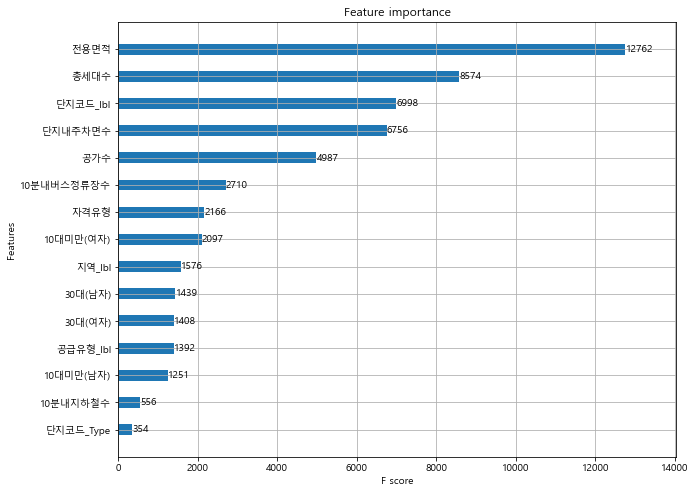

In [70]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_reg, ax=ax , max_num_features=20,height=0.4)


# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245 
* 실제 점수 : 94.04934


# 임대건물 구분 넣으니깐...
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.03567008604962118
* XGBM 모델의 MAE: 0.014330334463868983
* LGBM 모델의 MAE: 0.06334990017907874
* CATM 모델의 MAE: 0.038222412372448396

# log_단지내주차면수 로 변경
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', 'log_단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.0319842263933502
* XGBM 모델의 MAE: 0.014659369120077419
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245

# 임대건물구분_lbl, log_단지내주차면수 로 변경후
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', 'log_단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.035655662244789756
* XGBM 모델의 MAE: 0.014303995685397359
* LGBM 모델의 MAE: 0.06334990017907874
* CATM 모델의 MAE: 0.038222412372448396

* 점수 :96.1138824151	 ...더 안좋아짐..뭐가문제지?

# log_등록차량수 > 등록차량수 : 결과 좋지 않음! log 씌우는걸로!

# sel = [ 'qcut_총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'


* 최종 혼합 모델의 MAE: 0.03747598080959757
* XGBM 모델의 MAE: 0.013667399958141143
* LGBM 모델의 MAE: 0.07181323101083253
* CATM 모델의 MAE: 0.03769290603493843

>100.2699413689 점수가 왜 오를까..?

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
   '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
  '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
    '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245
* 실제 점수 : 94.04934

* lgbm이 줄어드는 방향으로 해보자!!!!


# 현재 상태 -----------------------------------------------------
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
   '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
  '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
    '단지코드_Type']
lable_name = 'log_등록차량수'
# 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245


# learning_rate = 0.1로 변경
최종 혼합 모델의 MAE: 0.02481445731303656
XGBM 모델의 MAE: 0.014530671472410795
LGBM 모델의 MAE: 0.03474698733146343
CATM 모델의 MAE: 0.03078569357421404

# learning_rate = 0.1로 변경, estimator = 20000
최종 혼합 모델의 MAE: 0.01640719305118939
XGBM 모델의 MAE: 0.014489622514227026
LGBM 모델의 MAE: 0.014862862361406586
CATM 모델의 MAE: 0.023948652927971638

점수 108.294991863

# 최종모델 만들기

In [71]:
model_last = XGBRegressor(n_estimators=20000, learning_rate=0.1, 
                       colsample_bytree=0.5, subsample=0.8)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.5026374, 6.4846225, 6.5317397, 6.5317397, 6.5576797, 6.539909 ,
       6.5157022, 6.5157022, 7.0608125, 7.0608125], dtype=float32)

In [72]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,단지별차량수평균
0,2869,C1072,754,39.79,116.0,14.0,8,22830000,189840,0.0,...,3.0,23019940,1.103953,0.981432,6.527958,6.626718,4.762174,2.708050,665.898193,679.408508
1,2877,C1128,1354,39.79,368.0,9.0,8,22830000,189840,0.0,...,3.0,23019940,1.113487,0.993353,7.104144,7.211557,5.910797,2.302585,1164.391602,1206.783691
2,2886,C1332,1297,39.99,282.0,11.0,8,28598000,203050,0.0,...,3.0,28801150,1.166367,0.991519,7.014814,7.168580,5.645447,2.484907,964.816589,983.938721
3,2894,C1563,1974,39.73,214.0,15.0,1,30040000,206380,0.0,...,3.0,30246480,1.163915,0.992401,7.436617,7.588324,5.370638,2.772589,1756.376221,1757.574341
4,2905,C1721,663,39.46,155.0,20.0,1,26435000,180230,0.0,...,3.0,26615330,1.157068,0.969834,6.352629,6.498282,5.049856,3.044522,596.316406,597.646362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3851,C1633,178,26.96,88.0,22.0,1,10305000,146780,0.0,...,3.0,10451880,1.059524,0.876404,5.129899,5.187386,4.488636,3.135494,152.619125,142.460480
143,3854,C2451,395,59.18,23.0,2.0,1,50000000,450000,0.0,...,3.0,50450100,0.912240,0.994937,6.073045,5.981414,3.178054,1.098612,593.359924,603.082275
144,3858,C2292,906,21.92,336.0,22.0,8,8738000,131580,0.0,...,3.0,8869680,1.000000,0.975717,6.810142,6.810142,5.820083,3.135494,963.036377,936.080261
145,3863,C2551,674,21.99,160.0,18.0,8,8768000,123360,0.0,...,3.0,8891460,1.000000,0.973294,6.514713,6.514713,5.081404,2.944439,574.546448,576.979553


In [73]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [74]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,679.409
1,C1128,1206.78
2,C1332,983.939
3,C1563,1757.57
4,C1721,597.646
...,...,...
145,C2551,576.98
146,C1229,191.215
147,C2675,0
148,C2335,0


In [75]:
sub_df.to_csv('31th_회귀트리_xgboost_0730.csv', index=False)
sub_df.head()

,code,num
0,C1072,679.409
1,C1128,1206.78
2,C1332,983.939
3,C1563,1757.57
4,C1721,597.646


# 점수 :  108.294991863